In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

/home/radosav/Documents/Milutin/Projects/ML/machine-learning/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5,1,'Class 5')

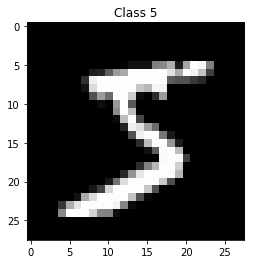

In [3]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [5]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [6]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [8]:

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [9]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [10]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


  1/937 [..............................] - ETA: 8:53 - loss: 2.3069 - acc: 0.0781

  2/937 [..............................] - ETA: 6:31 - loss: 2.3051 - acc: 0.1094

  3/937 [..............................] - ETA: 5:50 - loss: 2.3013 - acc: 0.1198

  4/937 [..............................] - ETA: 5:21 - loss: 2.2973 - acc: 0.1094

  5/937 [..............................] - ETA: 5:02 - loss: 2.2896 - acc: 0.1125

  6/937 [..............................] - ETA: 4:49 - loss: 2.2893 - acc: 0.1068

  7/937 [..............................] - ETA: 4:40 - loss: 2.2739 - acc: 0.1250

  8/937 [..............................] - ETA: 4:32 - loss: 2.2637 - acc: 0.1387

  9/937 [..............................] - ETA: 4:22 - loss: 2.2468 - acc: 0.1597

 10/937 [..............................] - ETA: 4:13 - loss: 2.2173 - acc: 0.1953

 11/937 [..............................] - ETA: 4:06 - loss: 2.1897 - acc: 0.2145

 12/937 [..............................] - ETA: 3:59 - loss: 2.1596 - acc: 0.2305

 13/937 [..............................] - ETA: 3:54 - loss: 2.1419 - acc: 0.2452

 14/937 [..............................] - ETA: 3:50 - loss: 2.0962 - acc: 0.2656

 15/937 [..............................] - ETA: 3:45 - loss: 2.0771 - acc: 0.2771

 16/937 [..............................] - ETA: 3:42 - loss: 2.0569 - acc: 0.2842

 17/937 [..............................] - ETA: 3:39 - loss: 2.0166 - acc: 0.3024

 18/937 [..............................] - ETA: 3:36 - loss: 1.9816 - acc: 0.3160

 19/937 [..............................] - ETA: 3:33 - loss: 1.9360 - acc: 0.3331

 20/937 [..............................] - ETA: 3:31 - loss: 1.9110 - acc: 0.3461

 21/937 [..............................] - ETA: 3:29 - loss: 1.8709 - acc: 0.3601

 22/937 [..............................] - ETA: 3:27 - loss: 1.8292 - acc: 0.3750

 23/937 [..............................] - ETA: 3:25 - loss: 1.8077 - acc: 0.3818

 24/937 [..............................] - ETA: 3:24 - loss: 1.7787 - acc: 0.3913

 25/937 [..............................] - ETA: 3:22 - loss: 1.7525 - acc: 0.3994

 26/937 [..............................] - ETA: 3:21 - loss: 1.7263 - acc: 0.4093

 27/937 [..............................] - ETA: 3:19 - loss: 1.7029 - acc: 0.4178

 28/937 [..............................] - ETA: 3:18 - loss: 1.6769 - acc: 0.4291

 29/937 [..............................] - ETA: 3:17 - loss: 1.6480 - acc: 0.4375

 30/937 [..............................] - ETA: 3:16 - loss: 1.6259 - acc: 0.4437

 31/937 [..............................] - ETA: 3:15 - loss: 1.6002 - acc: 0.4521

 32/937 [>.............................] - ETA: 3:14 - loss: 1.5780 - acc: 0.4609

 33/937 [>.............................] - ETA: 3:13 - loss: 1.5549 - acc: 0.4692

 34/937 [>.............................] - ETA: 3:12 - loss: 1.5372 - acc: 0.4761

 35/937 [>.............................] - ETA: 3:11 - loss: 1.5191 - acc: 0.4817

 36/937 [>.............................] - ETA: 3:10 - loss: 1.4972 - acc: 0.4891

 37/937 [>.............................] - ETA: 3:10 - loss: 1.4781 - acc: 0.4962

 38/937 [>.............................] - ETA: 3:09 - loss: 1.4554 - acc: 0.5049

 39/937 [>.............................] - ETA: 3:08 - loss: 1.4344 - acc: 0.5120

 40/937 [>.............................] - ETA: 3:08 - loss: 1.4159 - acc: 0.5184

 41/937 [>.............................] - ETA: 3:07 - loss: 1.3956 - acc: 0.5255

 42/937 [>.............................] - ETA: 3:06 - loss: 1.3790 - acc: 0.5312

 43/937 [>.............................] - ETA: 3:06 - loss: 1.3636 - acc: 0.5363

 44/937 [>.............................] - ETA: 3:05 - loss: 1.3425 - acc: 0.5440

 45/937 [>.............................] - ETA: 3:04 - loss: 1.3241 - acc: 0.5503

 46/937 [>.............................] - ETA: 3:04 - loss: 1.3057 - acc: 0.5571

 47/937 [>.............................] - ETA: 3:03 - loss: 1.2891 - acc: 0.5625

 48/937 [>.............................] - ETA: 3:03 - loss: 1.2716 - acc: 0.5693

 49/937 [>.............................] - ETA: 3:02 - loss: 1.2585 - acc: 0.5746

 50/937 [>.............................] - ETA: 3:01 - loss: 1.2432 - acc: 0.5791

 51/937 [>.............................] - ETA: 3:01 - loss: 1.2307 - acc: 0.5830

 52/937 [>.............................] - ETA: 3:00 - loss: 1.2130 - acc: 0.5889

 53/937 [>.............................] - ETA: 3:00 - loss: 1.2106 - acc: 0.5908

 54/937 [>.............................] - ETA: 2:59 - loss: 1.1973 - acc: 0.5955

 55/937 [>.............................] - ETA: 2:59 - loss: 1.1882 - acc: 0.5989

 56/937 [>.............................] - ETA: 2:59 - loss: 1.1802 - acc: 0.6018

 57/937 [>.............................] - ETA: 2:58 - loss: 1.1669 - acc: 0.6066

 58/937 [>.............................] - ETA: 2:58 - loss: 1.1541 - acc: 0.6121

 59/937 [>.............................] - ETA: 2:57 - loss: 1.1408 - acc: 0.6163

 60/937 [>.............................] - ETA: 2:57 - loss: 1.1314 - acc: 0.6188

 61/937 [>.............................] - ETA: 2:56 - loss: 1.1185 - acc: 0.6237

 62/937 [>.............................] - ETA: 2:56 - loss: 1.1080 - acc: 0.6268

 63/937 [=>............................] - ETA: 2:55 - loss: 1.0994 - acc: 0.6305

 64/937 [=>............................] - ETA: 2:55 - loss: 1.0895 - acc: 0.6333

 65/937 [=>............................] - ETA: 2:55 - loss: 1.0761 - acc: 0.6382

 66/937 [=>............................] - ETA: 2:54 - loss: 1.0644 - acc: 0.6425

 67/937 [=>............................] - ETA: 2:54 - loss: 1.0546 - acc: 0.6465

 68/937 [=>............................] - ETA: 2:54 - loss: 1.0433 - acc: 0.6507

 69/937 [=>............................] - ETA: 2:53 - loss: 1.0341 - acc: 0.6542

 70/937 [=>............................] - ETA: 2:53 - loss: 1.0244 - acc: 0.6569

 71/937 [=>............................] - ETA: 2:52 - loss: 1.0156 - acc: 0.6604

 72/937 [=>............................] - ETA: 2:52 - loss: 1.0093 - acc: 0.6632

 73/937 [=>............................] - ETA: 2:52 - loss: 1.0005 - acc: 0.6657

 74/937 [=>............................] - ETA: 2:51 - loss: 0.9937 - acc: 0.6683

 75/937 [=>............................] - ETA: 2:51 - loss: 0.9895 - acc: 0.6706

 76/937 [=>............................] - ETA: 2:51 - loss: 0.9813 - acc: 0.6735

 77/937 [=>............................] - ETA: 2:50 - loss: 0.9735 - acc: 0.6755

 78/937 [=>............................] - ETA: 2:50 - loss: 0.9693 - acc: 0.6777

 79/937 [=>............................] - ETA: 2:50 - loss: 0.9609 - acc: 0.6806

 80/937 [=>............................] - ETA: 2:49 - loss: 0.9517 - acc: 0.6840

 81/937 [=>............................] - ETA: 2:49 - loss: 0.9443 - acc: 0.6861

 82/937 [=>............................] - ETA: 2:49 - loss: 0.9410 - acc: 0.6877

 83/937 [=>............................] - ETA: 2:48 - loss: 0.9335 - acc: 0.6901

 84/937 [=>............................] - ETA: 2:48 - loss: 0.9277 - acc: 0.6922

 85/937 [=>............................] - ETA: 2:48 - loss: 0.9215 - acc: 0.6945

 86/937 [=>............................] - ETA: 2:47 - loss: 0.9146 - acc: 0.6969

 87/937 [=>............................] - ETA: 2:47 - loss: 0.9085 - acc: 0.6985

 88/937 [=>............................] - ETA: 2:47 - loss: 0.9018 - acc: 0.7005

 89/937 [=>............................] - ETA: 2:47 - loss: 0.8967 - acc: 0.7024

 90/937 [=>............................] - ETA: 2:46 - loss: 0.8912 - acc: 0.7038

 91/937 [=>............................] - ETA: 2:46 - loss: 0.8838 - acc: 0.7064

 92/937 [=>............................] - ETA: 2:46 - loss: 0.8798 - acc: 0.7070

 93/937 [=>............................] - ETA: 2:46 - loss: 0.8739 - acc: 0.7093

 94/937 [==>...........................] - ETA: 2:46 - loss: 0.8684 - acc: 0.7114

 95/937 [==>...........................] - ETA: 2:45 - loss: 0.8629 - acc: 0.7135

 96/937 [==>...........................] - ETA: 2:45 - loss: 0.8566 - acc: 0.7157

 97/937 [==>...........................] - ETA: 2:45 - loss: 0.8504 - acc: 0.7178

 98/937 [==>...........................] - ETA: 2:45 - loss: 0.8444 - acc: 0.7200

 99/937 [==>...........................] - ETA: 2:45 - loss: 0.8393 - acc: 0.7216

100/937 [==>...........................] - ETA: 2:45 - loss: 0.8344 - acc: 0.7231

101/937 [==>...........................] - ETA: 2:45 - loss: 0.8297 - acc: 0.7249

102/937 [==>...........................] - ETA: 2:45 - loss: 0.8242 - acc: 0.7266

103/937 [==>...........................] - ETA: 2:45 - loss: 0.8208 - acc: 0.7277

104/937 [==>...........................] - ETA: 2:45 - loss: 0.8161 - acc: 0.7293

105/937 [==>...........................] - ETA: 2:45 - loss: 0.8122 - acc: 0.7311

106/937 [==>...........................] - ETA: 2:45 - loss: 0.8067 - acc: 0.7332

107/937 [==>...........................] - ETA: 2:45 - loss: 0.8035 - acc: 0.7345

108/937 [==>...........................] - ETA: 2:45 - loss: 0.7985 - acc: 0.7361

109/937 [==>...........................] - ETA: 2:45 - loss: 0.7930 - acc: 0.7378

110/937 [==>...........................] - ETA: 2:45 - loss: 0.7880 - acc: 0.7396

111/937 [==>...........................] - ETA: 2:45 - loss: 0.7834 - acc: 0.7411

112/937 [==>...........................] - ETA: 2:45 - loss: 0.7796 - acc: 0.7426

113/937 [==>...........................] - ETA: 2:45 - loss: 0.7748 - acc: 0.7442

114/937 [==>...........................] - ETA: 2:45 - loss: 0.7703 - acc: 0.7456

115/937 [==>...........................] - ETA: 2:45 - loss: 0.7660 - acc: 0.7473

116/937 [==>...........................] - ETA: 2:45 - loss: 0.7616 - acc: 0.7487

117/937 [==>...........................] - ETA: 2:45 - loss: 0.7563 - acc: 0.7503

118/937 [==>...........................] - ETA: 2:45 - loss: 0.7519 - acc: 0.7517

119/937 [==>...........................] - ETA: 2:45 - loss: 0.7495 - acc: 0.7526

120/937 [==>...........................] - ETA: 2:45 - loss: 0.7463 - acc: 0.7535

121/937 [==>...........................] - ETA: 2:45 - loss: 0.7421 - acc: 0.7549

122/937 [==>...........................] - ETA: 2:45 - loss: 0.7385 - acc: 0.7561

123/937 [==>...........................] - ETA: 2:45 - loss: 0.7345 - acc: 0.7571

124/937 [==>...........................] - ETA: 2:44 - loss: 0.7325 - acc: 0.7577

125/937 [===>..........................] - ETA: 2:44 - loss: 0.7280 - acc: 0.7592

126/937 [===>..........................] - ETA: 2:44 - loss: 0.7232 - acc: 0.7608

127/937 [===>..........................] - ETA: 2:44 - loss: 0.7203 - acc: 0.7618

128/937 [===>..........................] - ETA: 2:44 - loss: 0.7156 - acc: 0.7634

129/937 [===>..........................] - ETA: 2:44 - loss: 0.7118 - acc: 0.7647

130/937 [===>..........................] - ETA: 2:44 - loss: 0.7086 - acc: 0.7656

131/937 [===>..........................] - ETA: 2:44 - loss: 0.7042 - acc: 0.7672

132/937 [===>..........................] - ETA: 2:44 - loss: 0.7001 - acc: 0.7685

133/937 [===>..........................] - ETA: 2:44 - loss: 0.6960 - acc: 0.7700

134/937 [===>..........................] - ETA: 2:43 - loss: 0.6922 - acc: 0.7712

135/937 [===>..........................] - ETA: 2:43 - loss: 0.6880 - acc: 0.7726

136/937 [===>..........................] - ETA: 2:43 - loss: 0.6850 - acc: 0.7737

137/937 [===>..........................] - ETA: 2:43 - loss: 0.6807 - acc: 0.7751

138/937 [===>..........................] - ETA: 2:43 - loss: 0.6782 - acc: 0.7760

139/937 [===>..........................] - ETA: 2:43 - loss: 0.6752 - acc: 0.7770

140/937 [===>..........................] - ETA: 2:43 - loss: 0.6733 - acc: 0.7773

141/937 [===>..........................] - ETA: 2:43 - loss: 0.6700 - acc: 0.7785

142/937 [===>..........................] - ETA: 2:43 - loss: 0.6674 - acc: 0.7793

143/937 [===>..........................] - ETA: 2:43 - loss: 0.6644 - acc: 0.7802

144/937 [===>..........................] - ETA: 2:43 - loss: 0.6611 - acc: 0.7814

145/937 [===>..........................] - ETA: 2:42 - loss: 0.6577 - acc: 0.7824

146/937 [===>..........................] - ETA: 2:42 - loss: 0.6566 - acc: 0.7827

147/937 [===>..........................] - ETA: 2:42 - loss: 0.6550 - acc: 0.7835

148/937 [===>..........................] - ETA: 2:42 - loss: 0.6532 - acc: 0.7843

149/937 [===>..........................] - ETA: 2:42 - loss: 0.6519 - acc: 0.7850

150/937 [===>..........................] - ETA: 2:42 - loss: 0.6496 - acc: 0.7858

151/937 [===>..........................] - ETA: 2:42 - loss: 0.6476 - acc: 0.7865

152/937 [===>..........................] - ETA: 2:42 - loss: 0.6441 - acc: 0.7877

153/937 [===>..........................] - ETA: 2:41 - loss: 0.6408 - acc: 0.7890

154/937 [===>..........................] - ETA: 2:41 - loss: 0.6388 - acc: 0.7898

155/937 [===>..........................] - ETA: 2:41 - loss: 0.6372 - acc: 0.7906

156/937 [===>..........................] - ETA: 2:41 - loss: 0.6345 - acc: 0.7914

157/937 [====>.........................] - ETA: 2:41 - loss: 0.6314 - acc: 0.7924

158/937 [====>.........................] - ETA: 2:41 - loss: 0.6287 - acc: 0.7931

159/937 [====>.........................] - ETA: 2:41 - loss: 0.6267 - acc: 0.7939

160/937 [====>.........................] - ETA: 2:40 - loss: 0.6239 - acc: 0.7948

161/937 [====>.........................] - ETA: 2:40 - loss: 0.6217 - acc: 0.7957

162/937 [====>.........................] - ETA: 2:40 - loss: 0.6191 - acc: 0.7968

163/937 [====>.........................] - ETA: 2:40 - loss: 0.6170 - acc: 0.7974

164/937 [====>.........................] - ETA: 2:40 - loss: 0.6152 - acc: 0.7978

165/937 [====>.........................] - ETA: 2:40 - loss: 0.6133 - acc: 0.7986

166/937 [====>.........................] - ETA: 2:40 - loss: 0.6117 - acc: 0.7992

167/937 [====>.........................] - ETA: 2:39 - loss: 0.6094 - acc: 0.8001

168/937 [====>.........................] - ETA: 2:39 - loss: 0.6067 - acc: 0.8009

169/937 [====>.........................] - ETA: 2:39 - loss: 0.6047 - acc: 0.8014

170/937 [====>.........................] - ETA: 2:39 - loss: 0.6023 - acc: 0.8021

171/937 [====>.........................] - ETA: 2:39 - loss: 0.5998 - acc: 0.8029

172/937 [====>.........................] - ETA: 2:39 - loss: 0.5970 - acc: 0.8038

173/937 [====>.........................] - ETA: 2:39 - loss: 0.5947 - acc: 0.8045

174/937 [====>.........................] - ETA: 2:38 - loss: 0.5946 - acc: 0.8050

175/937 [====>.........................] - ETA: 2:38 - loss: 0.5919 - acc: 0.8059

176/937 [====>.........................] - ETA: 2:38 - loss: 0.5897 - acc: 0.8066

177/937 [====>.........................] - ETA: 2:38 - loss: 0.5876 - acc: 0.8073

178/937 [====>.........................] - ETA: 2:38 - loss: 0.5856 - acc: 0.8078

179/937 [====>.........................] - ETA: 2:38 - loss: 0.5843 - acc: 0.8080

180/937 [====>.........................] - ETA: 2:37 - loss: 0.5833 - acc: 0.8083

181/937 [====>.........................] - ETA: 2:37 - loss: 0.5816 - acc: 0.8089

182/937 [====>.........................] - ETA: 2:37 - loss: 0.5798 - acc: 0.8093

183/937 [====>.........................] - ETA: 2:37 - loss: 0.5783 - acc: 0.8099

184/937 [====>.........................] - ETA: 2:37 - loss: 0.5757 - acc: 0.8108

185/937 [====>.........................] - ETA: 2:37 - loss: 0.5734 - acc: 0.8116

186/937 [====>.........................] - ETA: 2:37 - loss: 0.5718 - acc: 0.8119

187/937 [====>.........................] - ETA: 2:37 - loss: 0.5694 - acc: 0.8128

188/937 [=====>........................] - ETA: 2:36 - loss: 0.5676 - acc: 0.8133

189/937 [=====>........................] - ETA: 2:36 - loss: 0.5655 - acc: 0.8140

190/937 [=====>........................] - ETA: 2:36 - loss: 0.5636 - acc: 0.8146

191/937 [=====>........................] - ETA: 2:36 - loss: 0.5616 - acc: 0.8154

192/937 [=====>........................] - ETA: 2:36 - loss: 0.5594 - acc: 0.8161

193/937 [=====>........................] - ETA: 2:36 - loss: 0.5577 - acc: 0.8168

194/937 [=====>........................] - ETA: 2:35 - loss: 0.5561 - acc: 0.8173

195/937 [=====>........................] - ETA: 2:35 - loss: 0.5540 - acc: 0.8180

196/937 [=====>........................] - ETA: 2:35 - loss: 0.5523 - acc: 0.8186

197/937 [=====>........................] - ETA: 2:35 - loss: 0.5500 - acc: 0.8194

198/937 [=====>........................] - ETA: 2:35 - loss: 0.5484 - acc: 0.8200

199/937 [=====>........................] - ETA: 2:35 - loss: 0.5461 - acc: 0.8206

200/937 [=====>........................] - ETA: 2:34 - loss: 0.5438 - acc: 0.8214

201/937 [=====>........................] - ETA: 2:34 - loss: 0.5417 - acc: 0.8221

202/937 [=====>........................] - ETA: 2:34 - loss: 0.5397 - acc: 0.8227

203/937 [=====>........................] - ETA: 2:34 - loss: 0.5373 - acc: 0.8236

204/937 [=====>........................] - ETA: 2:34 - loss: 0.5355 - acc: 0.8241

205/937 [=====>........................] - ETA: 2:34 - loss: 0.5333 - acc: 0.8248

206/937 [=====>........................] - ETA: 2:34 - loss: 0.5322 - acc: 0.8254

207/937 [=====>........................] - ETA: 2:33 - loss: 0.5299 - acc: 0.8262

208/937 [=====>........................] - ETA: 2:33 - loss: 0.5276 - acc: 0.8270

209/937 [=====>........................] - ETA: 2:33 - loss: 0.5259 - acc: 0.8275

210/937 [=====>........................] - ETA: 2:33 - loss: 0.5239 - acc: 0.8282

211/937 [=====>........................] - ETA: 2:33 - loss: 0.5219 - acc: 0.8289

212/937 [=====>........................] - ETA: 2:32 - loss: 0.5199 - acc: 0.8296

213/937 [=====>........................] - ETA: 2:32 - loss: 0.5185 - acc: 0.8300

214/937 [=====>........................] - ETA: 2:32 - loss: 0.5167 - acc: 0.8305

215/937 [=====>........................] - ETA: 2:32 - loss: 0.5149 - acc: 0.8310

216/937 [=====>........................] - ETA: 2:32 - loss: 0.5134 - acc: 0.8314

217/937 [=====>........................] - ETA: 2:32 - loss: 0.5117 - acc: 0.8319

218/937 [=====>........................] - ETA: 2:31 - loss: 0.5113 - acc: 0.8324

219/937 [======>.......................] - ETA: 2:31 - loss: 0.5094 - acc: 0.8329

220/937 [======>.......................] - ETA: 2:31 - loss: 0.5085 - acc: 0.8332

221/937 [======>.......................] - ETA: 2:31 - loss: 0.5069 - acc: 0.8337

222/937 [======>.......................] - ETA: 2:31 - loss: 0.5049 - acc: 0.8343

223/937 [======>.......................] - ETA: 2:31 - loss: 0.5037 - acc: 0.8347

224/937 [======>.......................] - ETA: 2:30 - loss: 0.5024 - acc: 0.8352

225/937 [======>.......................] - ETA: 2:30 - loss: 0.5015 - acc: 0.8355

226/937 [======>.......................] - ETA: 2:30 - loss: 0.5004 - acc: 0.8361

227/937 [======>.......................] - ETA: 2:30 - loss: 0.4993 - acc: 0.8365

228/937 [======>.......................] - ETA: 2:30 - loss: 0.4977 - acc: 0.8370

229/937 [======>.......................] - ETA: 2:29 - loss: 0.4967 - acc: 0.8375

230/937 [======>.......................] - ETA: 2:29 - loss: 0.4959 - acc: 0.8377

231/937 [======>.......................] - ETA: 2:29 - loss: 0.4948 - acc: 0.8381

232/937 [======>.......................] - ETA: 2:29 - loss: 0.4933 - acc: 0.8386

233/937 [======>.......................] - ETA: 2:29 - loss: 0.4925 - acc: 0.8389

234/937 [======>.......................] - ETA: 2:29 - loss: 0.4932 - acc: 0.8387

235/937 [======>.......................] - ETA: 2:28 - loss: 0.4917 - acc: 0.8392

236/937 [======>.......................] - ETA: 2:28 - loss: 0.4902 - acc: 0.8398

237/937 [======>.......................] - ETA: 2:28 - loss: 0.4886 - acc: 0.8403

238/937 [======>.......................] - ETA: 2:28 - loss: 0.4880 - acc: 0.8405

239/937 [======>.......................] - ETA: 2:28 - loss: 0.4865 - acc: 0.8410

240/937 [======>.......................] - ETA: 2:27 - loss: 0.4853 - acc: 0.8414

241/937 [======>.......................] - ETA: 2:27 - loss: 0.4844 - acc: 0.8417

242/937 [======>.......................] - ETA: 2:27 - loss: 0.4830 - acc: 0.8422

243/937 [======>.......................] - ETA: 2:27 - loss: 0.4821 - acc: 0.8423

244/937 [======>.......................] - ETA: 2:27 - loss: 0.4810 - acc: 0.8428

245/937 [======>.......................] - ETA: 2:26 - loss: 0.4796 - acc: 0.8433

246/937 [======>.......................] - ETA: 2:26 - loss: 0.4786 - acc: 0.8438

247/937 [======>.......................] - ETA: 2:26 - loss: 0.4772 - acc: 0.8443

248/937 [======>.......................] - ETA: 2:26 - loss: 0.4760 - acc: 0.8447

249/937 [======>.......................] - ETA: 2:26 - loss: 0.4746 - acc: 0.8452

250/937 [=======>......................] - ETA: 2:26 - loss: 0.4739 - acc: 0.8455

251/937 [=======>......................] - ETA: 2:25 - loss: 0.4731 - acc: 0.8459

252/937 [=======>......................] - ETA: 2:25 - loss: 0.4715 - acc: 0.8464

253/937 [=======>......................] - ETA: 2:25 - loss: 0.4704 - acc: 0.8468

254/937 [=======>......................] - ETA: 2:25 - loss: 0.4689 - acc: 0.8473

255/937 [=======>......................] - ETA: 2:25 - loss: 0.4678 - acc: 0.8477

256/937 [=======>......................] - ETA: 2:24 - loss: 0.4665 - acc: 0.8480

257/937 [=======>......................] - ETA: 2:24 - loss: 0.4651 - acc: 0.8485

258/937 [=======>......................] - ETA: 2:24 - loss: 0.4638 - acc: 0.8489

259/937 [=======>......................] - ETA: 2:24 - loss: 0.4624 - acc: 0.8494

260/937 [=======>......................] - ETA: 2:24 - loss: 0.4609 - acc: 0.8499

261/937 [=======>......................] - ETA: 2:23 - loss: 0.4596 - acc: 0.8503

262/937 [=======>......................] - ETA: 2:23 - loss: 0.4582 - acc: 0.8508

263/937 [=======>......................] - ETA: 2:23 - loss: 0.4570 - acc: 0.8511

264/937 [=======>......................] - ETA: 2:23 - loss: 0.4561 - acc: 0.8515

265/937 [=======>......................] - ETA: 2:23 - loss: 0.4549 - acc: 0.8518

266/937 [=======>......................] - ETA: 2:23 - loss: 0.4534 - acc: 0.8524

267/937 [=======>......................] - ETA: 2:22 - loss: 0.4522 - acc: 0.8528

268/937 [=======>......................] - ETA: 2:22 - loss: 0.4511 - acc: 0.8531

269/937 [=======>......................] - ETA: 2:22 - loss: 0.4495 - acc: 0.8536

270/937 [=======>......................] - ETA: 2:22 - loss: 0.4486 - acc: 0.8538

271/937 [=======>......................] - ETA: 2:22 - loss: 0.4473 - acc: 0.8542

272/937 [=======>......................] - ETA: 2:21 - loss: 0.4462 - acc: 0.8545

273/937 [=======>......................] - ETA: 2:21 - loss: 0.4452 - acc: 0.8548

274/937 [=======>......................] - ETA: 2:21 - loss: 0.4439 - acc: 0.8553

275/937 [=======>......................] - ETA: 2:21 - loss: 0.4427 - acc: 0.8557

276/937 [=======>......................] - ETA: 2:21 - loss: 0.4422 - acc: 0.8559

277/937 [=======>......................] - ETA: 2:20 - loss: 0.4410 - acc: 0.8562

278/937 [=======>......................] - ETA: 2:20 - loss: 0.4396 - acc: 0.8567

279/937 [=======>......................] - ETA: 2:20 - loss: 0.4384 - acc: 0.8570

280/937 [=======>......................] - ETA: 2:20 - loss: 0.4374 - acc: 0.8573

281/937 [=======>......................] - ETA: 2:20 - loss: 0.4369 - acc: 0.8576

282/937 [========>.....................] - ETA: 2:20 - loss: 0.4359 - acc: 0.8580

283/937 [========>.....................] - ETA: 2:19 - loss: 0.4352 - acc: 0.8583

284/937 [========>.....................] - ETA: 2:19 - loss: 0.4341 - acc: 0.8587

285/937 [========>.....................] - ETA: 2:19 - loss: 0.4329 - acc: 0.8592

286/937 [========>.....................] - ETA: 2:19 - loss: 0.4319 - acc: 0.8594

287/937 [========>.....................] - ETA: 2:19 - loss: 0.4307 - acc: 0.8598

288/937 [========>.....................] - ETA: 2:18 - loss: 0.4295 - acc: 0.8602

289/937 [========>.....................] - ETA: 2:18 - loss: 0.4284 - acc: 0.8606

290/937 [========>.....................] - ETA: 2:18 - loss: 0.4273 - acc: 0.8610

291/937 [========>.....................] - ETA: 2:18 - loss: 0.4265 - acc: 0.8613

292/937 [========>.....................] - ETA: 2:18 - loss: 0.4252 - acc: 0.8617

293/937 [========>.....................] - ETA: 2:17 - loss: 0.4243 - acc: 0.8621

294/937 [========>.....................] - ETA: 2:17 - loss: 0.4238 - acc: 0.8623

295/937 [========>.....................] - ETA: 2:17 - loss: 0.4230 - acc: 0.8625

296/937 [========>.....................] - ETA: 2:17 - loss: 0.4220 - acc: 0.8628

297/937 [========>.....................] - ETA: 2:17 - loss: 0.4209 - acc: 0.8632

298/937 [========>.....................] - ETA: 2:16 - loss: 0.4204 - acc: 0.8633

299/937 [========>.....................] - ETA: 2:16 - loss: 0.4194 - acc: 0.8637

300/937 [========>.....................] - ETA: 2:16 - loss: 0.4182 - acc: 0.8640

301/937 [========>.....................] - ETA: 2:16 - loss: 0.4171 - acc: 0.8643

302/937 [========>.....................] - ETA: 2:16 - loss: 0.4162 - acc: 0.8646

303/937 [========>.....................] - ETA: 2:15 - loss: 0.4152 - acc: 0.8649

304/937 [========>.....................] - ETA: 2:15 - loss: 0.4143 - acc: 0.8653

305/937 [========>.....................] - ETA: 2:15 - loss: 0.4134 - acc: 0.8655

306/937 [========>.....................] - ETA: 2:15 - loss: 0.4126 - acc: 0.8658

307/937 [========>.....................] - ETA: 2:15 - loss: 0.4117 - acc: 0.8660

308/937 [========>.....................] - ETA: 2:15 - loss: 0.4111 - acc: 0.8662

309/937 [========>.....................] - ETA: 2:14 - loss: 0.4103 - acc: 0.8664

310/937 [========>.....................] - ETA: 2:14 - loss: 0.4098 - acc: 0.8666

311/937 [========>.....................] - ETA: 2:14 - loss: 0.4088 - acc: 0.8669

312/937 [========>.....................] - ETA: 2:14 - loss: 0.4078 - acc: 0.8672

313/937 [=========>....................] - ETA: 2:14 - loss: 0.4075 - acc: 0.8674

314/937 [=========>....................] - ETA: 2:13 - loss: 0.4069 - acc: 0.8676

315/937 [=========>....................] - ETA: 2:13 - loss: 0.4065 - acc: 0.8679

316/937 [=========>....................] - ETA: 2:13 - loss: 0.4058 - acc: 0.8681

317/937 [=========>....................] - ETA: 2:13 - loss: 0.4047 - acc: 0.8684

318/937 [=========>....................] - ETA: 2:13 - loss: 0.4044 - acc: 0.8686

319/937 [=========>....................] - ETA: 2:12 - loss: 0.4034 - acc: 0.8689

320/937 [=========>....................] - ETA: 2:12 - loss: 0.4030 - acc: 0.8690

321/937 [=========>....................] - ETA: 2:12 - loss: 0.4023 - acc: 0.8692

322/937 [=========>....................] - ETA: 2:12 - loss: 0.4016 - acc: 0.8694

323/937 [=========>....................] - ETA: 2:12 - loss: 0.4006 - acc: 0.8697

324/937 [=========>....................] - ETA: 2:11 - loss: 0.4001 - acc: 0.8699

325/937 [=========>....................] - ETA: 2:11 - loss: 0.3992 - acc: 0.8702

326/937 [=========>....................] - ETA: 2:11 - loss: 0.3984 - acc: 0.8704

327/937 [=========>....................] - ETA: 2:11 - loss: 0.3977 - acc: 0.8707

328/937 [=========>....................] - ETA: 2:11 - loss: 0.3970 - acc: 0.8708

329/937 [=========>....................] - ETA: 2:10 - loss: 0.3966 - acc: 0.8710

330/937 [=========>....................] - ETA: 2:10 - loss: 0.3960 - acc: 0.8712

331/937 [=========>....................] - ETA: 2:10 - loss: 0.3955 - acc: 0.8715

332/937 [=========>....................] - ETA: 2:10 - loss: 0.3946 - acc: 0.8717

333/937 [=========>....................] - ETA: 2:10 - loss: 0.3936 - acc: 0.8720

334/937 [=========>....................] - ETA: 2:09 - loss: 0.3928 - acc: 0.8723

335/937 [=========>....................] - ETA: 2:09 - loss: 0.3921 - acc: 0.8725

336/937 [=========>....................] - ETA: 2:09 - loss: 0.3913 - acc: 0.8728

337/937 [=========>....................] - ETA: 2:09 - loss: 0.3904 - acc: 0.8731

338/937 [=========>....................] - ETA: 2:08 - loss: 0.3900 - acc: 0.8733

339/937 [=========>....................] - ETA: 2:08 - loss: 0.3897 - acc: 0.8734

340/937 [=========>....................] - ETA: 2:08 - loss: 0.3890 - acc: 0.8737

341/937 [=========>....................] - ETA: 2:08 - loss: 0.3885 - acc: 0.8738

342/937 [=========>....................] - ETA: 2:08 - loss: 0.3877 - acc: 0.8740

343/937 [=========>....................] - ETA: 2:07 - loss: 0.3869 - acc: 0.8743

344/937 [==========>...................] - ETA: 2:07 - loss: 0.3865 - acc: 0.8745

345/937 [==========>...................] - ETA: 2:07 - loss: 0.3857 - acc: 0.8747

346/937 [==========>...................] - ETA: 2:07 - loss: 0.3850 - acc: 0.8750

347/937 [==========>...................] - ETA: 2:07 - loss: 0.3840 - acc: 0.8753

348/937 [==========>...................] - ETA: 2:06 - loss: 0.3833 - acc: 0.8755

349/937 [==========>...................] - ETA: 2:06 - loss: 0.3827 - acc: 0.8757

350/937 [==========>...................] - ETA: 2:06 - loss: 0.3820 - acc: 0.8759

351/937 [==========>...................] - ETA: 2:06 - loss: 0.3815 - acc: 0.8761

352/937 [==========>...................] - ETA: 2:06 - loss: 0.3807 - acc: 0.8764

353/937 [==========>...................] - ETA: 2:05 - loss: 0.3801 - acc: 0.8765

354/937 [==========>...................] - ETA: 2:05 - loss: 0.3795 - acc: 0.8768

355/937 [==========>...................] - ETA: 2:05 - loss: 0.3788 - acc: 0.8770

356/937 [==========>...................] - ETA: 2:05 - loss: 0.3781 - acc: 0.8772

357/937 [==========>...................] - ETA: 2:05 - loss: 0.3773 - acc: 0.8775

358/937 [==========>...................] - ETA: 2:04 - loss: 0.3766 - acc: 0.8777

359/937 [==========>...................] - ETA: 2:04 - loss: 0.3760 - acc: 0.8779

360/937 [==========>...................] - ETA: 2:04 - loss: 0.3751 - acc: 0.8782

361/937 [==========>...................] - ETA: 2:04 - loss: 0.3743 - acc: 0.8785

362/937 [==========>...................] - ETA: 2:04 - loss: 0.3735 - acc: 0.8788

363/937 [==========>...................] - ETA: 2:03 - loss: 0.3728 - acc: 0.8789

364/937 [==========>...................] - ETA: 2:03 - loss: 0.3719 - acc: 0.8792

365/937 [==========>...................] - ETA: 2:03 - loss: 0.3711 - acc: 0.8795

366/937 [==========>...................] - ETA: 2:03 - loss: 0.3706 - acc: 0.8796

367/937 [==========>...................] - ETA: 2:02 - loss: 0.3698 - acc: 0.8799

368/937 [==========>...................] - ETA: 2:02 - loss: 0.3693 - acc: 0.8801

369/937 [==========>...................] - ETA: 2:02 - loss: 0.3687 - acc: 0.8802

370/937 [==========>...................] - ETA: 2:02 - loss: 0.3680 - acc: 0.8804

371/937 [==========>...................] - ETA: 2:02 - loss: 0.3671 - acc: 0.8807

372/937 [==========>...................] - ETA: 2:01 - loss: 0.3666 - acc: 0.8808

373/937 [==========>...................] - ETA: 2:01 - loss: 0.3659 - acc: 0.8811

374/937 [==========>...................] - ETA: 2:01 - loss: 0.3653 - acc: 0.8814

375/937 [===========>..................] - ETA: 2:01 - loss: 0.3644 - acc: 0.8817

376/937 [===========>..................] - ETA: 2:01 - loss: 0.3641 - acc: 0.8818

377/937 [===========>..................] - ETA: 2:00 - loss: 0.3633 - acc: 0.8821

378/937 [===========>..................] - ETA: 2:00 - loss: 0.3629 - acc: 0.8824

379/937 [===========>..................] - ETA: 2:00 - loss: 0.3621 - acc: 0.8826

380/937 [===========>..................] - ETA: 2:00 - loss: 0.3615 - acc: 0.8828

381/937 [===========>..................] - ETA: 2:00 - loss: 0.3608 - acc: 0.8830

382/937 [===========>..................] - ETA: 1:59 - loss: 0.3600 - acc: 0.8833

383/937 [===========>..................] - ETA: 1:59 - loss: 0.3594 - acc: 0.8835

384/937 [===========>..................] - ETA: 1:59 - loss: 0.3588 - acc: 0.8836

385/937 [===========>..................] - ETA: 1:59 - loss: 0.3581 - acc: 0.8838

386/937 [===========>..................] - ETA: 1:58 - loss: 0.3572 - acc: 0.8841

387/937 [===========>..................] - ETA: 1:58 - loss: 0.3564 - acc: 0.8844

388/937 [===========>..................] - ETA: 1:58 - loss: 0.3557 - acc: 0.8845

389/937 [===========>..................] - ETA: 1:58 - loss: 0.3551 - acc: 0.8848

390/937 [===========>..................] - ETA: 1:58 - loss: 0.3548 - acc: 0.8849

391/937 [===========>..................] - ETA: 1:57 - loss: 0.3542 - acc: 0.8851

392/937 [===========>..................] - ETA: 1:57 - loss: 0.3542 - acc: 0.8851

393/937 [===========>..................] - ETA: 1:57 - loss: 0.3535 - acc: 0.8853

394/937 [===========>..................] - ETA: 1:57 - loss: 0.3528 - acc: 0.8855

395/937 [===========>..................] - ETA: 1:56 - loss: 0.3522 - acc: 0.8857

396/937 [===========>..................] - ETA: 1:56 - loss: 0.3516 - acc: 0.8859

397/937 [===========>..................] - ETA: 1:56 - loss: 0.3511 - acc: 0.8860

398/937 [===========>..................] - ETA: 1:56 - loss: 0.3503 - acc: 0.8862

399/937 [===========>..................] - ETA: 1:56 - loss: 0.3498 - acc: 0.8864

400/937 [===========>..................] - ETA: 1:55 - loss: 0.3493 - acc: 0.8865

401/937 [===========>..................] - ETA: 1:55 - loss: 0.3488 - acc: 0.8867

402/937 [===========>..................] - ETA: 1:55 - loss: 0.3483 - acc: 0.8868

403/937 [===========>..................] - ETA: 1:55 - loss: 0.3476 - acc: 0.8870

404/937 [===========>..................] - ETA: 1:55 - loss: 0.3475 - acc: 0.8871

405/937 [===========>..................] - ETA: 1:54 - loss: 0.3468 - acc: 0.8874

406/937 [===========>..................] - ETA: 1:54 - loss: 0.3464 - acc: 0.8875

407/937 [============>.................] - ETA: 1:54 - loss: 0.3459 - acc: 0.8877

408/937 [============>.................] - ETA: 1:54 - loss: 0.3452 - acc: 0.8879

409/937 [============>.................] - ETA: 1:54 - loss: 0.3447 - acc: 0.8881

410/937 [============>.................] - ETA: 1:53 - loss: 0.3442 - acc: 0.8883

411/937 [============>.................] - ETA: 1:53 - loss: 0.3437 - acc: 0.8885

412/937 [============>.................] - ETA: 1:53 - loss: 0.3433 - acc: 0.8886

413/937 [============>.................] - ETA: 1:53 - loss: 0.3429 - acc: 0.8888

414/937 [============>.................] - ETA: 1:52 - loss: 0.3425 - acc: 0.8889

415/937 [============>.................] - ETA: 1:52 - loss: 0.3419 - acc: 0.8892

416/937 [============>.................] - ETA: 1:52 - loss: 0.3415 - acc: 0.8893

417/937 [============>.................] - ETA: 1:52 - loss: 0.3412 - acc: 0.8894

418/937 [============>.................] - ETA: 1:52 - loss: 0.3411 - acc: 0.8895

419/937 [============>.................] - ETA: 1:51 - loss: 0.3406 - acc: 0.8897

420/937 [============>.................] - ETA: 1:51 - loss: 0.3404 - acc: 0.8898

421/937 [============>.................] - ETA: 1:51 - loss: 0.3400 - acc: 0.8899

422/937 [============>.................] - ETA: 1:51 - loss: 0.3394 - acc: 0.8901

423/937 [============>.................] - ETA: 1:51 - loss: 0.3389 - acc: 0.8903

424/937 [============>.................] - ETA: 1:50 - loss: 0.3384 - acc: 0.8904

425/937 [============>.................] - ETA: 1:50 - loss: 0.3377 - acc: 0.8907

426/937 [============>.................] - ETA: 1:50 - loss: 0.3372 - acc: 0.8908

427/937 [============>.................] - ETA: 1:50 - loss: 0.3369 - acc: 0.8910

428/937 [============>.................] - ETA: 1:50 - loss: 0.3363 - acc: 0.8912

429/937 [============>.................] - ETA: 1:49 - loss: 0.3357 - acc: 0.8914

430/937 [============>.................] - ETA: 1:49 - loss: 0.3353 - acc: 0.8915

431/937 [============>.................] - ETA: 1:49 - loss: 0.3350 - acc: 0.8916

432/937 [============>.................] - ETA: 1:49 - loss: 0.3344 - acc: 0.8917

433/937 [============>.................] - ETA: 1:49 - loss: 0.3338 - acc: 0.8920

434/937 [============>.................] - ETA: 1:48 - loss: 0.3331 - acc: 0.8922

435/937 [============>.................] - ETA: 1:48 - loss: 0.3326 - acc: 0.8923

436/937 [============>.................] - ETA: 1:48 - loss: 0.3321 - acc: 0.8925

437/937 [============>.................] - ETA: 1:48 - loss: 0.3316 - acc: 0.8926

438/937 [=============>................] - ETA: 1:48 - loss: 0.3312 - acc: 0.8928

439/937 [=============>................] - ETA: 1:47 - loss: 0.3306 - acc: 0.8930

440/937 [=============>................] - ETA: 1:47 - loss: 0.3302 - acc: 0.8931

441/937 [=============>................] - ETA: 1:47 - loss: 0.3296 - acc: 0.8933

442/937 [=============>................] - ETA: 1:47 - loss: 0.3289 - acc: 0.8936

443/937 [=============>................] - ETA: 1:46 - loss: 0.3289 - acc: 0.8935

444/937 [=============>................] - ETA: 1:46 - loss: 0.3287 - acc: 0.8935

445/937 [=============>................] - ETA: 1:46 - loss: 0.3285 - acc: 0.8936

446/937 [=============>................] - ETA: 1:46 - loss: 0.3281 - acc: 0.8937

447/937 [=============>................] - ETA: 1:46 - loss: 0.3277 - acc: 0.8939

448/937 [=============>................] - ETA: 1:45 - loss: 0.3271 - acc: 0.8941

449/937 [=============>................] - ETA: 1:45 - loss: 0.3266 - acc: 0.8943

450/937 [=============>................] - ETA: 1:45 - loss: 0.3265 - acc: 0.8944

451/937 [=============>................] - ETA: 1:45 - loss: 0.3261 - acc: 0.8946

452/937 [=============>................] - ETA: 1:45 - loss: 0.3256 - acc: 0.8947

453/937 [=============>................] - ETA: 1:44 - loss: 0.3249 - acc: 0.8950

454/937 [=============>................] - ETA: 1:44 - loss: 0.3245 - acc: 0.8951

455/937 [=============>................] - ETA: 1:44 - loss: 0.3240 - acc: 0.8953

456/937 [=============>................] - ETA: 1:44 - loss: 0.3234 - acc: 0.8955

457/937 [=============>................] - ETA: 1:43 - loss: 0.3229 - acc: 0.8956

458/937 [=============>................] - ETA: 1:43 - loss: 0.3225 - acc: 0.8957

459/937 [=============>................] - ETA: 1:43 - loss: 0.3228 - acc: 0.8957

460/937 [=============>................] - ETA: 1:43 - loss: 0.3223 - acc: 0.8958

461/937 [=============>................] - ETA: 1:43 - loss: 0.3217 - acc: 0.8960

462/937 [=============>................] - ETA: 1:42 - loss: 0.3213 - acc: 0.8962

463/937 [=============>................] - ETA: 1:42 - loss: 0.3208 - acc: 0.8964

464/937 [=============>................] - ETA: 1:42 - loss: 0.3202 - acc: 0.8966

465/937 [=============>................] - ETA: 1:42 - loss: 0.3196 - acc: 0.8967

466/937 [=============>................] - ETA: 1:42 - loss: 0.3192 - acc: 0.8969

467/937 [=============>................] - ETA: 1:41 - loss: 0.3188 - acc: 0.8970

468/937 [=============>................] - ETA: 1:41 - loss: 0.3182 - acc: 0.8972

469/937 [==============>...............] - ETA: 1:41 - loss: 0.3177 - acc: 0.8973

470/937 [==============>...............] - ETA: 1:41 - loss: 0.3171 - acc: 0.8975

471/937 [==============>...............] - ETA: 1:41 - loss: 0.3166 - acc: 0.8977

472/937 [==============>...............] - ETA: 1:40 - loss: 0.3162 - acc: 0.8978

473/937 [==============>...............] - ETA: 1:40 - loss: 0.3161 - acc: 0.8979

474/937 [==============>...............] - ETA: 1:40 - loss: 0.3158 - acc: 0.8980

475/937 [==============>...............] - ETA: 1:40 - loss: 0.3155 - acc: 0.8981

476/937 [==============>...............] - ETA: 1:40 - loss: 0.3153 - acc: 0.8982

477/937 [==============>...............] - ETA: 1:39 - loss: 0.3147 - acc: 0.8984

478/937 [==============>...............] - ETA: 1:39 - loss: 0.3142 - acc: 0.8985

479/937 [==============>...............] - ETA: 1:39 - loss: 0.3137 - acc: 0.8987

480/937 [==============>...............] - ETA: 1:39 - loss: 0.3131 - acc: 0.8989

481/937 [==============>...............] - ETA: 1:38 - loss: 0.3127 - acc: 0.8990

482/937 [==============>...............] - ETA: 1:38 - loss: 0.3125 - acc: 0.8991

483/937 [==============>...............] - ETA: 1:38 - loss: 0.3119 - acc: 0.8993

484/937 [==============>...............] - ETA: 1:38 - loss: 0.3114 - acc: 0.8995

485/937 [==============>...............] - ETA: 1:38 - loss: 0.3109 - acc: 0.8996

486/937 [==============>...............] - ETA: 1:37 - loss: 0.3105 - acc: 0.8998

487/937 [==============>...............] - ETA: 1:37 - loss: 0.3100 - acc: 0.8999

488/937 [==============>...............] - ETA: 1:37 - loss: 0.3094 - acc: 0.9001

489/937 [==============>...............] - ETA: 1:37 - loss: 0.3089 - acc: 0.9003

490/937 [==============>...............] - ETA: 1:37 - loss: 0.3085 - acc: 0.9004

491/937 [==============>...............] - ETA: 1:36 - loss: 0.3083 - acc: 0.9006

492/937 [==============>...............] - ETA: 1:36 - loss: 0.3080 - acc: 0.9007

493/937 [==============>...............] - ETA: 1:36 - loss: 0.3076 - acc: 0.9007

494/937 [==============>...............] - ETA: 1:36 - loss: 0.3071 - acc: 0.9008

495/937 [==============>...............] - ETA: 1:35 - loss: 0.3065 - acc: 0.9010

496/937 [==============>...............] - ETA: 1:35 - loss: 0.3062 - acc: 0.9011

497/937 [==============>...............] - ETA: 1:35 - loss: 0.3058 - acc: 0.9013

498/937 [==============>...............] - ETA: 1:35 - loss: 0.3055 - acc: 0.9014

499/937 [==============>...............] - ETA: 1:35 - loss: 0.3051 - acc: 0.9015

500/937 [===============>..............] - ETA: 1:34 - loss: 0.3046 - acc: 0.9017

501/937 [===============>..............] - ETA: 1:34 - loss: 0.3044 - acc: 0.9017

502/937 [===============>..............] - ETA: 1:34 - loss: 0.3041 - acc: 0.9018

503/937 [===============>..............] - ETA: 1:34 - loss: 0.3039 - acc: 0.9019

504/937 [===============>..............] - ETA: 1:34 - loss: 0.3033 - acc: 0.9021

505/937 [===============>..............] - ETA: 1:33 - loss: 0.3028 - acc: 0.9022

506/937 [===============>..............] - ETA: 1:33 - loss: 0.3023 - acc: 0.9024

507/937 [===============>..............] - ETA: 1:33 - loss: 0.3018 - acc: 0.9026

508/937 [===============>..............] - ETA: 1:33 - loss: 0.3013 - acc: 0.9027

509/937 [===============>..............] - ETA: 1:32 - loss: 0.3008 - acc: 0.9029

510/937 [===============>..............] - ETA: 1:32 - loss: 0.3002 - acc: 0.9031

511/937 [===============>..............] - ETA: 1:32 - loss: 0.2997 - acc: 0.9033

512/937 [===============>..............] - ETA: 1:32 - loss: 0.2993 - acc: 0.9034

513/937 [===============>..............] - ETA: 1:32 - loss: 0.2989 - acc: 0.9035

514/937 [===============>..............] - ETA: 1:31 - loss: 0.2986 - acc: 0.9036

515/937 [===============>..............] - ETA: 1:31 - loss: 0.2982 - acc: 0.9038

516/937 [===============>..............] - ETA: 1:31 - loss: 0.2978 - acc: 0.9039

517/937 [===============>..............] - ETA: 1:31 - loss: 0.2978 - acc: 0.9039

518/937 [===============>..............] - ETA: 1:31 - loss: 0.2974 - acc: 0.9040

519/937 [===============>..............] - ETA: 1:30 - loss: 0.2972 - acc: 0.9041

520/937 [===============>..............] - ETA: 1:30 - loss: 0.2968 - acc: 0.9041

521/937 [===============>..............] - ETA: 1:30 - loss: 0.2966 - acc: 0.9042

522/937 [===============>..............] - ETA: 1:30 - loss: 0.2963 - acc: 0.9043

523/937 [===============>..............] - ETA: 1:29 - loss: 0.2959 - acc: 0.9044

524/937 [===============>..............] - ETA: 1:29 - loss: 0.2956 - acc: 0.9045

525/937 [===============>..............] - ETA: 1:29 - loss: 0.2952 - acc: 0.9047

526/937 [===============>..............] - ETA: 1:29 - loss: 0.2949 - acc: 0.9047

527/937 [===============>..............] - ETA: 1:29 - loss: 0.2947 - acc: 0.9048

528/937 [===============>..............] - ETA: 1:28 - loss: 0.2943 - acc: 0.9049

529/937 [===============>..............] - ETA: 1:28 - loss: 0.2941 - acc: 0.9050

530/937 [===============>..............] - ETA: 1:28 - loss: 0.2937 - acc: 0.9051

531/937 [================>.............] - ETA: 1:28 - loss: 0.2932 - acc: 0.9052

532/937 [================>.............] - ETA: 1:28 - loss: 0.2928 - acc: 0.9054

533/937 [================>.............] - ETA: 1:27 - loss: 0.2924 - acc: 0.9055

534/937 [================>.............] - ETA: 1:27 - loss: 0.2921 - acc: 0.9055

535/937 [================>.............] - ETA: 1:27 - loss: 0.2918 - acc: 0.9056

536/937 [================>.............] - ETA: 1:27 - loss: 0.2914 - acc: 0.9058

537/937 [================>.............] - ETA: 1:26 - loss: 0.2909 - acc: 0.9059

538/937 [================>.............] - ETA: 1:26 - loss: 0.2908 - acc: 0.9060

539/937 [================>.............] - ETA: 1:26 - loss: 0.2905 - acc: 0.9060

540/937 [================>.............] - ETA: 1:26 - loss: 0.2905 - acc: 0.9061

541/937 [================>.............] - ETA: 1:26 - loss: 0.2904 - acc: 0.9062

542/937 [================>.............] - ETA: 1:25 - loss: 0.2899 - acc: 0.9063

543/937 [================>.............] - ETA: 1:25 - loss: 0.2895 - acc: 0.9065

544/937 [================>.............] - ETA: 1:25 - loss: 0.2892 - acc: 0.9066

545/937 [================>.............] - ETA: 1:25 - loss: 0.2888 - acc: 0.9066

546/937 [================>.............] - ETA: 1:25 - loss: 0.2885 - acc: 0.9067

547/937 [================>.............] - ETA: 1:24 - loss: 0.2881 - acc: 0.9068

548/937 [================>.............] - ETA: 1:24 - loss: 0.2879 - acc: 0.9069

549/937 [================>.............] - ETA: 1:24 - loss: 0.2876 - acc: 0.9070

550/937 [================>.............] - ETA: 1:24 - loss: 0.2873 - acc: 0.9071

551/937 [================>.............] - ETA: 1:23 - loss: 0.2869 - acc: 0.9073

552/937 [================>.............] - ETA: 1:23 - loss: 0.2865 - acc: 0.9074

553/937 [================>.............] - ETA: 1:23 - loss: 0.2861 - acc: 0.9076

554/937 [================>.............] - ETA: 1:23 - loss: 0.2857 - acc: 0.9077

555/937 [================>.............] - ETA: 1:23 - loss: 0.2853 - acc: 0.9078

556/937 [================>.............] - ETA: 1:22 - loss: 0.2850 - acc: 0.9079

557/937 [================>.............] - ETA: 1:22 - loss: 0.2847 - acc: 0.9080

558/937 [================>.............] - ETA: 1:22 - loss: 0.2843 - acc: 0.9082

559/937 [================>.............] - ETA: 1:22 - loss: 0.2843 - acc: 0.9082

560/937 [================>.............] - ETA: 1:21 - loss: 0.2839 - acc: 0.9083

561/937 [================>.............] - ETA: 1:21 - loss: 0.2839 - acc: 0.9084

562/937 [================>.............] - ETA: 1:21 - loss: 0.2835 - acc: 0.9085

563/937 [=================>............] - ETA: 1:21 - loss: 0.2833 - acc: 0.9086

564/937 [=================>............] - ETA: 1:21 - loss: 0.2829 - acc: 0.9087

565/937 [=================>............] - ETA: 1:20 - loss: 0.2826 - acc: 0.9088

566/937 [=================>............] - ETA: 1:20 - loss: 0.2823 - acc: 0.9089

567/937 [=================>............] - ETA: 1:20 - loss: 0.2819 - acc: 0.9091

568/937 [=================>............] - ETA: 1:20 - loss: 0.2815 - acc: 0.9092

569/937 [=================>............] - ETA: 1:20 - loss: 0.2814 - acc: 0.9092

570/937 [=================>............] - ETA: 1:19 - loss: 0.2810 - acc: 0.9093

571/937 [=================>............] - ETA: 1:19 - loss: 0.2809 - acc: 0.9094

572/937 [=================>............] - ETA: 1:19 - loss: 0.2808 - acc: 0.9094

573/937 [=================>............] - ETA: 1:19 - loss: 0.2805 - acc: 0.9095

574/937 [=================>............] - ETA: 1:18 - loss: 0.2801 - acc: 0.9097

575/937 [=================>............] - ETA: 1:18 - loss: 0.2799 - acc: 0.9098

576/937 [=================>............] - ETA: 1:18 - loss: 0.2798 - acc: 0.9098

577/937 [=================>............] - ETA: 1:18 - loss: 0.2793 - acc: 0.9100

578/937 [=================>............] - ETA: 1:18 - loss: 0.2791 - acc: 0.9100

579/937 [=================>............] - ETA: 1:17 - loss: 0.2790 - acc: 0.9101

580/937 [=================>............] - ETA: 1:17 - loss: 0.2787 - acc: 0.9102

581/937 [=================>............] - ETA: 1:17 - loss: 0.2784 - acc: 0.9104

582/937 [=================>............] - ETA: 1:17 - loss: 0.2782 - acc: 0.9104

583/937 [=================>............] - ETA: 1:17 - loss: 0.2779 - acc: 0.9104

584/937 [=================>............] - ETA: 1:16 - loss: 0.2778 - acc: 0.9105

585/937 [=================>............] - ETA: 1:16 - loss: 0.2775 - acc: 0.9106

586/937 [=================>............] - ETA: 1:16 - loss: 0.2772 - acc: 0.9106

587/937 [=================>............] - ETA: 1:16 - loss: 0.2769 - acc: 0.9107

588/937 [=================>............] - ETA: 1:15 - loss: 0.2768 - acc: 0.9108

589/937 [=================>............] - ETA: 1:15 - loss: 0.2765 - acc: 0.9109

590/937 [=================>............] - ETA: 1:15 - loss: 0.2762 - acc: 0.9110

591/937 [=================>............] - ETA: 1:15 - loss: 0.2759 - acc: 0.9111

592/937 [=================>............] - ETA: 1:15 - loss: 0.2755 - acc: 0.9112

593/937 [=================>............] - ETA: 1:14 - loss: 0.2753 - acc: 0.9113

594/937 [==================>...........] - ETA: 1:14 - loss: 0.2752 - acc: 0.9113

595/937 [==================>...........] - ETA: 1:14 - loss: 0.2749 - acc: 0.9114

596/937 [==================>...........] - ETA: 1:14 - loss: 0.2745 - acc: 0.9116

597/937 [==================>...........] - ETA: 1:14 - loss: 0.2743 - acc: 0.9116

598/937 [==================>...........] - ETA: 1:13 - loss: 0.2739 - acc: 0.9117

599/937 [==================>...........] - ETA: 1:13 - loss: 0.2737 - acc: 0.9118

600/937 [==================>...........] - ETA: 1:13 - loss: 0.2733 - acc: 0.9119

601/937 [==================>...........] - ETA: 1:13 - loss: 0.2730 - acc: 0.9120

602/937 [==================>...........] - ETA: 1:12 - loss: 0.2729 - acc: 0.9121

603/937 [==================>...........] - ETA: 1:12 - loss: 0.2727 - acc: 0.9121

604/937 [==================>...........] - ETA: 1:12 - loss: 0.2723 - acc: 0.9122

605/937 [==================>...........] - ETA: 1:12 - loss: 0.2720 - acc: 0.9123

606/937 [==================>...........] - ETA: 1:12 - loss: 0.2718 - acc: 0.9124

607/937 [==================>...........] - ETA: 1:11 - loss: 0.2714 - acc: 0.9125

608/937 [==================>...........] - ETA: 1:11 - loss: 0.2710 - acc: 0.9126

609/937 [==================>...........] - ETA: 1:11 - loss: 0.2708 - acc: 0.9127

610/937 [==================>...........] - ETA: 1:11 - loss: 0.2707 - acc: 0.9128

611/937 [==================>...........] - ETA: 1:10 - loss: 0.2704 - acc: 0.9129

612/937 [==================>...........] - ETA: 1:10 - loss: 0.2700 - acc: 0.9130

613/937 [==================>...........] - ETA: 1:10 - loss: 0.2697 - acc: 0.9131

614/937 [==================>...........] - ETA: 1:10 - loss: 0.2697 - acc: 0.9131

615/937 [==================>...........] - ETA: 1:10 - loss: 0.2694 - acc: 0.9132

616/937 [==================>...........] - ETA: 1:09 - loss: 0.2691 - acc: 0.9133

617/937 [==================>...........] - ETA: 1:09 - loss: 0.2688 - acc: 0.9134

618/937 [==================>...........] - ETA: 1:09 - loss: 0.2684 - acc: 0.9135

619/937 [==================>...........] - ETA: 1:09 - loss: 0.2681 - acc: 0.9136

620/937 [==================>...........] - ETA: 1:09 - loss: 0.2678 - acc: 0.9137

621/937 [==================>...........] - ETA: 1:08 - loss: 0.2674 - acc: 0.9138

622/937 [==================>...........] - ETA: 1:08 - loss: 0.2671 - acc: 0.9139

623/937 [==================>...........] - ETA: 1:08 - loss: 0.2670 - acc: 0.9139

624/937 [==================>...........] - ETA: 1:08 - loss: 0.2667 - acc: 0.9141

625/937 [===================>..........] - ETA: 1:07 - loss: 0.2664 - acc: 0.9142

626/937 [===================>..........] - ETA: 1:07 - loss: 0.2662 - acc: 0.9142

627/937 [===================>..........] - ETA: 1:07 - loss: 0.2658 - acc: 0.9143

628/937 [===================>..........] - ETA: 1:07 - loss: 0.2657 - acc: 0.9144

629/937 [===================>..........] - ETA: 1:07 - loss: 0.2654 - acc: 0.9144

630/937 [===================>..........] - ETA: 1:06 - loss: 0.2651 - acc: 0.9145

631/937 [===================>..........] - ETA: 1:06 - loss: 0.2651 - acc: 0.9145

632/937 [===================>..........] - ETA: 1:06 - loss: 0.2650 - acc: 0.9146

633/937 [===================>..........] - ETA: 1:06 - loss: 0.2647 - acc: 0.9147

634/937 [===================>..........] - ETA: 1:06 - loss: 0.2645 - acc: 0.9148

635/937 [===================>..........] - ETA: 1:05 - loss: 0.2643 - acc: 0.9149

636/937 [===================>..........] - ETA: 1:05 - loss: 0.2641 - acc: 0.9150

637/937 [===================>..........] - ETA: 1:05 - loss: 0.2642 - acc: 0.9150

638/937 [===================>..........] - ETA: 1:05 - loss: 0.2640 - acc: 0.9151

639/937 [===================>..........] - ETA: 1:04 - loss: 0.2638 - acc: 0.9152

640/937 [===================>..........] - ETA: 1:04 - loss: 0.2634 - acc: 0.9153

641/937 [===================>..........] - ETA: 1:04 - loss: 0.2631 - acc: 0.9154

642/937 [===================>..........] - ETA: 1:04 - loss: 0.2630 - acc: 0.9154

643/937 [===================>..........] - ETA: 1:04 - loss: 0.2627 - acc: 0.9156

644/937 [===================>..........] - ETA: 1:03 - loss: 0.2624 - acc: 0.9157

645/937 [===================>..........] - ETA: 1:03 - loss: 0.2622 - acc: 0.9157

646/937 [===================>..........] - ETA: 1:03 - loss: 0.2620 - acc: 0.9158

647/937 [===================>..........] - ETA: 1:03 - loss: 0.2617 - acc: 0.9159

648/937 [===================>..........] - ETA: 1:02 - loss: 0.2615 - acc: 0.9159

649/937 [===================>..........] - ETA: 1:02 - loss: 0.2611 - acc: 0.9161

650/937 [===================>..........] - ETA: 1:02 - loss: 0.2609 - acc: 0.9161

651/937 [===================>..........] - ETA: 1:02 - loss: 0.2607 - acc: 0.9162

652/937 [===================>..........] - ETA: 1:02 - loss: 0.2607 - acc: 0.9163

653/937 [===================>..........] - ETA: 1:01 - loss: 0.2603 - acc: 0.9164

654/937 [===================>..........] - ETA: 1:01 - loss: 0.2602 - acc: 0.9164

655/937 [===================>..........] - ETA: 1:01 - loss: 0.2600 - acc: 0.9165

656/937 [====================>.........] - ETA: 1:01 - loss: 0.2596 - acc: 0.9166

657/937 [====================>.........] - ETA: 1:01 - loss: 0.2594 - acc: 0.9167

658/937 [====================>.........] - ETA: 1:00 - loss: 0.2591 - acc: 0.9168

659/937 [====================>.........] - ETA: 1:00 - loss: 0.2588 - acc: 0.9169

660/937 [====================>.........] - ETA: 1:00 - loss: 0.2585 - acc: 0.9170

661/937 [====================>.........] - ETA: 1:00 - loss: 0.2582 - acc: 0.9171

662/937 [====================>.........] - ETA: 59s - loss: 0.2579 - acc: 0.9172 

663/937 [====================>.........] - ETA: 59s - loss: 0.2577 - acc: 0.9172

664/937 [====================>.........] - ETA: 59s - loss: 0.2574 - acc: 0.9173

665/937 [====================>.........] - ETA: 59s - loss: 0.2570 - acc: 0.9174

666/937 [====================>.........] - ETA: 59s - loss: 0.2568 - acc: 0.9175

667/937 [====================>.........] - ETA: 58s - loss: 0.2567 - acc: 0.9175

668/937 [====================>.........] - ETA: 58s - loss: 0.2564 - acc: 0.9176

669/937 [====================>.........] - ETA: 58s - loss: 0.2561 - acc: 0.9177

670/937 [====================>.........] - ETA: 58s - loss: 0.2559 - acc: 0.9178

671/937 [====================>.........] - ETA: 57s - loss: 0.2556 - acc: 0.9179

672/937 [====================>.........] - ETA: 57s - loss: 0.2553 - acc: 0.9180

673/937 [====================>.........] - ETA: 57s - loss: 0.2550 - acc: 0.9181

674/937 [====================>.........] - ETA: 57s - loss: 0.2548 - acc: 0.9181

675/937 [====================>.........] - ETA: 57s - loss: 0.2545 - acc: 0.9182

676/937 [====================>.........] - ETA: 56s - loss: 0.2542 - acc: 0.9183

677/937 [====================>.........] - ETA: 56s - loss: 0.2540 - acc: 0.9184

678/937 [====================>.........] - ETA: 56s - loss: 0.2537 - acc: 0.9184

679/937 [====================>.........] - ETA: 56s - loss: 0.2534 - acc: 0.9185

680/937 [====================>.........] - ETA: 56s - loss: 0.2531 - acc: 0.9186

681/937 [====================>.........] - ETA: 55s - loss: 0.2531 - acc: 0.9186

682/937 [====================>.........] - ETA: 55s - loss: 0.2529 - acc: 0.9187

683/937 [====================>.........] - ETA: 55s - loss: 0.2527 - acc: 0.9188

684/937 [====================>.........] - ETA: 55s - loss: 0.2524 - acc: 0.9189

685/937 [====================>.........] - ETA: 54s - loss: 0.2521 - acc: 0.9189

686/937 [====================>.........] - ETA: 54s - loss: 0.2519 - acc: 0.9190

687/937 [====================>.........] - ETA: 54s - loss: 0.2517 - acc: 0.9191

688/937 [=====================>........] - ETA: 54s - loss: 0.2514 - acc: 0.9192

689/937 [=====================>........] - ETA: 54s - loss: 0.2512 - acc: 0.9192

690/937 [=====================>........] - ETA: 53s - loss: 0.2509 - acc: 0.9193

691/937 [=====================>........] - ETA: 53s - loss: 0.2508 - acc: 0.9194

692/937 [=====================>........] - ETA: 53s - loss: 0.2505 - acc: 0.9195

693/937 [=====================>........] - ETA: 53s - loss: 0.2504 - acc: 0.9195

694/937 [=====================>........] - ETA: 53s - loss: 0.2503 - acc: 0.9196

695/937 [=====================>........] - ETA: 52s - loss: 0.2501 - acc: 0.9196

696/937 [=====================>........] - ETA: 52s - loss: 0.2498 - acc: 0.9197

697/937 [=====================>........] - ETA: 52s - loss: 0.2495 - acc: 0.9199

698/937 [=====================>........] - ETA: 52s - loss: 0.2492 - acc: 0.9199

699/937 [=====================>........] - ETA: 51s - loss: 0.2490 - acc: 0.9200

700/937 [=====================>........] - ETA: 51s - loss: 0.2489 - acc: 0.9201

701/937 [=====================>........] - ETA: 51s - loss: 0.2487 - acc: 0.9201

702/937 [=====================>........] - ETA: 51s - loss: 0.2485 - acc: 0.9202

703/937 [=====================>........] - ETA: 51s - loss: 0.2483 - acc: 0.9203

704/937 [=====================>........] - ETA: 50s - loss: 0.2483 - acc: 0.9203

705/937 [=====================>........] - ETA: 50s - loss: 0.2480 - acc: 0.9203

706/937 [=====================>........] - ETA: 50s - loss: 0.2478 - acc: 0.9204

707/937 [=====================>........] - ETA: 50s - loss: 0.2475 - acc: 0.9205

708/937 [=====================>........] - ETA: 49s - loss: 0.2473 - acc: 0.9206

709/937 [=====================>........] - ETA: 49s - loss: 0.2470 - acc: 0.9206

710/937 [=====================>........] - ETA: 49s - loss: 0.2468 - acc: 0.9207

711/937 [=====================>........] - ETA: 49s - loss: 0.2466 - acc: 0.9208

712/937 [=====================>........] - ETA: 49s - loss: 0.2465 - acc: 0.9208

713/937 [=====================>........] - ETA: 48s - loss: 0.2463 - acc: 0.9209

714/937 [=====================>........] - ETA: 48s - loss: 0.2462 - acc: 0.9210

715/937 [=====================>........] - ETA: 48s - loss: 0.2459 - acc: 0.9210

716/937 [=====================>........] - ETA: 48s - loss: 0.2456 - acc: 0.9211

717/937 [=====================>........] - ETA: 48s - loss: 0.2453 - acc: 0.9212

718/937 [=====================>........] - ETA: 47s - loss: 0.2452 - acc: 0.9213

719/937 [======================>.......] - ETA: 47s - loss: 0.2450 - acc: 0.9213

720/937 [======================>.......] - ETA: 47s - loss: 0.2449 - acc: 0.9214

721/937 [======================>.......] - ETA: 47s - loss: 0.2450 - acc: 0.9214

722/937 [======================>.......] - ETA: 46s - loss: 0.2449 - acc: 0.9214

723/937 [======================>.......] - ETA: 46s - loss: 0.2447 - acc: 0.9215

724/937 [======================>.......] - ETA: 46s - loss: 0.2443 - acc: 0.9216

725/937 [======================>.......] - ETA: 46s - loss: 0.2441 - acc: 0.9217

726/937 [======================>.......] - ETA: 46s - loss: 0.2438 - acc: 0.9217

727/937 [======================>.......] - ETA: 45s - loss: 0.2435 - acc: 0.9218

728/937 [======================>.......] - ETA: 45s - loss: 0.2434 - acc: 0.9219

729/937 [======================>.......] - ETA: 45s - loss: 0.2432 - acc: 0.9220

730/937 [======================>.......] - ETA: 45s - loss: 0.2429 - acc: 0.9221

731/937 [======================>.......] - ETA: 44s - loss: 0.2427 - acc: 0.9221

732/937 [======================>.......] - ETA: 44s - loss: 0.2425 - acc: 0.9222

733/937 [======================>.......] - ETA: 44s - loss: 0.2423 - acc: 0.9223

734/937 [======================>.......] - ETA: 44s - loss: 0.2421 - acc: 0.9223

735/937 [======================>.......] - ETA: 44s - loss: 0.2419 - acc: 0.9224

736/937 [======================>.......] - ETA: 43s - loss: 0.2416 - acc: 0.9225

737/937 [======================>.......] - ETA: 43s - loss: 0.2415 - acc: 0.9226

738/937 [======================>.......] - ETA: 43s - loss: 0.2414 - acc: 0.9226

739/937 [======================>.......] - ETA: 43s - loss: 0.2411 - acc: 0.9227

740/937 [======================>.......] - ETA: 43s - loss: 0.2411 - acc: 0.9228

741/937 [======================>.......] - ETA: 42s - loss: 0.2408 - acc: 0.9229

742/937 [======================>.......] - ETA: 42s - loss: 0.2406 - acc: 0.9229

743/937 [======================>.......] - ETA: 42s - loss: 0.2404 - acc: 0.9230

744/937 [======================>.......] - ETA: 42s - loss: 0.2403 - acc: 0.9231

745/937 [======================>.......] - ETA: 41s - loss: 0.2401 - acc: 0.9231

746/937 [======================>.......] - ETA: 41s - loss: 0.2399 - acc: 0.9232

747/937 [======================>.......] - ETA: 41s - loss: 0.2397 - acc: 0.9232

748/937 [======================>.......] - ETA: 41s - loss: 0.2396 - acc: 0.9233

749/937 [======================>.......] - ETA: 41s - loss: 0.2394 - acc: 0.9233

750/937 [=======================>......] - ETA: 40s - loss: 0.2393 - acc: 0.9233

751/937 [=======================>......] - ETA: 40s - loss: 0.2390 - acc: 0.9234

752/937 [=======================>......] - ETA: 40s - loss: 0.2389 - acc: 0.9234

753/937 [=======================>......] - ETA: 40s - loss: 0.2386 - acc: 0.9235

754/937 [=======================>......] - ETA: 39s - loss: 0.2384 - acc: 0.9236

755/937 [=======================>......] - ETA: 39s - loss: 0.2383 - acc: 0.9237

756/937 [=======================>......] - ETA: 39s - loss: 0.2381 - acc: 0.9237

757/937 [=======================>......] - ETA: 39s - loss: 0.2378 - acc: 0.9238

758/937 [=======================>......] - ETA: 39s - loss: 0.2375 - acc: 0.9239

759/937 [=======================>......] - ETA: 38s - loss: 0.2374 - acc: 0.9240

760/937 [=======================>......] - ETA: 38s - loss: 0.2371 - acc: 0.9241

761/937 [=======================>......] - ETA: 38s - loss: 0.2369 - acc: 0.9241

762/937 [=======================>......] - ETA: 38s - loss: 0.2367 - acc: 0.9242

763/937 [=======================>......] - ETA: 37s - loss: 0.2364 - acc: 0.9243

764/937 [=======================>......] - ETA: 37s - loss: 0.2362 - acc: 0.9243

765/937 [=======================>......] - ETA: 37s - loss: 0.2361 - acc: 0.9244

766/937 [=======================>......] - ETA: 37s - loss: 0.2359 - acc: 0.9245

767/937 [=======================>......] - ETA: 37s - loss: 0.2356 - acc: 0.9245

768/937 [=======================>......] - ETA: 36s - loss: 0.2354 - acc: 0.9246

769/937 [=======================>......] - ETA: 36s - loss: 0.2352 - acc: 0.9247

770/937 [=======================>......] - ETA: 36s - loss: 0.2350 - acc: 0.9247

771/937 [=======================>......] - ETA: 36s - loss: 0.2348 - acc: 0.9248

772/937 [=======================>......] - ETA: 36s - loss: 0.2346 - acc: 0.9248

773/937 [=======================>......] - ETA: 35s - loss: 0.2343 - acc: 0.9249

774/937 [=======================>......] - ETA: 35s - loss: 0.2341 - acc: 0.9250

775/937 [=======================>......] - ETA: 35s - loss: 0.2338 - acc: 0.9251

776/937 [=======================>......] - ETA: 35s - loss: 0.2336 - acc: 0.9252

777/937 [=======================>......] - ETA: 34s - loss: 0.2335 - acc: 0.9252

778/937 [=======================>......] - ETA: 34s - loss: 0.2334 - acc: 0.9252

779/937 [=======================>......] - ETA: 34s - loss: 0.2332 - acc: 0.9253

780/937 [=======================>......] - ETA: 34s - loss: 0.2330 - acc: 0.9253

781/937 [========================>.....] - ETA: 34s - loss: 0.2327 - acc: 0.9254

782/937 [========================>.....] - ETA: 33s - loss: 0.2324 - acc: 0.9255

783/937 [========================>.....] - ETA: 33s - loss: 0.2324 - acc: 0.9255

784/937 [========================>.....] - ETA: 33s - loss: 0.2322 - acc: 0.9256

785/937 [========================>.....] - ETA: 33s - loss: 0.2322 - acc: 0.9256

786/937 [========================>.....] - ETA: 32s - loss: 0.2320 - acc: 0.9257

787/937 [========================>.....] - ETA: 32s - loss: 0.2317 - acc: 0.9258

788/937 [========================>.....] - ETA: 32s - loss: 0.2316 - acc: 0.9258

789/937 [========================>.....] - ETA: 32s - loss: 0.2314 - acc: 0.9259

790/937 [========================>.....] - ETA: 32s - loss: 0.2312 - acc: 0.9260

791/937 [========================>.....] - ETA: 31s - loss: 0.2310 - acc: 0.9261

792/937 [========================>.....] - ETA: 31s - loss: 0.2308 - acc: 0.9261

793/937 [========================>.....] - ETA: 31s - loss: 0.2308 - acc: 0.9262

794/937 [========================>.....] - ETA: 31s - loss: 0.2307 - acc: 0.9263

795/937 [========================>.....] - ETA: 31s - loss: 0.2306 - acc: 0.9263

796/937 [========================>.....] - ETA: 30s - loss: 0.2304 - acc: 0.9264

797/937 [========================>.....] - ETA: 30s - loss: 0.2302 - acc: 0.9265

798/937 [========================>.....] - ETA: 30s - loss: 0.2299 - acc: 0.9266

799/937 [========================>.....] - ETA: 30s - loss: 0.2297 - acc: 0.9266

800/937 [========================>.....] - ETA: 29s - loss: 0.2295 - acc: 0.9266

801/937 [========================>.....] - ETA: 29s - loss: 0.2294 - acc: 0.9267

802/937 [========================>.....] - ETA: 29s - loss: 0.2293 - acc: 0.9268

803/937 [========================>.....] - ETA: 29s - loss: 0.2292 - acc: 0.9268

804/937 [========================>.....] - ETA: 29s - loss: 0.2291 - acc: 0.9269

805/937 [========================>.....] - ETA: 28s - loss: 0.2290 - acc: 0.9269

806/937 [========================>.....] - ETA: 28s - loss: 0.2288 - acc: 0.9270

807/937 [========================>.....] - ETA: 28s - loss: 0.2286 - acc: 0.9271

808/937 [========================>.....] - ETA: 28s - loss: 0.2284 - acc: 0.9271

809/937 [========================>.....] - ETA: 27s - loss: 0.2282 - acc: 0.9272

810/937 [========================>.....] - ETA: 27s - loss: 0.2280 - acc: 0.9273

811/937 [========================>.....] - ETA: 27s - loss: 0.2279 - acc: 0.9273

812/937 [========================>.....] - ETA: 27s - loss: 0.2278 - acc: 0.9273

813/937 [=========================>....] - ETA: 27s - loss: 0.2276 - acc: 0.9274

814/937 [=========================>....] - ETA: 26s - loss: 0.2273 - acc: 0.9274

815/937 [=========================>....] - ETA: 26s - loss: 0.2271 - acc: 0.9275

816/937 [=========================>....] - ETA: 26s - loss: 0.2268 - acc: 0.9276

817/937 [=========================>....] - ETA: 26s - loss: 0.2266 - acc: 0.9277

818/937 [=========================>....] - ETA: 26s - loss: 0.2266 - acc: 0.9277

819/937 [=========================>....] - ETA: 25s - loss: 0.2265 - acc: 0.9277

820/937 [=========================>....] - ETA: 25s - loss: 0.2265 - acc: 0.9278

821/937 [=========================>....] - ETA: 25s - loss: 0.2264 - acc: 0.9278

822/937 [=========================>....] - ETA: 25s - loss: 0.2262 - acc: 0.9279

823/937 [=========================>....] - ETA: 24s - loss: 0.2259 - acc: 0.9280

824/937 [=========================>....] - ETA: 24s - loss: 0.2259 - acc: 0.9279

825/937 [=========================>....] - ETA: 24s - loss: 0.2257 - acc: 0.9280

826/937 [=========================>....] - ETA: 24s - loss: 0.2254 - acc: 0.9281

827/937 [=========================>....] - ETA: 24s - loss: 0.2253 - acc: 0.9281

828/937 [=========================>....] - ETA: 23s - loss: 0.2251 - acc: 0.9282

829/937 [=========================>....] - ETA: 23s - loss: 0.2249 - acc: 0.9282

830/937 [=========================>....] - ETA: 23s - loss: 0.2248 - acc: 0.9283

831/937 [=========================>....] - ETA: 23s - loss: 0.2247 - acc: 0.9283

832/937 [=========================>....] - ETA: 22s - loss: 0.2246 - acc: 0.9283

833/937 [=========================>....] - ETA: 22s - loss: 0.2244 - acc: 0.9284

834/937 [=========================>....] - ETA: 22s - loss: 0.2242 - acc: 0.9285

835/937 [=========================>....] - ETA: 22s - loss: 0.2241 - acc: 0.9285

836/937 [=========================>....] - ETA: 22s - loss: 0.2239 - acc: 0.9286

837/937 [=========================>....] - ETA: 21s - loss: 0.2237 - acc: 0.9286

838/937 [=========================>....] - ETA: 21s - loss: 0.2235 - acc: 0.9287

839/937 [=========================>....] - ETA: 21s - loss: 0.2235 - acc: 0.9287

840/937 [=========================>....] - ETA: 21s - loss: 0.2234 - acc: 0.9288

841/937 [=========================>....] - ETA: 21s - loss: 0.2232 - acc: 0.9289

842/937 [=========================>....] - ETA: 20s - loss: 0.2230 - acc: 0.9289

843/937 [=========================>....] - ETA: 20s - loss: 0.2229 - acc: 0.9290

844/937 [==========================>...] - ETA: 20s - loss: 0.2227 - acc: 0.9290

845/937 [==========================>...] - ETA: 20s - loss: 0.2227 - acc: 0.9290

846/937 [==========================>...] - ETA: 19s - loss: 0.2225 - acc: 0.9291

847/937 [==========================>...] - ETA: 19s - loss: 0.2222 - acc: 0.9292

848/937 [==========================>...] - ETA: 19s - loss: 0.2221 - acc: 0.9292

849/937 [==========================>...] - ETA: 19s - loss: 0.2219 - acc: 0.9293

850/937 [==========================>...] - ETA: 19s - loss: 0.2217 - acc: 0.9294

851/937 [==========================>...] - ETA: 18s - loss: 0.2216 - acc: 0.9294

852/937 [==========================>...] - ETA: 18s - loss: 0.2214 - acc: 0.9294

853/937 [==========================>...] - ETA: 18s - loss: 0.2212 - acc: 0.9295

854/937 [==========================>...] - ETA: 18s - loss: 0.2210 - acc: 0.9295

855/937 [==========================>...] - ETA: 17s - loss: 0.2208 - acc: 0.9296

856/937 [==========================>...] - ETA: 17s - loss: 0.2206 - acc: 0.9297

857/937 [==========================>...] - ETA: 17s - loss: 0.2204 - acc: 0.9297

858/937 [==========================>...] - ETA: 17s - loss: 0.2203 - acc: 0.9298

859/937 [==========================>...] - ETA: 17s - loss: 0.2201 - acc: 0.9298

860/937 [==========================>...] - ETA: 16s - loss: 0.2199 - acc: 0.9299

861/937 [==========================>...] - ETA: 16s - loss: 0.2198 - acc: 0.9300

862/937 [==========================>...] - ETA: 16s - loss: 0.2196 - acc: 0.9300

863/937 [==========================>...] - ETA: 16s - loss: 0.2194 - acc: 0.9300

864/937 [==========================>...] - ETA: 15s - loss: 0.2192 - acc: 0.9301

865/937 [==========================>...] - ETA: 15s - loss: 0.2193 - acc: 0.9301

866/937 [==========================>...] - ETA: 15s - loss: 0.2191 - acc: 0.9302

867/937 [==========================>...] - ETA: 15s - loss: 0.2190 - acc: 0.9301

868/937 [==========================>...] - ETA: 15s - loss: 0.2189 - acc: 0.9302

869/937 [==========================>...] - ETA: 14s - loss: 0.2189 - acc: 0.9302

870/937 [==========================>...] - ETA: 14s - loss: 0.2187 - acc: 0.9303

871/937 [==========================>...] - ETA: 14s - loss: 0.2185 - acc: 0.9303

872/937 [==========================>...] - ETA: 14s - loss: 0.2184 - acc: 0.9304

873/937 [==========================>...] - ETA: 14s - loss: 0.2183 - acc: 0.9304

874/937 [==========================>...] - ETA: 13s - loss: 0.2182 - acc: 0.9305

875/937 [===========================>..] - ETA: 13s - loss: 0.2181 - acc: 0.9305

876/937 [===========================>..] - ETA: 13s - loss: 0.2180 - acc: 0.9305

877/937 [===========================>..] - ETA: 13s - loss: 0.2179 - acc: 0.9306

878/937 [===========================>..] - ETA: 12s - loss: 0.2176 - acc: 0.9306

879/937 [===========================>..] - ETA: 12s - loss: 0.2174 - acc: 0.9307

880/937 [===========================>..] - ETA: 12s - loss: 0.2172 - acc: 0.9308

881/937 [===========================>..] - ETA: 12s - loss: 0.2170 - acc: 0.9308

882/937 [===========================>..] - ETA: 12s - loss: 0.2168 - acc: 0.9309

883/937 [===========================>..] - ETA: 11s - loss: 0.2167 - acc: 0.9310

884/937 [===========================>..] - ETA: 11s - loss: 0.2165 - acc: 0.9310

885/937 [===========================>..] - ETA: 11s - loss: 0.2163 - acc: 0.9311

886/937 [===========================>..] - ETA: 11s - loss: 0.2161 - acc: 0.9312

887/937 [===========================>..] - ETA: 10s - loss: 0.2159 - acc: 0.9312

888/937 [===========================>..] - ETA: 10s - loss: 0.2157 - acc: 0.9313

889/937 [===========================>..] - ETA: 10s - loss: 0.2156 - acc: 0.9314

890/937 [===========================>..] - ETA: 10s - loss: 0.2154 - acc: 0.9314

891/937 [===========================>..] - ETA: 10s - loss: 0.2152 - acc: 0.9315

892/937 [===========================>..] - ETA: 9s - loss: 0.2151 - acc: 0.9315 

893/937 [===========================>..] - ETA: 9s - loss: 0.2149 - acc: 0.9316

894/937 [===========================>..] - ETA: 9s - loss: 0.2149 - acc: 0.9316

895/937 [===========================>..] - ETA: 9s - loss: 0.2147 - acc: 0.9316

896/937 [===========================>..] - ETA: 8s - loss: 0.2144 - acc: 0.9317

897/937 [===========================>..] - ETA: 8s - loss: 0.2142 - acc: 0.9318

898/937 [===========================>..] - ETA: 8s - loss: 0.2141 - acc: 0.9318

899/937 [===========================>..] - ETA: 8s - loss: 0.2140 - acc: 0.9319

900/937 [===========================>..] - ETA: 8s - loss: 0.2138 - acc: 0.9319

901/937 [===========================>..] - ETA: 7s - loss: 0.2137 - acc: 0.9320

902/937 [===========================>..] - ETA: 7s - loss: 0.2136 - acc: 0.9320

903/937 [===========================>..] - ETA: 7s - loss: 0.2134 - acc: 0.9320

904/937 [===========================>..] - ETA: 7s - loss: 0.2132 - acc: 0.9321

905/937 [===========================>..] - ETA: 7s - loss: 0.2131 - acc: 0.9321

906/937 [============================>.] - ETA: 6s - loss: 0.2129 - acc: 0.9322

907/937 [============================>.] - ETA: 6s - loss: 0.2128 - acc: 0.9322

908/937 [============================>.] - ETA: 6s - loss: 0.2126 - acc: 0.9323

909/937 [============================>.] - ETA: 6s - loss: 0.2125 - acc: 0.9323

910/937 [============================>.] - ETA: 5s - loss: 0.2123 - acc: 0.9324

911/937 [============================>.] - ETA: 5s - loss: 0.2121 - acc: 0.9324

912/937 [============================>.] - ETA: 5s - loss: 0.2119 - acc: 0.9325

913/937 [============================>.] - ETA: 5s - loss: 0.2117 - acc: 0.9325

914/937 [============================>.] - ETA: 5s - loss: 0.2117 - acc: 0.9326

915/937 [============================>.] - ETA: 4s - loss: 0.2114 - acc: 0.9326

916/937 [============================>.] - ETA: 4s - loss: 0.2114 - acc: 0.9327

917/937 [============================>.] - ETA: 4s - loss: 0.2112 - acc: 0.9327

918/937 [============================>.] - ETA: 4s - loss: 0.2111 - acc: 0.9328

919/937 [============================>.] - ETA: 3s - loss: 0.2110 - acc: 0.9328

920/937 [============================>.] - ETA: 3s - loss: 0.2109 - acc: 0.9328

921/937 [============================>.] - ETA: 3s - loss: 0.2107 - acc: 0.9329

922/937 [============================>.] - ETA: 3s - loss: 0.2106 - acc: 0.9329

923/937 [============================>.] - ETA: 3s - loss: 0.2104 - acc: 0.9330

924/937 [============================>.] - ETA: 2s - loss: 0.2103 - acc: 0.9331

925/937 [============================>.] - ETA: 2s - loss: 0.2101 - acc: 0.9331

926/937 [============================>.] - ETA: 2s - loss: 0.2099 - acc: 0.9331

927/937 [============================>.] - ETA: 2s - loss: 0.2098 - acc: 0.9332

928/937 [============================>.] - ETA: 1s - loss: 0.2096 - acc: 0.9333

929/937 [============================>.] - ETA: 1s - loss: 0.2094 - acc: 0.9333

930/937 [============================>.] - ETA: 1s - loss: 0.2092 - acc: 0.9334

931/937 [============================>.] - ETA: 1s - loss: 0.2089 - acc: 0.9335

932/937 [============================>.] - ETA: 1s - loss: 0.2087 - acc: 0.9335

933/937 [============================>.] - ETA: 0s - loss: 0.2086 - acc: 0.9336

934/937 [============================>.] - ETA: 0s - loss: 0.2084 - acc: 0.9337

935/937 [============================>.] - ETA: 0s - loss: 0.2082 - acc: 0.9337

936/937 [============================>.] - ETA: 0s - loss: 0.2081 - acc: 0.9337

937/937 [==============================] - 215s 230ms/step - loss: 0.2079 - acc: 0.9338 - val_loss: 0.0276 - val_acc: 0.9909


Epoch 2/5


  1/937 [..............................] - ETA: 4:03 - loss: 0.0133 - acc: 1.0000

  2/937 [..............................] - ETA: 3:55 - loss: 0.0704 - acc: 0.9844

  3/937 [..............................] - ETA: 3:46 - loss: 0.0886 - acc: 0.9792

  4/937 [..............................] - ETA: 3:41 - loss: 0.1059 - acc: 0.9766

  5/937 [..............................] - ETA: 3:37 - loss: 0.0908 - acc: 0.9781

  6/937 [..............................] - ETA: 3:35 - loss: 0.0940 - acc: 0.9766

  7/937 [..............................] - ETA: 3:33 - loss: 0.0943 - acc: 0.9754

  8/937 [..............................] - ETA: 3:32 - loss: 0.1011 - acc: 0.9746

  9/937 [..............................] - ETA: 3:32 - loss: 0.1085 - acc: 0.9705

 10/937 [..............................] - ETA: 3:31 - loss: 0.1027 - acc: 0.9719

 11/937 [..............................] - ETA: 3:30 - loss: 0.1008 - acc: 0.9716

 12/937 [..............................] - ETA: 3:30 - loss: 0.0936 - acc: 0.9740

 13/937 [..............................] - ETA: 3:30 - loss: 0.1034 - acc: 0.9712

 14/937 [..............................] - ETA: 3:29 - loss: 0.1064 - acc: 0.9721

 15/937 [..............................] - ETA: 3:28 - loss: 0.1022 - acc: 0.9740

 16/937 [..............................] - ETA: 3:28 - loss: 0.1001 - acc: 0.9746

 17/937 [..............................] - ETA: 3:27 - loss: 0.0949 - acc: 0.9761

 18/937 [..............................] - ETA: 3:27 - loss: 0.0984 - acc: 0.9757

 19/937 [..............................] - ETA: 3:26 - loss: 0.0962 - acc: 0.9753

 20/937 [..............................] - ETA: 3:26 - loss: 0.0942 - acc: 0.9742

 21/937 [..............................] - ETA: 3:26 - loss: 0.0941 - acc: 0.9747

 22/937 [..............................] - ETA: 3:25 - loss: 0.0957 - acc: 0.9730

 23/937 [..............................] - ETA: 3:25 - loss: 0.0959 - acc: 0.9728

 24/937 [..............................] - ETA: 3:24 - loss: 0.0924 - acc: 0.9740

 25/937 [..............................] - ETA: 3:23 - loss: 0.0891 - acc: 0.9750

 26/937 [..............................] - ETA: 3:23 - loss: 0.0866 - acc: 0.9760

 27/937 [..............................] - ETA: 3:22 - loss: 0.0885 - acc: 0.9751

 28/937 [..............................] - ETA: 3:22 - loss: 0.0877 - acc: 0.9749

 29/937 [..............................] - ETA: 3:22 - loss: 0.0878 - acc: 0.9747

 30/937 [..............................] - ETA: 3:21 - loss: 0.0902 - acc: 0.9740

 31/937 [..............................] - ETA: 3:21 - loss: 0.0890 - acc: 0.9743

 32/937 [>.............................] - ETA: 3:21 - loss: 0.0872 - acc: 0.9746

 33/937 [>.............................] - ETA: 3:20 - loss: 0.0861 - acc: 0.9749

 34/937 [>.............................] - ETA: 3:20 - loss: 0.0871 - acc: 0.9752

 35/937 [>.............................] - ETA: 3:20 - loss: 0.0872 - acc: 0.9750

 36/937 [>.............................] - ETA: 3:20 - loss: 0.0853 - acc: 0.9757

 37/937 [>.............................] - ETA: 3:20 - loss: 0.0866 - acc: 0.9755

 38/937 [>.............................] - ETA: 3:19 - loss: 0.0855 - acc: 0.9762

 39/937 [>.............................] - ETA: 3:19 - loss: 0.0838 - acc: 0.9768

 40/937 [>.............................] - ETA: 3:19 - loss: 0.0823 - acc: 0.9773

 41/937 [>.............................] - ETA: 3:19 - loss: 0.0808 - acc: 0.9779

 42/937 [>.............................] - ETA: 3:18 - loss: 0.0793 - acc: 0.9784

 43/937 [>.............................] - ETA: 3:18 - loss: 0.0787 - acc: 0.9786

 44/937 [>.............................] - ETA: 3:18 - loss: 0.0780 - acc: 0.9787

 45/937 [>.............................] - ETA: 3:18 - loss: 0.0766 - acc: 0.9792

 46/937 [>.............................] - ETA: 3:17 - loss: 0.0764 - acc: 0.9786

 47/937 [>.............................] - ETA: 3:17 - loss: 0.0769 - acc: 0.9781

 48/937 [>.............................] - ETA: 3:17 - loss: 0.0792 - acc: 0.9775

 49/937 [>.............................] - ETA: 3:16 - loss: 0.0779 - acc: 0.9780

 50/937 [>.............................] - ETA: 3:16 - loss: 0.0775 - acc: 0.9775

 51/937 [>.............................] - ETA: 3:16 - loss: 0.0766 - acc: 0.9776

 52/937 [>.............................] - ETA: 3:16 - loss: 0.0762 - acc: 0.9778

 53/937 [>.............................] - ETA: 3:15 - loss: 0.0763 - acc: 0.9776

 54/937 [>.............................] - ETA: 3:15 - loss: 0.0754 - acc: 0.9780

 55/937 [>.............................] - ETA: 3:15 - loss: 0.0755 - acc: 0.9781

 56/937 [>.............................] - ETA: 3:15 - loss: 0.0750 - acc: 0.9782

 57/937 [>.............................] - ETA: 3:15 - loss: 0.0751 - acc: 0.9783

 58/937 [>.............................] - ETA: 3:14 - loss: 0.0756 - acc: 0.9784

 59/937 [>.............................] - ETA: 3:14 - loss: 0.0770 - acc: 0.9783

 60/937 [>.............................] - ETA: 3:14 - loss: 0.0760 - acc: 0.9786

 61/937 [>.............................] - ETA: 3:14 - loss: 0.0750 - acc: 0.9790

 62/937 [>.............................] - ETA: 3:14 - loss: 0.0739 - acc: 0.9793

 63/937 [=>............................] - ETA: 3:14 - loss: 0.0735 - acc: 0.9794

 64/937 [=>............................] - ETA: 3:13 - loss: 0.0741 - acc: 0.9795

 65/937 [=>............................] - ETA: 3:13 - loss: 0.0745 - acc: 0.9793

 66/937 [=>............................] - ETA: 3:13 - loss: 0.0752 - acc: 0.9789

 67/937 [=>............................] - ETA: 3:13 - loss: 0.0747 - acc: 0.9790

 68/937 [=>............................] - ETA: 3:12 - loss: 0.0765 - acc: 0.9786

 69/937 [=>............................] - ETA: 3:12 - loss: 0.0756 - acc: 0.9789

 70/937 [=>............................] - ETA: 3:12 - loss: 0.0746 - acc: 0.9792

 71/937 [=>............................] - ETA: 3:12 - loss: 0.0744 - acc: 0.9793

 72/937 [=>............................] - ETA: 3:11 - loss: 0.0746 - acc: 0.9789

 73/937 [=>............................] - ETA: 3:11 - loss: 0.0747 - acc: 0.9788

 74/937 [=>............................] - ETA: 3:11 - loss: 0.0743 - acc: 0.9791

 75/937 [=>............................] - ETA: 3:11 - loss: 0.0734 - acc: 0.9794

 76/937 [=>............................] - ETA: 3:10 - loss: 0.0728 - acc: 0.9796

 77/937 [=>............................] - ETA: 3:10 - loss: 0.0731 - acc: 0.9795

 78/937 [=>............................] - ETA: 3:10 - loss: 0.0726 - acc: 0.9794

 79/937 [=>............................] - ETA: 3:10 - loss: 0.0739 - acc: 0.9790

 80/937 [=>............................] - ETA: 3:10 - loss: 0.0734 - acc: 0.9791

 81/937 [=>............................] - ETA: 3:09 - loss: 0.0727 - acc: 0.9794

 82/937 [=>............................] - ETA: 3:09 - loss: 0.0728 - acc: 0.9792

 83/937 [=>............................] - ETA: 3:09 - loss: 0.0723 - acc: 0.9793

 84/937 [=>............................] - ETA: 3:09 - loss: 0.0718 - acc: 0.9795

 85/937 [=>............................] - ETA: 3:08 - loss: 0.0714 - acc: 0.9796

 86/937 [=>............................] - ETA: 3:08 - loss: 0.0708 - acc: 0.9798

 87/937 [=>............................] - ETA: 3:08 - loss: 0.0718 - acc: 0.9795

 88/937 [=>............................] - ETA: 3:08 - loss: 0.0714 - acc: 0.9796

 89/937 [=>............................] - ETA: 3:07 - loss: 0.0707 - acc: 0.9798

 90/937 [=>............................] - ETA: 3:07 - loss: 0.0704 - acc: 0.9799

 91/937 [=>............................] - ETA: 3:07 - loss: 0.0699 - acc: 0.9799

 92/937 [=>............................] - ETA: 3:07 - loss: 0.0697 - acc: 0.9798

 93/937 [=>............................] - ETA: 3:07 - loss: 0.0717 - acc: 0.9795

 94/937 [==>...........................] - ETA: 3:06 - loss: 0.0711 - acc: 0.9797

 95/937 [==>...........................] - ETA: 3:06 - loss: 0.0712 - acc: 0.9794

 96/937 [==>...........................] - ETA: 3:06 - loss: 0.0717 - acc: 0.9790

 97/937 [==>...........................] - ETA: 3:06 - loss: 0.0713 - acc: 0.9791

 98/937 [==>...........................] - ETA: 3:05 - loss: 0.0707 - acc: 0.9793

 99/937 [==>...........................] - ETA: 3:05 - loss: 0.0722 - acc: 0.9789

100/937 [==>...........................] - ETA: 3:05 - loss: 0.0715 - acc: 0.9791

101/937 [==>...........................] - ETA: 3:05 - loss: 0.0726 - acc: 0.9790

102/937 [==>...........................] - ETA: 3:05 - loss: 0.0723 - acc: 0.9790

103/937 [==>...........................] - ETA: 3:04 - loss: 0.0723 - acc: 0.9789

104/937 [==>...........................] - ETA: 3:04 - loss: 0.0729 - acc: 0.9790

105/937 [==>...........................] - ETA: 3:04 - loss: 0.0729 - acc: 0.9789

106/937 [==>...........................] - ETA: 3:04 - loss: 0.0724 - acc: 0.9789

107/937 [==>...........................] - ETA: 3:04 - loss: 0.0728 - acc: 0.9788

108/937 [==>...........................] - ETA: 3:03 - loss: 0.0722 - acc: 0.9790

109/937 [==>...........................] - ETA: 3:03 - loss: 0.0722 - acc: 0.9789

110/937 [==>...........................] - ETA: 3:03 - loss: 0.0731 - acc: 0.9787

111/937 [==>...........................] - ETA: 3:03 - loss: 0.0730 - acc: 0.9786

112/937 [==>...........................] - ETA: 3:02 - loss: 0.0725 - acc: 0.9788

113/937 [==>...........................] - ETA: 3:02 - loss: 0.0721 - acc: 0.9790

114/937 [==>...........................] - ETA: 3:02 - loss: 0.0735 - acc: 0.9788

115/937 [==>...........................] - ETA: 3:02 - loss: 0.0733 - acc: 0.9788

116/937 [==>...........................] - ETA: 3:01 - loss: 0.0728 - acc: 0.9790

117/937 [==>...........................] - ETA: 3:01 - loss: 0.0724 - acc: 0.9792

118/937 [==>...........................] - ETA: 3:01 - loss: 0.0724 - acc: 0.9791

119/937 [==>...........................] - ETA: 3:01 - loss: 0.0726 - acc: 0.9791

120/937 [==>...........................] - ETA: 3:00 - loss: 0.0729 - acc: 0.9789

121/937 [==>...........................] - ETA: 3:00 - loss: 0.0725 - acc: 0.9791

122/937 [==>...........................] - ETA: 3:00 - loss: 0.0721 - acc: 0.9793

123/937 [==>...........................] - ETA: 3:00 - loss: 0.0721 - acc: 0.9792

124/937 [==>...........................] - ETA: 2:59 - loss: 0.0716 - acc: 0.9793

125/937 [===>..........................] - ETA: 2:59 - loss: 0.0720 - acc: 0.9791

126/937 [===>..........................] - ETA: 2:58 - loss: 0.0718 - acc: 0.9790

127/937 [===>..........................] - ETA: 2:58 - loss: 0.0720 - acc: 0.9791

128/937 [===>..........................] - ETA: 2:58 - loss: 0.0730 - acc: 0.9788

129/937 [===>..........................] - ETA: 2:58 - loss: 0.0731 - acc: 0.9787

130/937 [===>..........................] - ETA: 2:58 - loss: 0.0735 - acc: 0.9787

131/937 [===>..........................] - ETA: 2:57 - loss: 0.0732 - acc: 0.9789

132/937 [===>..........................] - ETA: 2:57 - loss: 0.0732 - acc: 0.9789

133/937 [===>..........................] - ETA: 2:57 - loss: 0.0732 - acc: 0.9789

134/937 [===>..........................] - ETA: 2:57 - loss: 0.0729 - acc: 0.9790

135/937 [===>..........................] - ETA: 2:57 - loss: 0.0729 - acc: 0.9789

136/937 [===>..........................] - ETA: 2:56 - loss: 0.0731 - acc: 0.9787

137/937 [===>..........................] - ETA: 2:56 - loss: 0.0727 - acc: 0.9789

138/937 [===>..........................] - ETA: 2:56 - loss: 0.0727 - acc: 0.9788

139/937 [===>..........................] - ETA: 2:56 - loss: 0.0725 - acc: 0.9789

140/937 [===>..........................] - ETA: 2:55 - loss: 0.0724 - acc: 0.9789

141/937 [===>..........................] - ETA: 2:55 - loss: 0.0723 - acc: 0.9788

142/937 [===>..........................] - ETA: 2:55 - loss: 0.0723 - acc: 0.9788

143/937 [===>..........................] - ETA: 2:55 - loss: 0.0726 - acc: 0.9786

144/937 [===>..........................] - ETA: 2:55 - loss: 0.0727 - acc: 0.9786

145/937 [===>..........................] - ETA: 2:54 - loss: 0.0723 - acc: 0.9788

146/937 [===>..........................] - ETA: 2:54 - loss: 0.0722 - acc: 0.9787

147/937 [===>..........................] - ETA: 2:54 - loss: 0.0719 - acc: 0.9787

148/937 [===>..........................] - ETA: 2:54 - loss: 0.0717 - acc: 0.9788

149/937 [===>..........................] - ETA: 2:54 - loss: 0.0722 - acc: 0.9786

150/937 [===>..........................] - ETA: 2:53 - loss: 0.0718 - acc: 0.9788

151/937 [===>..........................] - ETA: 2:53 - loss: 0.0715 - acc: 0.9788

152/937 [===>..........................] - ETA: 2:53 - loss: 0.0715 - acc: 0.9787

153/937 [===>..........................] - ETA: 2:53 - loss: 0.0714 - acc: 0.9787

154/937 [===>..........................] - ETA: 2:52 - loss: 0.0712 - acc: 0.9787

155/937 [===>..........................] - ETA: 2:52 - loss: 0.0710 - acc: 0.9787

156/937 [===>..........................] - ETA: 2:52 - loss: 0.0711 - acc: 0.9785

157/937 [====>.........................] - ETA: 2:52 - loss: 0.0710 - acc: 0.9785

158/937 [====>.........................] - ETA: 2:52 - loss: 0.0707 - acc: 0.9785

159/937 [====>.........................] - ETA: 2:52 - loss: 0.0705 - acc: 0.9786

160/937 [====>.........................] - ETA: 2:51 - loss: 0.0709 - acc: 0.9783

161/937 [====>.........................] - ETA: 2:51 - loss: 0.0707 - acc: 0.9785

162/937 [====>.........................] - ETA: 2:51 - loss: 0.0705 - acc: 0.9785

163/937 [====>.........................] - ETA: 2:51 - loss: 0.0707 - acc: 0.9783

164/937 [====>.........................] - ETA: 2:50 - loss: 0.0708 - acc: 0.9783

165/937 [====>.........................] - ETA: 2:50 - loss: 0.0706 - acc: 0.9784

166/937 [====>.........................] - ETA: 2:50 - loss: 0.0710 - acc: 0.9783

167/937 [====>.........................] - ETA: 2:50 - loss: 0.0707 - acc: 0.9784

168/937 [====>.........................] - ETA: 2:50 - loss: 0.0705 - acc: 0.9785

169/937 [====>.........................] - ETA: 2:49 - loss: 0.0703 - acc: 0.9786

170/937 [====>.........................] - ETA: 2:49 - loss: 0.0701 - acc: 0.9786

171/937 [====>.........................] - ETA: 2:49 - loss: 0.0701 - acc: 0.9786

172/937 [====>.........................] - ETA: 2:49 - loss: 0.0700 - acc: 0.9787

173/937 [====>.........................] - ETA: 2:48 - loss: 0.0700 - acc: 0.9786

174/937 [====>.........................] - ETA: 2:48 - loss: 0.0697 - acc: 0.9787

175/937 [====>.........................] - ETA: 2:48 - loss: 0.0699 - acc: 0.9787

176/937 [====>.........................] - ETA: 2:48 - loss: 0.0696 - acc: 0.9788

177/937 [====>.........................] - ETA: 2:48 - loss: 0.0693 - acc: 0.9789

178/937 [====>.........................] - ETA: 2:47 - loss: 0.0691 - acc: 0.9789

179/937 [====>.........................] - ETA: 2:47 - loss: 0.0691 - acc: 0.9788

180/937 [====>.........................] - ETA: 2:47 - loss: 0.0689 - acc: 0.9788

181/937 [====>.........................] - ETA: 2:47 - loss: 0.0689 - acc: 0.9788

182/937 [====>.........................] - ETA: 2:46 - loss: 0.0689 - acc: 0.9788

183/937 [====>.........................] - ETA: 2:46 - loss: 0.0686 - acc: 0.9789

184/937 [====>.........................] - ETA: 2:46 - loss: 0.0683 - acc: 0.9790

185/937 [====>.........................] - ETA: 2:46 - loss: 0.0680 - acc: 0.9791

186/937 [====>.........................] - ETA: 2:46 - loss: 0.0677 - acc: 0.9792

187/937 [====>.........................] - ETA: 2:45 - loss: 0.0675 - acc: 0.9793

188/937 [=====>........................] - ETA: 2:45 - loss: 0.0678 - acc: 0.9792

189/937 [=====>........................] - ETA: 2:45 - loss: 0.0675 - acc: 0.9792

190/937 [=====>........................] - ETA: 2:45 - loss: 0.0673 - acc: 0.9794

191/937 [=====>........................] - ETA: 2:44 - loss: 0.0672 - acc: 0.9794

192/937 [=====>........................] - ETA: 2:44 - loss: 0.0669 - acc: 0.9795

193/937 [=====>........................] - ETA: 2:44 - loss: 0.0668 - acc: 0.9794

194/937 [=====>........................] - ETA: 2:44 - loss: 0.0668 - acc: 0.9793

195/937 [=====>........................] - ETA: 2:44 - loss: 0.0668 - acc: 0.9792

196/937 [=====>........................] - ETA: 2:43 - loss: 0.0666 - acc: 0.9793

197/937 [=====>........................] - ETA: 2:43 - loss: 0.0665 - acc: 0.9793

198/937 [=====>........................] - ETA: 2:43 - loss: 0.0663 - acc: 0.9793

199/937 [=====>........................] - ETA: 2:43 - loss: 0.0661 - acc: 0.9793

200/937 [=====>........................] - ETA: 2:43 - loss: 0.0659 - acc: 0.9794

201/937 [=====>........................] - ETA: 2:42 - loss: 0.0658 - acc: 0.9795

202/937 [=====>........................] - ETA: 2:42 - loss: 0.0655 - acc: 0.9796

203/937 [=====>........................] - ETA: 2:42 - loss: 0.0653 - acc: 0.9797

204/937 [=====>........................] - ETA: 2:42 - loss: 0.0659 - acc: 0.9795

205/937 [=====>........................] - ETA: 2:41 - loss: 0.0659 - acc: 0.9795

206/937 [=====>........................] - ETA: 2:41 - loss: 0.0669 - acc: 0.9794

207/937 [=====>........................] - ETA: 2:41 - loss: 0.0668 - acc: 0.9793

208/937 [=====>........................] - ETA: 2:41 - loss: 0.0670 - acc: 0.9793

209/937 [=====>........................] - ETA: 2:41 - loss: 0.0668 - acc: 0.9794

210/937 [=====>........................] - ETA: 2:40 - loss: 0.0667 - acc: 0.9794

211/937 [=====>........................] - ETA: 2:40 - loss: 0.0665 - acc: 0.9795

212/937 [=====>........................] - ETA: 2:40 - loss: 0.0664 - acc: 0.9795

213/937 [=====>........................] - ETA: 2:40 - loss: 0.0663 - acc: 0.9795

214/937 [=====>........................] - ETA: 2:39 - loss: 0.0661 - acc: 0.9796

215/937 [=====>........................] - ETA: 2:39 - loss: 0.0659 - acc: 0.9796

216/937 [=====>........................] - ETA: 2:39 - loss: 0.0656 - acc: 0.9797

217/937 [=====>........................] - ETA: 2:39 - loss: 0.0654 - acc: 0.9798

218/937 [=====>........................] - ETA: 2:39 - loss: 0.0652 - acc: 0.9799

219/937 [======>.......................] - ETA: 2:38 - loss: 0.0654 - acc: 0.9798

220/937 [======>.......................] - ETA: 2:38 - loss: 0.0653 - acc: 0.9798

221/937 [======>.......................] - ETA: 2:38 - loss: 0.0653 - acc: 0.9798

222/937 [======>.......................] - ETA: 2:38 - loss: 0.0653 - acc: 0.9797

223/937 [======>.......................] - ETA: 2:37 - loss: 0.0652 - acc: 0.9797

224/937 [======>.......................] - ETA: 2:37 - loss: 0.0653 - acc: 0.9796

225/937 [======>.......................] - ETA: 2:37 - loss: 0.0651 - acc: 0.9797

226/937 [======>.......................] - ETA: 2:37 - loss: 0.0656 - acc: 0.9796

227/937 [======>.......................] - ETA: 2:37 - loss: 0.0656 - acc: 0.9796

228/937 [======>.......................] - ETA: 2:36 - loss: 0.0654 - acc: 0.9797

229/937 [======>.......................] - ETA: 2:36 - loss: 0.0655 - acc: 0.9797

230/937 [======>.......................] - ETA: 2:36 - loss: 0.0660 - acc: 0.9796

231/937 [======>.......................] - ETA: 2:36 - loss: 0.0659 - acc: 0.9795

232/937 [======>.......................] - ETA: 2:36 - loss: 0.0657 - acc: 0.9795

233/937 [======>.......................] - ETA: 2:35 - loss: 0.0659 - acc: 0.9794

234/937 [======>.......................] - ETA: 2:35 - loss: 0.0657 - acc: 0.9795

235/937 [======>.......................] - ETA: 2:35 - loss: 0.0668 - acc: 0.9793

236/937 [======>.......................] - ETA: 2:35 - loss: 0.0666 - acc: 0.9793

237/937 [======>.......................] - ETA: 2:34 - loss: 0.0664 - acc: 0.9794

238/937 [======>.......................] - ETA: 2:34 - loss: 0.0663 - acc: 0.9793

239/937 [======>.......................] - ETA: 2:34 - loss: 0.0663 - acc: 0.9793

240/937 [======>.......................] - ETA: 2:34 - loss: 0.0664 - acc: 0.9793

241/937 [======>.......................] - ETA: 2:34 - loss: 0.0665 - acc: 0.9793

242/937 [======>.......................] - ETA: 2:33 - loss: 0.0668 - acc: 0.9792

243/937 [======>.......................] - ETA: 2:33 - loss: 0.0670 - acc: 0.9792

244/937 [======>.......................] - ETA: 2:33 - loss: 0.0668 - acc: 0.9792

245/937 [======>.......................] - ETA: 2:33 - loss: 0.0669 - acc: 0.9791

246/937 [======>.......................] - ETA: 2:33 - loss: 0.0668 - acc: 0.9792

247/937 [======>.......................] - ETA: 2:32 - loss: 0.0667 - acc: 0.9792

248/937 [======>.......................] - ETA: 2:32 - loss: 0.0666 - acc: 0.9792

249/937 [======>.......................] - ETA: 2:32 - loss: 0.0668 - acc: 0.9792

250/937 [=======>......................] - ETA: 2:32 - loss: 0.0666 - acc: 0.9792

251/937 [=======>......................] - ETA: 2:32 - loss: 0.0670 - acc: 0.9791

252/937 [=======>......................] - ETA: 2:31 - loss: 0.0668 - acc: 0.9791

253/937 [=======>......................] - ETA: 2:31 - loss: 0.0666 - acc: 0.9792

254/937 [=======>......................] - ETA: 2:31 - loss: 0.0667 - acc: 0.9792

255/937 [=======>......................] - ETA: 2:31 - loss: 0.0668 - acc: 0.9792

256/937 [=======>......................] - ETA: 2:30 - loss: 0.0666 - acc: 0.9793

257/937 [=======>......................] - ETA: 2:30 - loss: 0.0664 - acc: 0.9794

258/937 [=======>......................] - ETA: 2:30 - loss: 0.0663 - acc: 0.9794

259/937 [=======>......................] - ETA: 2:30 - loss: 0.0665 - acc: 0.9794

260/937 [=======>......................] - ETA: 2:30 - loss: 0.0665 - acc: 0.9793

261/937 [=======>......................] - ETA: 2:29 - loss: 0.0665 - acc: 0.9793

262/937 [=======>......................] - ETA: 2:29 - loss: 0.0669 - acc: 0.9792

263/937 [=======>......................] - ETA: 2:29 - loss: 0.0668 - acc: 0.9793

264/937 [=======>......................] - ETA: 2:29 - loss: 0.0668 - acc: 0.9793

265/937 [=======>......................] - ETA: 2:28 - loss: 0.0665 - acc: 0.9794

266/937 [=======>......................] - ETA: 2:28 - loss: 0.0676 - acc: 0.9792

267/937 [=======>......................] - ETA: 2:28 - loss: 0.0676 - acc: 0.9792

268/937 [=======>......................] - ETA: 2:28 - loss: 0.0674 - acc: 0.9792

269/937 [=======>......................] - ETA: 2:28 - loss: 0.0673 - acc: 0.9793

270/937 [=======>......................] - ETA: 2:27 - loss: 0.0672 - acc: 0.9793

271/937 [=======>......................] - ETA: 2:27 - loss: 0.0672 - acc: 0.9794

272/937 [=======>......................] - ETA: 2:27 - loss: 0.0671 - acc: 0.9794

273/937 [=======>......................] - ETA: 2:27 - loss: 0.0670 - acc: 0.9795

274/937 [=======>......................] - ETA: 2:26 - loss: 0.0672 - acc: 0.9794

275/937 [=======>......................] - ETA: 2:26 - loss: 0.0674 - acc: 0.9794

276/937 [=======>......................] - ETA: 2:26 - loss: 0.0674 - acc: 0.9794

277/937 [=======>......................] - ETA: 2:26 - loss: 0.0673 - acc: 0.9794

278/937 [=======>......................] - ETA: 2:26 - loss: 0.0673 - acc: 0.9794

279/937 [=======>......................] - ETA: 2:25 - loss: 0.0672 - acc: 0.9794

280/937 [=======>......................] - ETA: 2:25 - loss: 0.0672 - acc: 0.9794

281/937 [=======>......................] - ETA: 2:25 - loss: 0.0671 - acc: 0.9795

282/937 [========>.....................] - ETA: 2:25 - loss: 0.0670 - acc: 0.9795

283/937 [========>.....................] - ETA: 2:24 - loss: 0.0669 - acc: 0.9795

284/937 [========>.....................] - ETA: 2:24 - loss: 0.0670 - acc: 0.9795

285/937 [========>.....................] - ETA: 2:24 - loss: 0.0668 - acc: 0.9795

286/937 [========>.....................] - ETA: 2:24 - loss: 0.0667 - acc: 0.9795

287/937 [========>.....................] - ETA: 2:24 - loss: 0.0666 - acc: 0.9795

288/937 [========>.....................] - ETA: 2:23 - loss: 0.0664 - acc: 0.9796

289/937 [========>.....................] - ETA: 2:23 - loss: 0.0665 - acc: 0.9796

290/937 [========>.....................] - ETA: 2:23 - loss: 0.0664 - acc: 0.9796

291/937 [========>.....................] - ETA: 2:23 - loss: 0.0665 - acc: 0.9796

292/937 [========>.....................] - ETA: 2:22 - loss: 0.0663 - acc: 0.9797

293/937 [========>.....................] - ETA: 2:22 - loss: 0.0662 - acc: 0.9797

294/937 [========>.....................] - ETA: 2:22 - loss: 0.0666 - acc: 0.9796

295/937 [========>.....................] - ETA: 2:22 - loss: 0.0667 - acc: 0.9796

296/937 [========>.....................] - ETA: 2:22 - loss: 0.0665 - acc: 0.9796

297/937 [========>.....................] - ETA: 2:21 - loss: 0.0667 - acc: 0.9796

298/937 [========>.....................] - ETA: 2:21 - loss: 0.0666 - acc: 0.9796

299/937 [========>.....................] - ETA: 2:21 - loss: 0.0665 - acc: 0.9797

300/937 [========>.....................] - ETA: 2:21 - loss: 0.0667 - acc: 0.9796

301/937 [========>.....................] - ETA: 2:20 - loss: 0.0667 - acc: 0.9795

302/937 [========>.....................] - ETA: 2:20 - loss: 0.0666 - acc: 0.9796

303/937 [========>.....................] - ETA: 2:20 - loss: 0.0666 - acc: 0.9795

304/937 [========>.....................] - ETA: 2:20 - loss: 0.0666 - acc: 0.9795

305/937 [========>.....................] - ETA: 2:20 - loss: 0.0666 - acc: 0.9795

306/937 [========>.....................] - ETA: 2:19 - loss: 0.0665 - acc: 0.9795

307/937 [========>.....................] - ETA: 2:19 - loss: 0.0664 - acc: 0.9795

308/937 [========>.....................] - ETA: 2:19 - loss: 0.0668 - acc: 0.9794

309/937 [========>.....................] - ETA: 2:19 - loss: 0.0669 - acc: 0.9794

310/937 [========>.....................] - ETA: 2:18 - loss: 0.0667 - acc: 0.9794

311/937 [========>.....................] - ETA: 2:18 - loss: 0.0668 - acc: 0.9794

312/937 [========>.....................] - ETA: 2:18 - loss: 0.0669 - acc: 0.9794

313/937 [=========>....................] - ETA: 2:18 - loss: 0.0668 - acc: 0.9794

314/937 [=========>....................] - ETA: 2:18 - loss: 0.0670 - acc: 0.9794

315/937 [=========>....................] - ETA: 2:17 - loss: 0.0668 - acc: 0.9795

316/937 [=========>....................] - ETA: 2:17 - loss: 0.0667 - acc: 0.9796

317/937 [=========>....................] - ETA: 2:17 - loss: 0.0668 - acc: 0.9795

318/937 [=========>....................] - ETA: 2:17 - loss: 0.0667 - acc: 0.9796

319/937 [=========>....................] - ETA: 2:16 - loss: 0.0666 - acc: 0.9796

320/937 [=========>....................] - ETA: 2:16 - loss: 0.0665 - acc: 0.9796

321/937 [=========>....................] - ETA: 2:16 - loss: 0.0664 - acc: 0.9797

322/937 [=========>....................] - ETA: 2:16 - loss: 0.0664 - acc: 0.9796

323/937 [=========>....................] - ETA: 2:16 - loss: 0.0663 - acc: 0.9796

324/937 [=========>....................] - ETA: 2:15 - loss: 0.0661 - acc: 0.9796

325/937 [=========>....................] - ETA: 2:15 - loss: 0.0660 - acc: 0.9797

326/937 [=========>....................] - ETA: 2:15 - loss: 0.0660 - acc: 0.9796

327/937 [=========>....................] - ETA: 2:15 - loss: 0.0658 - acc: 0.9796

328/937 [=========>....................] - ETA: 2:14 - loss: 0.0657 - acc: 0.9797

329/937 [=========>....................] - ETA: 2:14 - loss: 0.0655 - acc: 0.9798

330/937 [=========>....................] - ETA: 2:14 - loss: 0.0658 - acc: 0.9797

331/937 [=========>....................] - ETA: 2:14 - loss: 0.0657 - acc: 0.9797

332/937 [=========>....................] - ETA: 2:14 - loss: 0.0656 - acc: 0.9798

333/937 [=========>....................] - ETA: 2:13 - loss: 0.0654 - acc: 0.9799

334/937 [=========>....................] - ETA: 2:13 - loss: 0.0652 - acc: 0.9799

335/937 [=========>....................] - ETA: 2:13 - loss: 0.0651 - acc: 0.9799

336/937 [=========>....................] - ETA: 2:13 - loss: 0.0650 - acc: 0.9799

337/937 [=========>....................] - ETA: 2:13 - loss: 0.0651 - acc: 0.9799

338/937 [=========>....................] - ETA: 2:12 - loss: 0.0654 - acc: 0.9799

339/937 [=========>....................] - ETA: 2:12 - loss: 0.0655 - acc: 0.9798

340/937 [=========>....................] - ETA: 2:12 - loss: 0.0656 - acc: 0.9797

341/937 [=========>....................] - ETA: 2:12 - loss: 0.0656 - acc: 0.9797

342/937 [=========>....................] - ETA: 2:11 - loss: 0.0658 - acc: 0.9797

343/937 [=========>....................] - ETA: 2:11 - loss: 0.0657 - acc: 0.9797

344/937 [==========>...................] - ETA: 2:11 - loss: 0.0657 - acc: 0.9797

345/937 [==========>...................] - ETA: 2:11 - loss: 0.0656 - acc: 0.9797

346/937 [==========>...................] - ETA: 2:11 - loss: 0.0656 - acc: 0.9797

347/937 [==========>...................] - ETA: 2:10 - loss: 0.0655 - acc: 0.9797

348/937 [==========>...................] - ETA: 2:10 - loss: 0.0658 - acc: 0.9797

349/937 [==========>...................] - ETA: 2:10 - loss: 0.0657 - acc: 0.9797

350/937 [==========>...................] - ETA: 2:10 - loss: 0.0657 - acc: 0.9796

351/937 [==========>...................] - ETA: 2:09 - loss: 0.0658 - acc: 0.9796

352/937 [==========>...................] - ETA: 2:09 - loss: 0.0657 - acc: 0.9796

353/937 [==========>...................] - ETA: 2:09 - loss: 0.0656 - acc: 0.9796

354/937 [==========>...................] - ETA: 2:09 - loss: 0.0656 - acc: 0.9796

355/937 [==========>...................] - ETA: 2:09 - loss: 0.0659 - acc: 0.9795

356/937 [==========>...................] - ETA: 2:08 - loss: 0.0661 - acc: 0.9795

357/937 [==========>...................] - ETA: 2:08 - loss: 0.0659 - acc: 0.9795

358/937 [==========>...................] - ETA: 2:08 - loss: 0.0660 - acc: 0.9794

359/937 [==========>...................] - ETA: 2:08 - loss: 0.0659 - acc: 0.9795

360/937 [==========>...................] - ETA: 2:07 - loss: 0.0660 - acc: 0.9795

361/937 [==========>...................] - ETA: 2:07 - loss: 0.0659 - acc: 0.9795

362/937 [==========>...................] - ETA: 2:07 - loss: 0.0662 - acc: 0.9794

363/937 [==========>...................] - ETA: 2:07 - loss: 0.0662 - acc: 0.9794

364/937 [==========>...................] - ETA: 2:07 - loss: 0.0665 - acc: 0.9793

365/937 [==========>...................] - ETA: 2:06 - loss: 0.0666 - acc: 0.9793

366/937 [==========>...................] - ETA: 2:06 - loss: 0.0665 - acc: 0.9793

367/937 [==========>...................] - ETA: 2:06 - loss: 0.0665 - acc: 0.9793

368/937 [==========>...................] - ETA: 2:06 - loss: 0.0664 - acc: 0.9793

369/937 [==========>...................] - ETA: 2:05 - loss: 0.0663 - acc: 0.9794

370/937 [==========>...................] - ETA: 2:05 - loss: 0.0664 - acc: 0.9793

371/937 [==========>...................] - ETA: 2:05 - loss: 0.0668 - acc: 0.9792

372/937 [==========>...................] - ETA: 2:05 - loss: 0.0667 - acc: 0.9793

373/937 [==========>...................] - ETA: 2:05 - loss: 0.0670 - acc: 0.9791

374/937 [==========>...................] - ETA: 2:04 - loss: 0.0672 - acc: 0.9790

375/937 [===========>..................] - ETA: 2:04 - loss: 0.0671 - acc: 0.9790

376/937 [===========>..................] - ETA: 2:04 - loss: 0.0670 - acc: 0.9791

377/937 [===========>..................] - ETA: 2:04 - loss: 0.0669 - acc: 0.9791

378/937 [===========>..................] - ETA: 2:04 - loss: 0.0668 - acc: 0.9792

379/937 [===========>..................] - ETA: 2:03 - loss: 0.0668 - acc: 0.9791

380/937 [===========>..................] - ETA: 2:03 - loss: 0.0670 - acc: 0.9791

381/937 [===========>..................] - ETA: 2:03 - loss: 0.0670 - acc: 0.9791

382/937 [===========>..................] - ETA: 2:03 - loss: 0.0671 - acc: 0.9791

383/937 [===========>..................] - ETA: 2:02 - loss: 0.0673 - acc: 0.9790

384/937 [===========>..................] - ETA: 2:02 - loss: 0.0674 - acc: 0.9790

385/937 [===========>..................] - ETA: 2:02 - loss: 0.0674 - acc: 0.9790

386/937 [===========>..................] - ETA: 2:02 - loss: 0.0674 - acc: 0.9790

387/937 [===========>..................] - ETA: 2:02 - loss: 0.0673 - acc: 0.9790

388/937 [===========>..................] - ETA: 2:01 - loss: 0.0675 - acc: 0.9789

389/937 [===========>..................] - ETA: 2:01 - loss: 0.0678 - acc: 0.9789

390/937 [===========>..................] - ETA: 2:01 - loss: 0.0679 - acc: 0.9788

391/937 [===========>..................] - ETA: 2:01 - loss: 0.0679 - acc: 0.9787

392/937 [===========>..................] - ETA: 2:00 - loss: 0.0682 - acc: 0.9787

393/937 [===========>..................] - ETA: 2:00 - loss: 0.0681 - acc: 0.9788

394/937 [===========>..................] - ETA: 2:00 - loss: 0.0680 - acc: 0.9788

395/937 [===========>..................] - ETA: 2:00 - loss: 0.0680 - acc: 0.9788

396/937 [===========>..................] - ETA: 2:00 - loss: 0.0679 - acc: 0.9788

397/937 [===========>..................] - ETA: 1:59 - loss: 0.0678 - acc: 0.9788

398/937 [===========>..................] - ETA: 1:59 - loss: 0.0680 - acc: 0.9788

399/937 [===========>..................] - ETA: 1:59 - loss: 0.0679 - acc: 0.9788

400/937 [===========>..................] - ETA: 1:59 - loss: 0.0679 - acc: 0.9788

401/937 [===========>..................] - ETA: 1:58 - loss: 0.0680 - acc: 0.9788

402/937 [===========>..................] - ETA: 1:58 - loss: 0.0681 - acc: 0.9788

403/937 [===========>..................] - ETA: 1:58 - loss: 0.0681 - acc: 0.9788

404/937 [===========>..................] - ETA: 1:58 - loss: 0.0680 - acc: 0.9788

405/937 [===========>..................] - ETA: 1:58 - loss: 0.0679 - acc: 0.9789

406/937 [===========>..................] - ETA: 1:57 - loss: 0.0679 - acc: 0.9789

407/937 [============>.................] - ETA: 1:57 - loss: 0.0681 - acc: 0.9788

408/937 [============>.................] - ETA: 1:57 - loss: 0.0680 - acc: 0.9789

409/937 [============>.................] - ETA: 1:57 - loss: 0.0680 - acc: 0.9789

410/937 [============>.................] - ETA: 1:56 - loss: 0.0679 - acc: 0.9789

411/937 [============>.................] - ETA: 1:56 - loss: 0.0679 - acc: 0.9789

412/937 [============>.................] - ETA: 1:56 - loss: 0.0681 - acc: 0.9790

413/937 [============>.................] - ETA: 1:56 - loss: 0.0682 - acc: 0.9789

414/937 [============>.................] - ETA: 1:56 - loss: 0.0681 - acc: 0.9789

415/937 [============>.................] - ETA: 1:55 - loss: 0.0681 - acc: 0.9789

416/937 [============>.................] - ETA: 1:55 - loss: 0.0680 - acc: 0.9790

417/937 [============>.................] - ETA: 1:55 - loss: 0.0679 - acc: 0.9790

418/937 [============>.................] - ETA: 1:55 - loss: 0.0679 - acc: 0.9790

419/937 [============>.................] - ETA: 1:54 - loss: 0.0678 - acc: 0.9790

420/937 [============>.................] - ETA: 1:54 - loss: 0.0678 - acc: 0.9791

421/937 [============>.................] - ETA: 1:54 - loss: 0.0678 - acc: 0.9791

422/937 [============>.................] - ETA: 1:54 - loss: 0.0677 - acc: 0.9791

423/937 [============>.................] - ETA: 1:54 - loss: 0.0678 - acc: 0.9790

424/937 [============>.................] - ETA: 1:53 - loss: 0.0677 - acc: 0.9790

425/937 [============>.................] - ETA: 1:53 - loss: 0.0676 - acc: 0.9790

426/937 [============>.................] - ETA: 1:53 - loss: 0.0676 - acc: 0.9790

427/937 [============>.................] - ETA: 1:53 - loss: 0.0675 - acc: 0.9790

428/937 [============>.................] - ETA: 1:52 - loss: 0.0675 - acc: 0.9790

429/937 [============>.................] - ETA: 1:52 - loss: 0.0675 - acc: 0.9790

430/937 [============>.................] - ETA: 1:52 - loss: 0.0674 - acc: 0.9790

431/937 [============>.................] - ETA: 1:52 - loss: 0.0674 - acc: 0.9790

432/937 [============>.................] - ETA: 1:52 - loss: 0.0673 - acc: 0.9790

433/937 [============>.................] - ETA: 1:51 - loss: 0.0677 - acc: 0.9790

434/937 [============>.................] - ETA: 1:51 - loss: 0.0676 - acc: 0.9789

435/937 [============>.................] - ETA: 1:51 - loss: 0.0679 - acc: 0.9789

436/937 [============>.................] - ETA: 1:51 - loss: 0.0679 - acc: 0.9789

437/937 [============>.................] - ETA: 1:50 - loss: 0.0678 - acc: 0.9789

438/937 [=============>................] - ETA: 1:50 - loss: 0.0678 - acc: 0.9789

439/937 [=============>................] - ETA: 1:50 - loss: 0.0677 - acc: 0.9790

440/937 [=============>................] - ETA: 1:50 - loss: 0.0676 - acc: 0.9790

441/937 [=============>................] - ETA: 1:50 - loss: 0.0677 - acc: 0.9790

442/937 [=============>................] - ETA: 1:49 - loss: 0.0676 - acc: 0.9791

443/937 [=============>................] - ETA: 1:49 - loss: 0.0676 - acc: 0.9790

444/937 [=============>................] - ETA: 1:49 - loss: 0.0678 - acc: 0.9790

445/937 [=============>................] - ETA: 1:49 - loss: 0.0679 - acc: 0.9789

446/937 [=============>................] - ETA: 1:48 - loss: 0.0680 - acc: 0.9789

447/937 [=============>................] - ETA: 1:48 - loss: 0.0684 - acc: 0.9788

448/937 [=============>................] - ETA: 1:48 - loss: 0.0684 - acc: 0.9789

449/937 [=============>................] - ETA: 1:48 - loss: 0.0684 - acc: 0.9788

450/937 [=============>................] - ETA: 1:48 - loss: 0.0683 - acc: 0.9789

451/937 [=============>................] - ETA: 1:47 - loss: 0.0683 - acc: 0.9788

452/937 [=============>................] - ETA: 1:47 - loss: 0.0682 - acc: 0.9789

453/937 [=============>................] - ETA: 1:47 - loss: 0.0682 - acc: 0.9789

454/937 [=============>................] - ETA: 1:47 - loss: 0.0683 - acc: 0.9789

455/937 [=============>................] - ETA: 1:46 - loss: 0.0682 - acc: 0.9789

456/937 [=============>................] - ETA: 1:46 - loss: 0.0682 - acc: 0.9790

457/937 [=============>................] - ETA: 1:46 - loss: 0.0681 - acc: 0.9790

458/937 [=============>................] - ETA: 1:46 - loss: 0.0681 - acc: 0.9790

459/937 [=============>................] - ETA: 1:46 - loss: 0.0684 - acc: 0.9789

460/937 [=============>................] - ETA: 1:45 - loss: 0.0683 - acc: 0.9789

461/937 [=============>................] - ETA: 1:45 - loss: 0.0682 - acc: 0.9789

462/937 [=============>................] - ETA: 1:45 - loss: 0.0682 - acc: 0.9789

463/937 [=============>................] - ETA: 1:45 - loss: 0.0681 - acc: 0.9790

464/937 [=============>................] - ETA: 1:44 - loss: 0.0680 - acc: 0.9790

465/937 [=============>................] - ETA: 1:44 - loss: 0.0681 - acc: 0.9790

466/937 [=============>................] - ETA: 1:44 - loss: 0.0686 - acc: 0.9788

467/937 [=============>................] - ETA: 1:44 - loss: 0.0686 - acc: 0.9788

468/937 [=============>................] - ETA: 1:43 - loss: 0.0684 - acc: 0.9789

469/937 [==============>...............] - ETA: 1:43 - loss: 0.0684 - acc: 0.9788

470/937 [==============>...............] - ETA: 1:43 - loss: 0.0684 - acc: 0.9789

471/937 [==============>...............] - ETA: 1:43 - loss: 0.0683 - acc: 0.9789

472/937 [==============>...............] - ETA: 1:43 - loss: 0.0682 - acc: 0.9789

473/937 [==============>...............] - ETA: 1:42 - loss: 0.0682 - acc: 0.9789

474/937 [==============>...............] - ETA: 1:42 - loss: 0.0680 - acc: 0.9790

475/937 [==============>...............] - ETA: 1:42 - loss: 0.0680 - acc: 0.9790

476/937 [==============>...............] - ETA: 1:42 - loss: 0.0681 - acc: 0.9790

477/937 [==============>...............] - ETA: 1:41 - loss: 0.0680 - acc: 0.9790

478/937 [==============>...............] - ETA: 1:41 - loss: 0.0681 - acc: 0.9789

479/937 [==============>...............] - ETA: 1:41 - loss: 0.0682 - acc: 0.9789

480/937 [==============>...............] - ETA: 1:41 - loss: 0.0681 - acc: 0.9789

481/937 [==============>...............] - ETA: 1:41 - loss: 0.0680 - acc: 0.9789

482/937 [==============>...............] - ETA: 1:40 - loss: 0.0680 - acc: 0.9789

483/937 [==============>...............] - ETA: 1:40 - loss: 0.0679 - acc: 0.9790

484/937 [==============>...............] - ETA: 1:40 - loss: 0.0678 - acc: 0.9790

485/937 [==============>...............] - ETA: 1:40 - loss: 0.0678 - acc: 0.9790

486/937 [==============>...............] - ETA: 1:39 - loss: 0.0678 - acc: 0.9790

487/937 [==============>...............] - ETA: 1:39 - loss: 0.0679 - acc: 0.9790

488/937 [==============>...............] - ETA: 1:39 - loss: 0.0679 - acc: 0.9790

489/937 [==============>...............] - ETA: 1:39 - loss: 0.0679 - acc: 0.9790

490/937 [==============>...............] - ETA: 1:39 - loss: 0.0678 - acc: 0.9790

491/937 [==============>...............] - ETA: 1:38 - loss: 0.0678 - acc: 0.9790

492/937 [==============>...............] - ETA: 1:38 - loss: 0.0677 - acc: 0.9791

493/937 [==============>...............] - ETA: 1:38 - loss: 0.0676 - acc: 0.9791

494/937 [==============>...............] - ETA: 1:38 - loss: 0.0675 - acc: 0.9791

495/937 [==============>...............] - ETA: 1:37 - loss: 0.0675 - acc: 0.9791

496/937 [==============>...............] - ETA: 1:37 - loss: 0.0678 - acc: 0.9791

497/937 [==============>...............] - ETA: 1:37 - loss: 0.0678 - acc: 0.9792

498/937 [==============>...............] - ETA: 1:37 - loss: 0.0678 - acc: 0.9791

499/937 [==============>...............] - ETA: 1:37 - loss: 0.0678 - acc: 0.9791

500/937 [===============>..............] - ETA: 1:36 - loss: 0.0677 - acc: 0.9792

501/937 [===============>..............] - ETA: 1:36 - loss: 0.0676 - acc: 0.9792

502/937 [===============>..............] - ETA: 1:36 - loss: 0.0675 - acc: 0.9792

503/937 [===============>..............] - ETA: 1:36 - loss: 0.0674 - acc: 0.9793

504/937 [===============>..............] - ETA: 1:35 - loss: 0.0675 - acc: 0.9792

505/937 [===============>..............] - ETA: 1:35 - loss: 0.0676 - acc: 0.9792

506/937 [===============>..............] - ETA: 1:35 - loss: 0.0677 - acc: 0.9792

507/937 [===============>..............] - ETA: 1:35 - loss: 0.0677 - acc: 0.9792

508/937 [===============>..............] - ETA: 1:35 - loss: 0.0677 - acc: 0.9792

509/937 [===============>..............] - ETA: 1:34 - loss: 0.0677 - acc: 0.9792

510/937 [===============>..............] - ETA: 1:34 - loss: 0.0676 - acc: 0.9792

511/937 [===============>..............] - ETA: 1:34 - loss: 0.0676 - acc: 0.9792

512/937 [===============>..............] - ETA: 1:34 - loss: 0.0676 - acc: 0.9792

513/937 [===============>..............] - ETA: 1:33 - loss: 0.0676 - acc: 0.9792

514/937 [===============>..............] - ETA: 1:33 - loss: 0.0676 - acc: 0.9792

515/937 [===============>..............] - ETA: 1:33 - loss: 0.0677 - acc: 0.9792

516/937 [===============>..............] - ETA: 1:33 - loss: 0.0677 - acc: 0.9792

517/937 [===============>..............] - ETA: 1:33 - loss: 0.0676 - acc: 0.9792

518/937 [===============>..............] - ETA: 1:32 - loss: 0.0676 - acc: 0.9792

519/937 [===============>..............] - ETA: 1:32 - loss: 0.0676 - acc: 0.9792

520/937 [===============>..............] - ETA: 1:32 - loss: 0.0676 - acc: 0.9792

521/937 [===============>..............] - ETA: 1:32 - loss: 0.0675 - acc: 0.9792

522/937 [===============>..............] - ETA: 1:31 - loss: 0.0674 - acc: 0.9793

523/937 [===============>..............] - ETA: 1:31 - loss: 0.0675 - acc: 0.9793

524/937 [===============>..............] - ETA: 1:31 - loss: 0.0674 - acc: 0.9793

525/937 [===============>..............] - ETA: 1:31 - loss: 0.0673 - acc: 0.9793

526/937 [===============>..............] - ETA: 1:31 - loss: 0.0675 - acc: 0.9793

527/937 [===============>..............] - ETA: 1:30 - loss: 0.0675 - acc: 0.9793

528/937 [===============>..............] - ETA: 1:30 - loss: 0.0675 - acc: 0.9793

529/937 [===============>..............] - ETA: 1:30 - loss: 0.0674 - acc: 0.9793

530/937 [===============>..............] - ETA: 1:30 - loss: 0.0673 - acc: 0.9794

531/937 [================>.............] - ETA: 1:29 - loss: 0.0674 - acc: 0.9793

532/937 [================>.............] - ETA: 1:29 - loss: 0.0673 - acc: 0.9793

533/937 [================>.............] - ETA: 1:29 - loss: 0.0673 - acc: 0.9793

534/937 [================>.............] - ETA: 1:29 - loss: 0.0671 - acc: 0.9794

535/937 [================>.............] - ETA: 1:29 - loss: 0.0671 - acc: 0.9794

536/937 [================>.............] - ETA: 1:28 - loss: 0.0670 - acc: 0.9794

537/937 [================>.............] - ETA: 1:28 - loss: 0.0672 - acc: 0.9794

538/937 [================>.............] - ETA: 1:28 - loss: 0.0671 - acc: 0.9794

539/937 [================>.............] - ETA: 1:28 - loss: 0.0670 - acc: 0.9794

540/937 [================>.............] - ETA: 1:27 - loss: 0.0670 - acc: 0.9795

541/937 [================>.............] - ETA: 1:27 - loss: 0.0671 - acc: 0.9794

542/937 [================>.............] - ETA: 1:27 - loss: 0.0673 - acc: 0.9794

543/937 [================>.............] - ETA: 1:27 - loss: 0.0672 - acc: 0.9795

544/937 [================>.............] - ETA: 1:27 - loss: 0.0672 - acc: 0.9795

545/937 [================>.............] - ETA: 1:26 - loss: 0.0671 - acc: 0.9795

546/937 [================>.............] - ETA: 1:26 - loss: 0.0670 - acc: 0.9795

547/937 [================>.............] - ETA: 1:26 - loss: 0.0669 - acc: 0.9795

548/937 [================>.............] - ETA: 1:26 - loss: 0.0670 - acc: 0.9795

549/937 [================>.............] - ETA: 1:25 - loss: 0.0669 - acc: 0.9796

550/937 [================>.............] - ETA: 1:25 - loss: 0.0671 - acc: 0.9795

551/937 [================>.............] - ETA: 1:25 - loss: 0.0671 - acc: 0.9795

552/937 [================>.............] - ETA: 1:25 - loss: 0.0672 - acc: 0.9794

553/937 [================>.............] - ETA: 1:25 - loss: 0.0673 - acc: 0.9794

554/937 [================>.............] - ETA: 1:24 - loss: 0.0673 - acc: 0.9794

555/937 [================>.............] - ETA: 1:24 - loss: 0.0673 - acc: 0.9794

556/937 [================>.............] - ETA: 1:24 - loss: 0.0672 - acc: 0.9795

557/937 [================>.............] - ETA: 1:24 - loss: 0.0671 - acc: 0.9795

558/937 [================>.............] - ETA: 1:23 - loss: 0.0671 - acc: 0.9795

559/937 [================>.............] - ETA: 1:23 - loss: 0.0670 - acc: 0.9795

560/937 [================>.............] - ETA: 1:23 - loss: 0.0670 - acc: 0.9795

561/937 [================>.............] - ETA: 1:23 - loss: 0.0669 - acc: 0.9796

562/937 [================>.............] - ETA: 1:23 - loss: 0.0669 - acc: 0.9796

563/937 [=================>............] - ETA: 1:22 - loss: 0.0670 - acc: 0.9795

564/937 [=================>............] - ETA: 1:22 - loss: 0.0671 - acc: 0.9795

565/937 [=================>............] - ETA: 1:22 - loss: 0.0672 - acc: 0.9795

566/937 [=================>............] - ETA: 1:22 - loss: 0.0671 - acc: 0.9795

567/937 [=================>............] - ETA: 1:21 - loss: 0.0672 - acc: 0.9795

568/937 [=================>............] - ETA: 1:21 - loss: 0.0672 - acc: 0.9795

569/937 [=================>............] - ETA: 1:21 - loss: 0.0671 - acc: 0.9795

570/937 [=================>............] - ETA: 1:21 - loss: 0.0672 - acc: 0.9795

571/937 [=================>............] - ETA: 1:21 - loss: 0.0672 - acc: 0.9794

572/937 [=================>............] - ETA: 1:20 - loss: 0.0671 - acc: 0.9794

573/937 [=================>............] - ETA: 1:20 - loss: 0.0673 - acc: 0.9794

574/937 [=================>............] - ETA: 1:20 - loss: 0.0673 - acc: 0.9794

575/937 [=================>............] - ETA: 1:20 - loss: 0.0674 - acc: 0.9794

576/937 [=================>............] - ETA: 1:20 - loss: 0.0674 - acc: 0.9794

577/937 [=================>............] - ETA: 1:19 - loss: 0.0673 - acc: 0.9794

578/937 [=================>............] - ETA: 1:19 - loss: 0.0673 - acc: 0.9794

579/937 [=================>............] - ETA: 1:19 - loss: 0.0673 - acc: 0.9794

580/937 [=================>............] - ETA: 1:19 - loss: 0.0674 - acc: 0.9793

581/937 [=================>............] - ETA: 1:18 - loss: 0.0674 - acc: 0.9793

582/937 [=================>............] - ETA: 1:18 - loss: 0.0673 - acc: 0.9794

583/937 [=================>............] - ETA: 1:18 - loss: 0.0672 - acc: 0.9793

584/937 [=================>............] - ETA: 1:18 - loss: 0.0673 - acc: 0.9793

585/937 [=================>............] - ETA: 1:18 - loss: 0.0673 - acc: 0.9794

586/937 [=================>............] - ETA: 1:17 - loss: 0.0672 - acc: 0.9794

587/937 [=================>............] - ETA: 1:17 - loss: 0.0671 - acc: 0.9794

588/937 [=================>............] - ETA: 1:17 - loss: 0.0672 - acc: 0.9794

589/937 [=================>............] - ETA: 1:17 - loss: 0.0672 - acc: 0.9794

590/937 [=================>............] - ETA: 1:16 - loss: 0.0671 - acc: 0.9794

591/937 [=================>............] - ETA: 1:16 - loss: 0.0671 - acc: 0.9795

592/937 [=================>............] - ETA: 1:16 - loss: 0.0670 - acc: 0.9795

593/937 [=================>............] - ETA: 1:16 - loss: 0.0670 - acc: 0.9795

594/937 [==================>...........] - ETA: 1:15 - loss: 0.0669 - acc: 0.9795

595/937 [==================>...........] - ETA: 1:15 - loss: 0.0669 - acc: 0.9795

596/937 [==================>...........] - ETA: 1:15 - loss: 0.0668 - acc: 0.9795

597/937 [==================>...........] - ETA: 1:15 - loss: 0.0669 - acc: 0.9795

598/937 [==================>...........] - ETA: 1:15 - loss: 0.0669 - acc: 0.9795

599/937 [==================>...........] - ETA: 1:14 - loss: 0.0668 - acc: 0.9795

600/937 [==================>...........] - ETA: 1:14 - loss: 0.0667 - acc: 0.9795

601/937 [==================>...........] - ETA: 1:14 - loss: 0.0667 - acc: 0.9795

602/937 [==================>...........] - ETA: 1:14 - loss: 0.0667 - acc: 0.9795

603/937 [==================>...........] - ETA: 1:14 - loss: 0.0667 - acc: 0.9795

604/937 [==================>...........] - ETA: 1:13 - loss: 0.0667 - acc: 0.9795

605/937 [==================>...........] - ETA: 1:13 - loss: 0.0666 - acc: 0.9795

606/937 [==================>...........] - ETA: 1:13 - loss: 0.0668 - acc: 0.9795

607/937 [==================>...........] - ETA: 1:13 - loss: 0.0667 - acc: 0.9795

608/937 [==================>...........] - ETA: 1:12 - loss: 0.0668 - acc: 0.9795

609/937 [==================>...........] - ETA: 1:12 - loss: 0.0669 - acc: 0.9795

610/937 [==================>...........] - ETA: 1:12 - loss: 0.0668 - acc: 0.9795

611/937 [==================>...........] - ETA: 1:12 - loss: 0.0667 - acc: 0.9795

612/937 [==================>...........] - ETA: 1:11 - loss: 0.0667 - acc: 0.9795

613/937 [==================>...........] - ETA: 1:11 - loss: 0.0666 - acc: 0.9796

614/937 [==================>...........] - ETA: 1:11 - loss: 0.0665 - acc: 0.9796

615/937 [==================>...........] - ETA: 1:11 - loss: 0.0665 - acc: 0.9796

616/937 [==================>...........] - ETA: 1:11 - loss: 0.0664 - acc: 0.9796

617/937 [==================>...........] - ETA: 1:10 - loss: 0.0664 - acc: 0.9796

618/937 [==================>...........] - ETA: 1:10 - loss: 0.0663 - acc: 0.9797

619/937 [==================>...........] - ETA: 1:10 - loss: 0.0663 - acc: 0.9796

620/937 [==================>...........] - ETA: 1:10 - loss: 0.0662 - acc: 0.9797

621/937 [==================>...........] - ETA: 1:09 - loss: 0.0661 - acc: 0.9797

622/937 [==================>...........] - ETA: 1:09 - loss: 0.0667 - acc: 0.9796

623/937 [==================>...........] - ETA: 1:09 - loss: 0.0666 - acc: 0.9796

624/937 [==================>...........] - ETA: 1:09 - loss: 0.0666 - acc: 0.9796

625/937 [===================>..........] - ETA: 1:09 - loss: 0.0665 - acc: 0.9797

626/937 [===================>..........] - ETA: 1:08 - loss: 0.0666 - acc: 0.9796

627/937 [===================>..........] - ETA: 1:08 - loss: 0.0667 - acc: 0.9796

628/937 [===================>..........] - ETA: 1:08 - loss: 0.0667 - acc: 0.9796

629/937 [===================>..........] - ETA: 1:08 - loss: 0.0667 - acc: 0.9796

630/937 [===================>..........] - ETA: 1:07 - loss: 0.0666 - acc: 0.9796

631/937 [===================>..........] - ETA: 1:07 - loss: 0.0665 - acc: 0.9796

632/937 [===================>..........] - ETA: 1:07 - loss: 0.0665 - acc: 0.9796

633/937 [===================>..........] - ETA: 1:07 - loss: 0.0665 - acc: 0.9796

634/937 [===================>..........] - ETA: 1:07 - loss: 0.0664 - acc: 0.9796

635/937 [===================>..........] - ETA: 1:06 - loss: 0.0663 - acc: 0.9796

636/937 [===================>..........] - ETA: 1:06 - loss: 0.0662 - acc: 0.9797

637/937 [===================>..........] - ETA: 1:06 - loss: 0.0664 - acc: 0.9796

638/937 [===================>..........] - ETA: 1:06 - loss: 0.0664 - acc: 0.9796

639/937 [===================>..........] - ETA: 1:05 - loss: 0.0663 - acc: 0.9797

640/937 [===================>..........] - ETA: 1:05 - loss: 0.0664 - acc: 0.9796

641/937 [===================>..........] - ETA: 1:05 - loss: 0.0664 - acc: 0.9796

642/937 [===================>..........] - ETA: 1:05 - loss: 0.0665 - acc: 0.9796

643/937 [===================>..........] - ETA: 1:05 - loss: 0.0664 - acc: 0.9796

644/937 [===================>..........] - ETA: 1:04 - loss: 0.0663 - acc: 0.9796

645/937 [===================>..........] - ETA: 1:04 - loss: 0.0664 - acc: 0.9796

646/937 [===================>..........] - ETA: 1:04 - loss: 0.0666 - acc: 0.9795

647/937 [===================>..........] - ETA: 1:04 - loss: 0.0665 - acc: 0.9796

648/937 [===================>..........] - ETA: 1:04 - loss: 0.0666 - acc: 0.9796

649/937 [===================>..........] - ETA: 1:03 - loss: 0.0666 - acc: 0.9796

650/937 [===================>..........] - ETA: 1:03 - loss: 0.0665 - acc: 0.9796

651/937 [===================>..........] - ETA: 1:03 - loss: 0.0664 - acc: 0.9796

652/937 [===================>..........] - ETA: 1:03 - loss: 0.0663 - acc: 0.9797

653/937 [===================>..........] - ETA: 1:02 - loss: 0.0664 - acc: 0.9796

654/937 [===================>..........] - ETA: 1:02 - loss: 0.0665 - acc: 0.9796

655/937 [===================>..........] - ETA: 1:02 - loss: 0.0667 - acc: 0.9796

656/937 [====================>.........] - ETA: 1:02 - loss: 0.0667 - acc: 0.9796

657/937 [====================>.........] - ETA: 1:02 - loss: 0.0666 - acc: 0.9796

658/937 [====================>.........] - ETA: 1:01 - loss: 0.0665 - acc: 0.9796

659/937 [====================>.........] - ETA: 1:01 - loss: 0.0665 - acc: 0.9796

660/937 [====================>.........] - ETA: 1:01 - loss: 0.0665 - acc: 0.9796

661/937 [====================>.........] - ETA: 1:01 - loss: 0.0665 - acc: 0.9796

662/937 [====================>.........] - ETA: 1:00 - loss: 0.0665 - acc: 0.9796

663/937 [====================>.........] - ETA: 1:00 - loss: 0.0665 - acc: 0.9796

664/937 [====================>.........] - ETA: 1:00 - loss: 0.0666 - acc: 0.9796

665/937 [====================>.........] - ETA: 1:00 - loss: 0.0666 - acc: 0.9796

666/937 [====================>.........] - ETA: 1:00 - loss: 0.0665 - acc: 0.9796

667/937 [====================>.........] - ETA: 59s - loss: 0.0665 - acc: 0.9796 

668/937 [====================>.........] - ETA: 59s - loss: 0.0664 - acc: 0.9796

669/937 [====================>.........] - ETA: 59s - loss: 0.0664 - acc: 0.9796

670/937 [====================>.........] - ETA: 59s - loss: 0.0664 - acc: 0.9796

671/937 [====================>.........] - ETA: 58s - loss: 0.0663 - acc: 0.9797

672/937 [====================>.........] - ETA: 58s - loss: 0.0662 - acc: 0.9797

673/937 [====================>.........] - ETA: 58s - loss: 0.0662 - acc: 0.9797

674/937 [====================>.........] - ETA: 58s - loss: 0.0662 - acc: 0.9797

675/937 [====================>.........] - ETA: 58s - loss: 0.0661 - acc: 0.9797

676/937 [====================>.........] - ETA: 57s - loss: 0.0661 - acc: 0.9797

677/937 [====================>.........] - ETA: 57s - loss: 0.0660 - acc: 0.9797

678/937 [====================>.........] - ETA: 57s - loss: 0.0661 - acc: 0.9797

679/937 [====================>.........] - ETA: 57s - loss: 0.0662 - acc: 0.9797

680/937 [====================>.........] - ETA: 56s - loss: 0.0662 - acc: 0.9796

681/937 [====================>.........] - ETA: 56s - loss: 0.0663 - acc: 0.9796

682/937 [====================>.........] - ETA: 56s - loss: 0.0662 - acc: 0.9797

683/937 [====================>.........] - ETA: 56s - loss: 0.0662 - acc: 0.9797

684/937 [====================>.........] - ETA: 56s - loss: 0.0661 - acc: 0.9797

685/937 [====================>.........] - ETA: 55s - loss: 0.0661 - acc: 0.9797

686/937 [====================>.........] - ETA: 55s - loss: 0.0661 - acc: 0.9797

687/937 [====================>.........] - ETA: 55s - loss: 0.0661 - acc: 0.9796

688/937 [=====================>........] - ETA: 55s - loss: 0.0660 - acc: 0.9797

689/937 [=====================>........] - ETA: 54s - loss: 0.0660 - acc: 0.9797

690/937 [=====================>........] - ETA: 54s - loss: 0.0659 - acc: 0.9797

691/937 [=====================>........] - ETA: 54s - loss: 0.0659 - acc: 0.9797

692/937 [=====================>........] - ETA: 54s - loss: 0.0658 - acc: 0.9797

693/937 [=====================>........] - ETA: 54s - loss: 0.0658 - acc: 0.9797

694/937 [=====================>........] - ETA: 53s - loss: 0.0657 - acc: 0.9797

695/937 [=====================>........] - ETA: 53s - loss: 0.0657 - acc: 0.9797

696/937 [=====================>........] - ETA: 53s - loss: 0.0657 - acc: 0.9797

697/937 [=====================>........] - ETA: 53s - loss: 0.0658 - acc: 0.9797

698/937 [=====================>........] - ETA: 52s - loss: 0.0657 - acc: 0.9797

699/937 [=====================>........] - ETA: 52s - loss: 0.0656 - acc: 0.9797

700/937 [=====================>........] - ETA: 52s - loss: 0.0656 - acc: 0.9798

701/937 [=====================>........] - ETA: 52s - loss: 0.0655 - acc: 0.9798

702/937 [=====================>........] - ETA: 52s - loss: 0.0655 - acc: 0.9798

703/937 [=====================>........] - ETA: 51s - loss: 0.0655 - acc: 0.9798

704/937 [=====================>........] - ETA: 51s - loss: 0.0655 - acc: 0.9798

705/937 [=====================>........] - ETA: 51s - loss: 0.0654 - acc: 0.9798

706/937 [=====================>........] - ETA: 51s - loss: 0.0655 - acc: 0.9798

707/937 [=====================>........] - ETA: 50s - loss: 0.0654 - acc: 0.9798

708/937 [=====================>........] - ETA: 50s - loss: 0.0655 - acc: 0.9798

709/937 [=====================>........] - ETA: 50s - loss: 0.0655 - acc: 0.9798

710/937 [=====================>........] - ETA: 50s - loss: 0.0656 - acc: 0.9798

711/937 [=====================>........] - ETA: 50s - loss: 0.0655 - acc: 0.9798

712/937 [=====================>........] - ETA: 49s - loss: 0.0654 - acc: 0.9798

713/937 [=====================>........] - ETA: 49s - loss: 0.0655 - acc: 0.9798

714/937 [=====================>........] - ETA: 49s - loss: 0.0656 - acc: 0.9797

715/937 [=====================>........] - ETA: 49s - loss: 0.0655 - acc: 0.9798

716/937 [=====================>........] - ETA: 48s - loss: 0.0655 - acc: 0.9797

717/937 [=====================>........] - ETA: 48s - loss: 0.0656 - acc: 0.9797

718/937 [=====================>........] - ETA: 48s - loss: 0.0657 - acc: 0.9797

719/937 [======================>.......] - ETA: 48s - loss: 0.0658 - acc: 0.9797

720/937 [======================>.......] - ETA: 48s - loss: 0.0658 - acc: 0.9797

721/937 [======================>.......] - ETA: 47s - loss: 0.0657 - acc: 0.9797

722/937 [======================>.......] - ETA: 47s - loss: 0.0657 - acc: 0.9797

723/937 [======================>.......] - ETA: 47s - loss: 0.0658 - acc: 0.9796

724/937 [======================>.......] - ETA: 47s - loss: 0.0658 - acc: 0.9797

725/937 [======================>.......] - ETA: 46s - loss: 0.0658 - acc: 0.9796

726/937 [======================>.......] - ETA: 46s - loss: 0.0657 - acc: 0.9797

727/937 [======================>.......] - ETA: 46s - loss: 0.0657 - acc: 0.9797

728/937 [======================>.......] - ETA: 46s - loss: 0.0656 - acc: 0.9797

729/937 [======================>.......] - ETA: 46s - loss: 0.0657 - acc: 0.9797

730/937 [======================>.......] - ETA: 45s - loss: 0.0656 - acc: 0.9797

731/937 [======================>.......] - ETA: 45s - loss: 0.0657 - acc: 0.9797

732/937 [======================>.......] - ETA: 45s - loss: 0.0657 - acc: 0.9797

733/937 [======================>.......] - ETA: 45s - loss: 0.0657 - acc: 0.9797

734/937 [======================>.......] - ETA: 44s - loss: 0.0657 - acc: 0.9797

735/937 [======================>.......] - ETA: 44s - loss: 0.0657 - acc: 0.9797

736/937 [======================>.......] - ETA: 44s - loss: 0.0656 - acc: 0.9797

737/937 [======================>.......] - ETA: 44s - loss: 0.0655 - acc: 0.9797

738/937 [======================>.......] - ETA: 44s - loss: 0.0655 - acc: 0.9797

739/937 [======================>.......] - ETA: 43s - loss: 0.0654 - acc: 0.9797

740/937 [======================>.......] - ETA: 43s - loss: 0.0655 - acc: 0.9797

741/937 [======================>.......] - ETA: 43s - loss: 0.0655 - acc: 0.9797

742/937 [======================>.......] - ETA: 43s - loss: 0.0655 - acc: 0.9797

743/937 [======================>.......] - ETA: 42s - loss: 0.0654 - acc: 0.9797

744/937 [======================>.......] - ETA: 42s - loss: 0.0655 - acc: 0.9797

745/937 [======================>.......] - ETA: 42s - loss: 0.0655 - acc: 0.9797

746/937 [======================>.......] - ETA: 42s - loss: 0.0655 - acc: 0.9797

747/937 [======================>.......] - ETA: 42s - loss: 0.0655 - acc: 0.9797

748/937 [======================>.......] - ETA: 41s - loss: 0.0654 - acc: 0.9798

749/937 [======================>.......] - ETA: 41s - loss: 0.0654 - acc: 0.9798

750/937 [=======================>......] - ETA: 41s - loss: 0.0653 - acc: 0.9798

751/937 [=======================>......] - ETA: 41s - loss: 0.0653 - acc: 0.9798

752/937 [=======================>......] - ETA: 40s - loss: 0.0653 - acc: 0.9798

753/937 [=======================>......] - ETA: 40s - loss: 0.0652 - acc: 0.9798

754/937 [=======================>......] - ETA: 40s - loss: 0.0653 - acc: 0.9798

755/937 [=======================>......] - ETA: 40s - loss: 0.0653 - acc: 0.9798

756/937 [=======================>......] - ETA: 40s - loss: 0.0652 - acc: 0.9798

757/937 [=======================>......] - ETA: 39s - loss: 0.0651 - acc: 0.9799

758/937 [=======================>......] - ETA: 39s - loss: 0.0651 - acc: 0.9799

759/937 [=======================>......] - ETA: 39s - loss: 0.0651 - acc: 0.9799

760/937 [=======================>......] - ETA: 39s - loss: 0.0650 - acc: 0.9799

761/937 [=======================>......] - ETA: 38s - loss: 0.0650 - acc: 0.9799

762/937 [=======================>......] - ETA: 38s - loss: 0.0650 - acc: 0.9799

763/937 [=======================>......] - ETA: 38s - loss: 0.0649 - acc: 0.9799

764/937 [=======================>......] - ETA: 38s - loss: 0.0649 - acc: 0.9799

765/937 [=======================>......] - ETA: 38s - loss: 0.0649 - acc: 0.9799

766/937 [=======================>......] - ETA: 37s - loss: 0.0648 - acc: 0.9799

767/937 [=======================>......] - ETA: 37s - loss: 0.0648 - acc: 0.9800

768/937 [=======================>......] - ETA: 37s - loss: 0.0648 - acc: 0.9800

769/937 [=======================>......] - ETA: 37s - loss: 0.0649 - acc: 0.9799

770/937 [=======================>......] - ETA: 36s - loss: 0.0649 - acc: 0.9799

771/937 [=======================>......] - ETA: 36s - loss: 0.0649 - acc: 0.9799

772/937 [=======================>......] - ETA: 36s - loss: 0.0650 - acc: 0.9798

773/937 [=======================>......] - ETA: 36s - loss: 0.0649 - acc: 0.9799

774/937 [=======================>......] - ETA: 36s - loss: 0.0649 - acc: 0.9799

775/937 [=======================>......] - ETA: 35s - loss: 0.0650 - acc: 0.9799

776/937 [=======================>......] - ETA: 35s - loss: 0.0652 - acc: 0.9798

777/937 [=======================>......] - ETA: 35s - loss: 0.0651 - acc: 0.9799

778/937 [=======================>......] - ETA: 35s - loss: 0.0651 - acc: 0.9799

779/937 [=======================>......] - ETA: 34s - loss: 0.0650 - acc: 0.9799

780/937 [=======================>......] - ETA: 34s - loss: 0.0651 - acc: 0.9799

781/937 [========================>.....] - ETA: 34s - loss: 0.0651 - acc: 0.9799

782/937 [========================>.....] - ETA: 34s - loss: 0.0650 - acc: 0.9799

783/937 [========================>.....] - ETA: 34s - loss: 0.0650 - acc: 0.9799

784/937 [========================>.....] - ETA: 33s - loss: 0.0650 - acc: 0.9799

785/937 [========================>.....] - ETA: 33s - loss: 0.0651 - acc: 0.9799

786/937 [========================>.....] - ETA: 33s - loss: 0.0650 - acc: 0.9799

787/937 [========================>.....] - ETA: 33s - loss: 0.0649 - acc: 0.9799

788/937 [========================>.....] - ETA: 32s - loss: 0.0650 - acc: 0.9799

789/937 [========================>.....] - ETA: 32s - loss: 0.0650 - acc: 0.9799

790/937 [========================>.....] - ETA: 32s - loss: 0.0650 - acc: 0.9799

791/937 [========================>.....] - ETA: 32s - loss: 0.0650 - acc: 0.9799

792/937 [========================>.....] - ETA: 32s - loss: 0.0650 - acc: 0.9799

793/937 [========================>.....] - ETA: 31s - loss: 0.0652 - acc: 0.9798

794/937 [========================>.....] - ETA: 31s - loss: 0.0651 - acc: 0.9798

795/937 [========================>.....] - ETA: 31s - loss: 0.0652 - acc: 0.9798

796/937 [========================>.....] - ETA: 31s - loss: 0.0652 - acc: 0.9798

797/937 [========================>.....] - ETA: 30s - loss: 0.0652 - acc: 0.9798

798/937 [========================>.....] - ETA: 30s - loss: 0.0651 - acc: 0.9798

799/937 [========================>.....] - ETA: 30s - loss: 0.0651 - acc: 0.9798

800/937 [========================>.....] - ETA: 30s - loss: 0.0652 - acc: 0.9798

801/937 [========================>.....] - ETA: 30s - loss: 0.0652 - acc: 0.9798

802/937 [========================>.....] - ETA: 29s - loss: 0.0653 - acc: 0.9797

803/937 [========================>.....] - ETA: 29s - loss: 0.0652 - acc: 0.9797

804/937 [========================>.....] - ETA: 29s - loss: 0.0653 - acc: 0.9797

805/937 [========================>.....] - ETA: 29s - loss: 0.0652 - acc: 0.9798

806/937 [========================>.....] - ETA: 28s - loss: 0.0652 - acc: 0.9797

807/937 [========================>.....] - ETA: 28s - loss: 0.0652 - acc: 0.9797

808/937 [========================>.....] - ETA: 28s - loss: 0.0652 - acc: 0.9798

809/937 [========================>.....] - ETA: 28s - loss: 0.0651 - acc: 0.9798

810/937 [========================>.....] - ETA: 28s - loss: 0.0651 - acc: 0.9798

811/937 [========================>.....] - ETA: 27s - loss: 0.0650 - acc: 0.9798

812/937 [========================>.....] - ETA: 27s - loss: 0.0651 - acc: 0.9798

813/937 [=========================>....] - ETA: 27s - loss: 0.0652 - acc: 0.9797

814/937 [=========================>....] - ETA: 27s - loss: 0.0652 - acc: 0.9797

815/937 [=========================>....] - ETA: 27s - loss: 0.0652 - acc: 0.9797

816/937 [=========================>....] - ETA: 26s - loss: 0.0651 - acc: 0.9798

817/937 [=========================>....] - ETA: 26s - loss: 0.0651 - acc: 0.9797

818/937 [=========================>....] - ETA: 26s - loss: 0.0651 - acc: 0.9798

819/937 [=========================>....] - ETA: 26s - loss: 0.0652 - acc: 0.9797

820/937 [=========================>....] - ETA: 25s - loss: 0.0652 - acc: 0.9797

821/937 [=========================>....] - ETA: 25s - loss: 0.0652 - acc: 0.9798

822/937 [=========================>....] - ETA: 25s - loss: 0.0652 - acc: 0.9797

823/937 [=========================>....] - ETA: 25s - loss: 0.0652 - acc: 0.9797

824/937 [=========================>....] - ETA: 25s - loss: 0.0652 - acc: 0.9797

825/937 [=========================>....] - ETA: 24s - loss: 0.0653 - acc: 0.9797

826/937 [=========================>....] - ETA: 24s - loss: 0.0652 - acc: 0.9797

827/937 [=========================>....] - ETA: 24s - loss: 0.0652 - acc: 0.9797

828/937 [=========================>....] - ETA: 24s - loss: 0.0651 - acc: 0.9798

829/937 [=========================>....] - ETA: 23s - loss: 0.0652 - acc: 0.9797

830/937 [=========================>....] - ETA: 23s - loss: 0.0651 - acc: 0.9797

831/937 [=========================>....] - ETA: 23s - loss: 0.0652 - acc: 0.9797

832/937 [=========================>....] - ETA: 23s - loss: 0.0651 - acc: 0.9798

833/937 [=========================>....] - ETA: 23s - loss: 0.0651 - acc: 0.9798

834/937 [=========================>....] - ETA: 22s - loss: 0.0653 - acc: 0.9797

835/937 [=========================>....] - ETA: 22s - loss: 0.0653 - acc: 0.9798

836/937 [=========================>....] - ETA: 22s - loss: 0.0652 - acc: 0.9798

837/937 [=========================>....] - ETA: 22s - loss: 0.0652 - acc: 0.9798

838/937 [=========================>....] - ETA: 21s - loss: 0.0652 - acc: 0.9798

839/937 [=========================>....] - ETA: 21s - loss: 0.0651 - acc: 0.9798

840/937 [=========================>....] - ETA: 21s - loss: 0.0651 - acc: 0.9798

841/937 [=========================>....] - ETA: 21s - loss: 0.0650 - acc: 0.9798

842/937 [=========================>....] - ETA: 21s - loss: 0.0649 - acc: 0.9799

843/937 [=========================>....] - ETA: 20s - loss: 0.0649 - acc: 0.9799

844/937 [==========================>...] - ETA: 20s - loss: 0.0648 - acc: 0.9799

845/937 [==========================>...] - ETA: 20s - loss: 0.0648 - acc: 0.9799

846/937 [==========================>...] - ETA: 20s - loss: 0.0648 - acc: 0.9799

847/937 [==========================>...] - ETA: 19s - loss: 0.0648 - acc: 0.9799

848/937 [==========================>...] - ETA: 19s - loss: 0.0648 - acc: 0.9799

849/937 [==========================>...] - ETA: 19s - loss: 0.0647 - acc: 0.9800

850/937 [==========================>...] - ETA: 19s - loss: 0.0646 - acc: 0.9800

851/937 [==========================>...] - ETA: 19s - loss: 0.0646 - acc: 0.9800

852/937 [==========================>...] - ETA: 18s - loss: 0.0646 - acc: 0.9800

853/937 [==========================>...] - ETA: 18s - loss: 0.0647 - acc: 0.9799

854/937 [==========================>...] - ETA: 18s - loss: 0.0646 - acc: 0.9799

855/937 [==========================>...] - ETA: 18s - loss: 0.0646 - acc: 0.9800

856/937 [==========================>...] - ETA: 17s - loss: 0.0645 - acc: 0.9800

857/937 [==========================>...] - ETA: 17s - loss: 0.0646 - acc: 0.9800

858/937 [==========================>...] - ETA: 17s - loss: 0.0646 - acc: 0.9800

859/937 [==========================>...] - ETA: 17s - loss: 0.0646 - acc: 0.9800

860/937 [==========================>...] - ETA: 17s - loss: 0.0646 - acc: 0.9800

861/937 [==========================>...] - ETA: 16s - loss: 0.0646 - acc: 0.9799

862/937 [==========================>...] - ETA: 16s - loss: 0.0646 - acc: 0.9799

863/937 [==========================>...] - ETA: 16s - loss: 0.0646 - acc: 0.9799

864/937 [==========================>...] - ETA: 16s - loss: 0.0646 - acc: 0.9799

865/937 [==========================>...] - ETA: 15s - loss: 0.0645 - acc: 0.9799

866/937 [==========================>...] - ETA: 15s - loss: 0.0645 - acc: 0.9800

867/937 [==========================>...] - ETA: 15s - loss: 0.0645 - acc: 0.9799

868/937 [==========================>...] - ETA: 15s - loss: 0.0646 - acc: 0.9799

869/937 [==========================>...] - ETA: 15s - loss: 0.0647 - acc: 0.9800

870/937 [==========================>...] - ETA: 14s - loss: 0.0646 - acc: 0.9800

871/937 [==========================>...] - ETA: 14s - loss: 0.0648 - acc: 0.9799

872/937 [==========================>...] - ETA: 14s - loss: 0.0647 - acc: 0.9800

873/937 [==========================>...] - ETA: 14s - loss: 0.0647 - acc: 0.9800

874/937 [==========================>...] - ETA: 13s - loss: 0.0647 - acc: 0.9800

875/937 [===========================>..] - ETA: 13s - loss: 0.0648 - acc: 0.9799

876/937 [===========================>..] - ETA: 13s - loss: 0.0647 - acc: 0.9799

877/937 [===========================>..] - ETA: 13s - loss: 0.0648 - acc: 0.9799

878/937 [===========================>..] - ETA: 13s - loss: 0.0648 - acc: 0.9799

879/937 [===========================>..] - ETA: 12s - loss: 0.0648 - acc: 0.9799

880/937 [===========================>..] - ETA: 12s - loss: 0.0648 - acc: 0.9799

881/937 [===========================>..] - ETA: 12s - loss: 0.0647 - acc: 0.9799

882/937 [===========================>..] - ETA: 12s - loss: 0.0649 - acc: 0.9799

883/937 [===========================>..] - ETA: 11s - loss: 0.0649 - acc: 0.9799

884/937 [===========================>..] - ETA: 11s - loss: 0.0649 - acc: 0.9799

885/937 [===========================>..] - ETA: 11s - loss: 0.0649 - acc: 0.9799

886/937 [===========================>..] - ETA: 11s - loss: 0.0648 - acc: 0.9799

887/937 [===========================>..] - ETA: 11s - loss: 0.0648 - acc: 0.9799

888/937 [===========================>..] - ETA: 10s - loss: 0.0648 - acc: 0.9799

889/937 [===========================>..] - ETA: 10s - loss: 0.0647 - acc: 0.9800

890/937 [===========================>..] - ETA: 10s - loss: 0.0648 - acc: 0.9800

891/937 [===========================>..] - ETA: 10s - loss: 0.0648 - acc: 0.9800

892/937 [===========================>..] - ETA: 9s - loss: 0.0647 - acc: 0.9800 

893/937 [===========================>..] - ETA: 9s - loss: 0.0647 - acc: 0.9800

894/937 [===========================>..] - ETA: 9s - loss: 0.0648 - acc: 0.9800

895/937 [===========================>..] - ETA: 9s - loss: 0.0648 - acc: 0.9800

896/937 [===========================>..] - ETA: 9s - loss: 0.0647 - acc: 0.9800

897/937 [===========================>..] - ETA: 8s - loss: 0.0646 - acc: 0.9800

898/937 [===========================>..] - ETA: 8s - loss: 0.0646 - acc: 0.9800

899/937 [===========================>..] - ETA: 8s - loss: 0.0646 - acc: 0.9801

900/937 [===========================>..] - ETA: 8s - loss: 0.0646 - acc: 0.9801

901/937 [===========================>..] - ETA: 7s - loss: 0.0645 - acc: 0.9801

902/937 [===========================>..] - ETA: 7s - loss: 0.0645 - acc: 0.9801

903/937 [===========================>..] - ETA: 7s - loss: 0.0645 - acc: 0.9801

904/937 [===========================>..] - ETA: 7s - loss: 0.0645 - acc: 0.9800

905/937 [===========================>..] - ETA: 7s - loss: 0.0645 - acc: 0.9801

906/937 [============================>.] - ETA: 6s - loss: 0.0646 - acc: 0.9800

907/937 [============================>.] - ETA: 6s - loss: 0.0646 - acc: 0.9801

908/937 [============================>.] - ETA: 6s - loss: 0.0647 - acc: 0.9800

909/937 [============================>.] - ETA: 6s - loss: 0.0647 - acc: 0.9800

910/937 [============================>.] - ETA: 5s - loss: 0.0648 - acc: 0.9800

911/937 [============================>.] - ETA: 5s - loss: 0.0648 - acc: 0.9800

912/937 [============================>.] - ETA: 5s - loss: 0.0648 - acc: 0.9800

913/937 [============================>.] - ETA: 5s - loss: 0.0648 - acc: 0.9800

914/937 [============================>.] - ETA: 5s - loss: 0.0649 - acc: 0.9799

915/937 [============================>.] - ETA: 4s - loss: 0.0649 - acc: 0.9799

916/937 [============================>.] - ETA: 4s - loss: 0.0649 - acc: 0.9799

917/937 [============================>.] - ETA: 4s - loss: 0.0649 - acc: 0.9799

918/937 [============================>.] - ETA: 4s - loss: 0.0648 - acc: 0.9800

919/937 [============================>.] - ETA: 3s - loss: 0.0648 - acc: 0.9800

920/937 [============================>.] - ETA: 3s - loss: 0.0648 - acc: 0.9800

921/937 [============================>.] - ETA: 3s - loss: 0.0647 - acc: 0.9800

922/937 [============================>.] - ETA: 3s - loss: 0.0647 - acc: 0.9800

923/937 [============================>.] - ETA: 3s - loss: 0.0648 - acc: 0.9800

924/937 [============================>.] - ETA: 2s - loss: 0.0648 - acc: 0.9800

925/937 [============================>.] - ETA: 2s - loss: 0.0648 - acc: 0.9800

926/937 [============================>.] - ETA: 2s - loss: 0.0648 - acc: 0.9800

927/937 [============================>.] - ETA: 2s - loss: 0.0648 - acc: 0.9800

928/937 [============================>.] - ETA: 1s - loss: 0.0648 - acc: 0.9800

929/937 [============================>.] - ETA: 1s - loss: 0.0648 - acc: 0.9800

930/937 [============================>.] - ETA: 1s - loss: 0.0648 - acc: 0.9800

931/937 [============================>.] - ETA: 1s - loss: 0.0648 - acc: 0.9800

932/937 [============================>.] - ETA: 1s - loss: 0.0649 - acc: 0.9800

933/937 [============================>.] - ETA: 0s - loss: 0.0649 - acc: 0.9800

934/937 [============================>.] - ETA: 0s - loss: 0.0649 - acc: 0.9800

935/937 [============================>.] - ETA: 0s - loss: 0.0650 - acc: 0.9800

936/937 [============================>.] - ETA: 0s - loss: 0.0649 - acc: 0.9800

937/937 [==============================] - 218s 232ms/step - loss: 0.0649 - acc: 0.9800 - val_loss: 0.0287 - val_acc: 0.9910


Epoch 3/5


  1/937 [..............................] - ETA: 3:16 - loss: 0.0730 - acc: 0.9844

  2/937 [..............................] - ETA: 3:31 - loss: 0.0687 - acc: 0.9844

  3/937 [..............................] - ETA: 3:46 - loss: 0.0865 - acc: 0.9792

  4/937 [..............................] - ETA: 3:42 - loss: 0.0681 - acc: 0.9844

  5/937 [..............................] - ETA: 3:38 - loss: 0.0634 - acc: 0.9844

  6/937 [..............................] - ETA: 3:36 - loss: 0.0764 - acc: 0.9792

  7/937 [..............................] - ETA: 3:34 - loss: 0.0669 - acc: 0.9821

  8/937 [..............................] - ETA: 3:32 - loss: 0.0675 - acc: 0.9805

  9/937 [..............................] - ETA: 3:31 - loss: 0.0609 - acc: 0.9826

 10/937 [..............................] - ETA: 3:30 - loss: 0.0610 - acc: 0.9828

 11/937 [..............................] - ETA: 3:29 - loss: 0.0594 - acc: 0.9830

 12/937 [..............................] - ETA: 3:28 - loss: 0.0609 - acc: 0.9831

 13/937 [..............................] - ETA: 3:28 - loss: 0.0585 - acc: 0.9832

 14/937 [..............................] - ETA: 3:27 - loss: 0.0567 - acc: 0.9844

 15/937 [..............................] - ETA: 3:27 - loss: 0.0549 - acc: 0.9844

 16/937 [..............................] - ETA: 3:26 - loss: 0.0536 - acc: 0.9844

 17/937 [..............................] - ETA: 3:26 - loss: 0.0531 - acc: 0.9844

 18/937 [..............................] - ETA: 3:25 - loss: 0.0520 - acc: 0.9844

 19/937 [..............................] - ETA: 3:25 - loss: 0.0573 - acc: 0.9836

 20/937 [..............................] - ETA: 3:25 - loss: 0.0573 - acc: 0.9836

 21/937 [..............................] - ETA: 3:25 - loss: 0.0576 - acc: 0.9836

 22/937 [..............................] - ETA: 3:25 - loss: 0.0553 - acc: 0.9844

 23/937 [..............................] - ETA: 3:25 - loss: 0.0540 - acc: 0.9844

 24/937 [..............................] - ETA: 3:25 - loss: 0.0518 - acc: 0.9850

 25/937 [..............................] - ETA: 3:24 - loss: 0.0516 - acc: 0.9850

 26/937 [..............................] - ETA: 3:24 - loss: 0.0512 - acc: 0.9850

 27/937 [..............................] - ETA: 3:23 - loss: 0.0516 - acc: 0.9850

 28/937 [..............................] - ETA: 3:23 - loss: 0.0544 - acc: 0.9844

 29/937 [..............................] - ETA: 3:23 - loss: 0.0559 - acc: 0.9833

 30/937 [..............................] - ETA: 3:23 - loss: 0.0570 - acc: 0.9833

 31/937 [..............................] - ETA: 3:22 - loss: 0.0562 - acc: 0.9834

 32/937 [>.............................] - ETA: 3:22 - loss: 0.0554 - acc: 0.9834

 33/937 [>.............................] - ETA: 3:22 - loss: 0.0549 - acc: 0.9834

 34/937 [>.............................] - ETA: 3:21 - loss: 0.0534 - acc: 0.9839

 35/937 [>.............................] - ETA: 3:21 - loss: 0.0533 - acc: 0.9839

 36/937 [>.............................] - ETA: 3:21 - loss: 0.0543 - acc: 0.9835

 37/937 [>.............................] - ETA: 3:20 - loss: 0.0534 - acc: 0.9835

 38/937 [>.............................] - ETA: 3:20 - loss: 0.0546 - acc: 0.9836

 39/937 [>.............................] - ETA: 3:20 - loss: 0.0550 - acc: 0.9836

 40/937 [>.............................] - ETA: 3:19 - loss: 0.0562 - acc: 0.9824

 41/937 [>.............................] - ETA: 3:19 - loss: 0.0561 - acc: 0.9821

 42/937 [>.............................] - ETA: 3:19 - loss: 0.0551 - acc: 0.9825

 43/937 [>.............................] - ETA: 3:18 - loss: 0.0546 - acc: 0.9829

 44/937 [>.............................] - ETA: 3:18 - loss: 0.0555 - acc: 0.9826

 45/937 [>.............................] - ETA: 3:18 - loss: 0.0544 - acc: 0.9830

 46/937 [>.............................] - ETA: 3:18 - loss: 0.0538 - acc: 0.9830

 47/937 [>.............................] - ETA: 3:17 - loss: 0.0555 - acc: 0.9820

 48/937 [>.............................] - ETA: 3:17 - loss: 0.0550 - acc: 0.9824

 49/937 [>.............................] - ETA: 3:17 - loss: 0.0557 - acc: 0.9821

 50/937 [>.............................] - ETA: 3:17 - loss: 0.0558 - acc: 0.9819

 51/937 [>.............................] - ETA: 3:16 - loss: 0.0561 - acc: 0.9816

 52/937 [>.............................] - ETA: 3:16 - loss: 0.0570 - acc: 0.9814

 53/937 [>.............................] - ETA: 3:16 - loss: 0.0564 - acc: 0.9814

 54/937 [>.............................] - ETA: 3:16 - loss: 0.0555 - acc: 0.9818

 55/937 [>.............................] - ETA: 3:16 - loss: 0.0552 - acc: 0.9818

 56/937 [>.............................] - ETA: 3:15 - loss: 0.0544 - acc: 0.9821

 57/937 [>.............................] - ETA: 3:15 - loss: 0.0535 - acc: 0.9825

 58/937 [>.............................] - ETA: 3:15 - loss: 0.0542 - acc: 0.9820

 59/937 [>.............................] - ETA: 3:14 - loss: 0.0564 - acc: 0.9817

 60/937 [>.............................] - ETA: 3:14 - loss: 0.0560 - acc: 0.9818

 61/937 [>.............................] - ETA: 3:14 - loss: 0.0567 - acc: 0.9816

 62/937 [>.............................] - ETA: 3:14 - loss: 0.0561 - acc: 0.9819

 63/937 [=>............................] - ETA: 3:13 - loss: 0.0560 - acc: 0.9819

 64/937 [=>............................] - ETA: 3:13 - loss: 0.0570 - acc: 0.9817

 65/937 [=>............................] - ETA: 3:13 - loss: 0.0565 - acc: 0.9817

 66/937 [=>............................] - ETA: 3:12 - loss: 0.0561 - acc: 0.9818

 67/937 [=>............................] - ETA: 3:12 - loss: 0.0559 - acc: 0.9820

 68/937 [=>............................] - ETA: 3:12 - loss: 0.0557 - acc: 0.9821

 69/937 [=>............................] - ETA: 3:12 - loss: 0.0555 - acc: 0.9821

 70/937 [=>............................] - ETA: 3:12 - loss: 0.0555 - acc: 0.9821

 71/937 [=>............................] - ETA: 3:11 - loss: 0.0558 - acc: 0.9822

 72/937 [=>............................] - ETA: 3:11 - loss: 0.0570 - acc: 0.9822

 73/937 [=>............................] - ETA: 3:11 - loss: 0.0564 - acc: 0.9824

 74/937 [=>............................] - ETA: 3:11 - loss: 0.0570 - acc: 0.9823

 75/937 [=>............................] - ETA: 3:10 - loss: 0.0573 - acc: 0.9821

 76/937 [=>............................] - ETA: 3:10 - loss: 0.0567 - acc: 0.9823

 77/937 [=>............................] - ETA: 3:10 - loss: 0.0562 - acc: 0.9825

 78/937 [=>............................] - ETA: 3:10 - loss: 0.0566 - acc: 0.9824

 79/937 [=>............................] - ETA: 3:09 - loss: 0.0564 - acc: 0.9824

 80/937 [=>............................] - ETA: 3:09 - loss: 0.0565 - acc: 0.9824

 81/937 [=>............................] - ETA: 3:09 - loss: 0.0559 - acc: 0.9826

 82/937 [=>............................] - ETA: 3:09 - loss: 0.0575 - acc: 0.9821

 83/937 [=>............................] - ETA: 3:08 - loss: 0.0574 - acc: 0.9821

 84/937 [=>............................] - ETA: 3:08 - loss: 0.0570 - acc: 0.9821

 85/937 [=>............................] - ETA: 3:08 - loss: 0.0571 - acc: 0.9818

 86/937 [=>............................] - ETA: 3:08 - loss: 0.0567 - acc: 0.9818

 87/937 [=>............................] - ETA: 3:08 - loss: 0.0566 - acc: 0.9819

 88/937 [=>............................] - ETA: 3:07 - loss: 0.0561 - acc: 0.9821

 89/937 [=>............................] - ETA: 3:07 - loss: 0.0559 - acc: 0.9821

 90/937 [=>............................] - ETA: 3:07 - loss: 0.0554 - acc: 0.9823

 91/937 [=>............................] - ETA: 3:07 - loss: 0.0549 - acc: 0.9825

 92/937 [=>............................] - ETA: 3:06 - loss: 0.0547 - acc: 0.9825

 93/937 [=>............................] - ETA: 3:06 - loss: 0.0543 - acc: 0.9827

 94/937 [==>...........................] - ETA: 3:06 - loss: 0.0539 - acc: 0.9829

 95/937 [==>...........................] - ETA: 3:06 - loss: 0.0539 - acc: 0.9827

 96/937 [==>...........................] - ETA: 3:05 - loss: 0.0535 - acc: 0.9829

 97/937 [==>...........................] - ETA: 3:05 - loss: 0.0534 - acc: 0.9829

 98/937 [==>...........................] - ETA: 3:05 - loss: 0.0537 - acc: 0.9829

 99/937 [==>...........................] - ETA: 3:05 - loss: 0.0557 - acc: 0.9825

100/937 [==>...........................] - ETA: 3:04 - loss: 0.0557 - acc: 0.9825

101/937 [==>...........................] - ETA: 3:04 - loss: 0.0554 - acc: 0.9825

102/937 [==>...........................] - ETA: 3:04 - loss: 0.0550 - acc: 0.9825

103/937 [==>...........................] - ETA: 3:04 - loss: 0.0546 - acc: 0.9827

104/937 [==>...........................] - ETA: 3:03 - loss: 0.0553 - acc: 0.9826

105/937 [==>...........................] - ETA: 3:03 - loss: 0.0550 - acc: 0.9826

106/937 [==>...........................] - ETA: 3:02 - loss: 0.0547 - acc: 0.9828

107/937 [==>...........................] - ETA: 3:02 - loss: 0.0544 - acc: 0.9829

108/937 [==>...........................] - ETA: 3:02 - loss: 0.0544 - acc: 0.9829

109/937 [==>...........................] - ETA: 3:02 - loss: 0.0542 - acc: 0.9828

110/937 [==>...........................] - ETA: 3:01 - loss: 0.0538 - acc: 0.9830

111/937 [==>...........................] - ETA: 3:01 - loss: 0.0534 - acc: 0.9831

112/937 [==>...........................] - ETA: 3:01 - loss: 0.0531 - acc: 0.9833

113/937 [==>...........................] - ETA: 3:01 - loss: 0.0532 - acc: 0.9831

114/937 [==>...........................] - ETA: 3:01 - loss: 0.0534 - acc: 0.9829

115/937 [==>...........................] - ETA: 3:01 - loss: 0.0543 - acc: 0.9826

116/937 [==>...........................] - ETA: 3:00 - loss: 0.0542 - acc: 0.9826

117/937 [==>...........................] - ETA: 3:00 - loss: 0.0544 - acc: 0.9824

118/937 [==>...........................] - ETA: 3:00 - loss: 0.0543 - acc: 0.9823

119/937 [==>...........................] - ETA: 3:00 - loss: 0.0547 - acc: 0.9820

120/937 [==>...........................] - ETA: 3:00 - loss: 0.0544 - acc: 0.9820

121/937 [==>...........................] - ETA: 2:59 - loss: 0.0541 - acc: 0.9822

122/937 [==>...........................] - ETA: 2:59 - loss: 0.0537 - acc: 0.9823

123/937 [==>...........................] - ETA: 2:59 - loss: 0.0538 - acc: 0.9823

124/937 [==>...........................] - ETA: 2:59 - loss: 0.0535 - acc: 0.9825

125/937 [===>..........................] - ETA: 2:58 - loss: 0.0532 - acc: 0.9826

126/937 [===>..........................] - ETA: 2:58 - loss: 0.0531 - acc: 0.9826

127/937 [===>..........................] - ETA: 2:58 - loss: 0.0528 - acc: 0.9828

128/937 [===>..........................] - ETA: 2:58 - loss: 0.0525 - acc: 0.9829

129/937 [===>..........................] - ETA: 2:58 - loss: 0.0524 - acc: 0.9828

130/937 [===>..........................] - ETA: 2:57 - loss: 0.0526 - acc: 0.9828

131/937 [===>..........................] - ETA: 2:57 - loss: 0.0530 - acc: 0.9827

132/937 [===>..........................] - ETA: 2:57 - loss: 0.0529 - acc: 0.9827

133/937 [===>..........................] - ETA: 2:57 - loss: 0.0526 - acc: 0.9828

134/937 [===>..........................] - ETA: 2:56 - loss: 0.0527 - acc: 0.9829

135/937 [===>..........................] - ETA: 2:56 - loss: 0.0525 - acc: 0.9830

136/937 [===>..........................] - ETA: 2:56 - loss: 0.0528 - acc: 0.9829

137/937 [===>..........................] - ETA: 2:56 - loss: 0.0525 - acc: 0.9830

138/937 [===>..........................] - ETA: 2:56 - loss: 0.0523 - acc: 0.9831

139/937 [===>..........................] - ETA: 2:55 - loss: 0.0520 - acc: 0.9833

140/937 [===>..........................] - ETA: 2:55 - loss: 0.0529 - acc: 0.9829

141/937 [===>..........................] - ETA: 2:55 - loss: 0.0525 - acc: 0.9830

142/937 [===>..........................] - ETA: 2:55 - loss: 0.0523 - acc: 0.9831

143/937 [===>..........................] - ETA: 2:55 - loss: 0.0520 - acc: 0.9832

144/937 [===>..........................] - ETA: 2:54 - loss: 0.0517 - acc: 0.9833

145/937 [===>..........................] - ETA: 2:54 - loss: 0.0520 - acc: 0.9833

146/937 [===>..........................] - ETA: 2:54 - loss: 0.0520 - acc: 0.9832

147/937 [===>..........................] - ETA: 2:54 - loss: 0.0523 - acc: 0.9831

148/937 [===>..........................] - ETA: 2:53 - loss: 0.0519 - acc: 0.9832

149/937 [===>..........................] - ETA: 2:53 - loss: 0.0516 - acc: 0.9833

150/937 [===>..........................] - ETA: 2:53 - loss: 0.0516 - acc: 0.9833

151/937 [===>..........................] - ETA: 2:53 - loss: 0.0516 - acc: 0.9833

152/937 [===>..........................] - ETA: 2:52 - loss: 0.0516 - acc: 0.9833

153/937 [===>..........................] - ETA: 2:52 - loss: 0.0522 - acc: 0.9831

154/937 [===>..........................] - ETA: 2:52 - loss: 0.0524 - acc: 0.9832

155/937 [===>..........................] - ETA: 2:52 - loss: 0.0523 - acc: 0.9832

156/937 [===>..........................] - ETA: 2:52 - loss: 0.0520 - acc: 0.9833

157/937 [====>.........................] - ETA: 2:51 - loss: 0.0519 - acc: 0.9833

158/937 [====>.........................] - ETA: 2:51 - loss: 0.0516 - acc: 0.9834

159/937 [====>.........................] - ETA: 2:51 - loss: 0.0515 - acc: 0.9833

160/937 [====>.........................] - ETA: 2:51 - loss: 0.0519 - acc: 0.9831

161/937 [====>.........................] - ETA: 2:51 - loss: 0.0517 - acc: 0.9832

162/937 [====>.........................] - ETA: 2:50 - loss: 0.0516 - acc: 0.9832

163/937 [====>.........................] - ETA: 2:50 - loss: 0.0514 - acc: 0.9833

164/937 [====>.........................] - ETA: 2:50 - loss: 0.0515 - acc: 0.9832

165/937 [====>.........................] - ETA: 2:50 - loss: 0.0515 - acc: 0.9832

166/937 [====>.........................] - ETA: 2:49 - loss: 0.0515 - acc: 0.9832

167/937 [====>.........................] - ETA: 2:49 - loss: 0.0514 - acc: 0.9832

168/937 [====>.........................] - ETA: 2:49 - loss: 0.0513 - acc: 0.9833

169/937 [====>.........................] - ETA: 2:49 - loss: 0.0512 - acc: 0.9833

170/937 [====>.........................] - ETA: 2:49 - loss: 0.0509 - acc: 0.9834

171/937 [====>.........................] - ETA: 2:48 - loss: 0.0507 - acc: 0.9834

172/937 [====>.........................] - ETA: 2:48 - loss: 0.0505 - acc: 0.9835

173/937 [====>.........................] - ETA: 2:48 - loss: 0.0502 - acc: 0.9836

174/937 [====>.........................] - ETA: 2:48 - loss: 0.0499 - acc: 0.9837

175/937 [====>.........................] - ETA: 2:47 - loss: 0.0501 - acc: 0.9837

176/937 [====>.........................] - ETA: 2:47 - loss: 0.0501 - acc: 0.9837

177/937 [====>.........................] - ETA: 2:47 - loss: 0.0503 - acc: 0.9837

178/937 [====>.........................] - ETA: 2:47 - loss: 0.0506 - acc: 0.9836

179/937 [====>.........................] - ETA: 2:46 - loss: 0.0503 - acc: 0.9837

180/937 [====>.........................] - ETA: 2:46 - loss: 0.0505 - acc: 0.9836

181/937 [====>.........................] - ETA: 2:46 - loss: 0.0504 - acc: 0.9836

182/937 [====>.........................] - ETA: 2:46 - loss: 0.0502 - acc: 0.9837

183/937 [====>.........................] - ETA: 2:46 - loss: 0.0504 - acc: 0.9837

184/937 [====>.........................] - ETA: 2:45 - loss: 0.0505 - acc: 0.9837

185/937 [====>.........................] - ETA: 2:45 - loss: 0.0503 - acc: 0.9838

186/937 [====>.........................] - ETA: 2:45 - loss: 0.0506 - acc: 0.9837

187/937 [====>.........................] - ETA: 2:45 - loss: 0.0514 - acc: 0.9836

188/937 [=====>........................] - ETA: 2:44 - loss: 0.0513 - acc: 0.9836

189/937 [=====>........................] - ETA: 2:44 - loss: 0.0512 - acc: 0.9837

190/937 [=====>........................] - ETA: 2:44 - loss: 0.0511 - acc: 0.9838

191/937 [=====>........................] - ETA: 2:44 - loss: 0.0517 - acc: 0.9836

192/937 [=====>........................] - ETA: 2:44 - loss: 0.0518 - acc: 0.9836

193/937 [=====>........................] - ETA: 2:43 - loss: 0.0517 - acc: 0.9836

194/937 [=====>........................] - ETA: 2:43 - loss: 0.0515 - acc: 0.9837

195/937 [=====>........................] - ETA: 2:43 - loss: 0.0516 - acc: 0.9837

196/937 [=====>........................] - ETA: 2:43 - loss: 0.0515 - acc: 0.9837

197/937 [=====>........................] - ETA: 2:42 - loss: 0.0512 - acc: 0.9838

198/937 [=====>........................] - ETA: 2:42 - loss: 0.0513 - acc: 0.9837

199/937 [=====>........................] - ETA: 2:42 - loss: 0.0513 - acc: 0.9837

200/937 [=====>........................] - ETA: 2:42 - loss: 0.0511 - acc: 0.9838

201/937 [=====>........................] - ETA: 2:42 - loss: 0.0510 - acc: 0.9839

202/937 [=====>........................] - ETA: 2:41 - loss: 0.0515 - acc: 0.9838

203/937 [=====>........................] - ETA: 2:41 - loss: 0.0514 - acc: 0.9839

204/937 [=====>........................] - ETA: 2:41 - loss: 0.0515 - acc: 0.9838

205/937 [=====>........................] - ETA: 2:41 - loss: 0.0514 - acc: 0.9838

206/937 [=====>........................] - ETA: 2:41 - loss: 0.0517 - acc: 0.9838

207/937 [=====>........................] - ETA: 2:40 - loss: 0.0515 - acc: 0.9839

208/937 [=====>........................] - ETA: 2:40 - loss: 0.0514 - acc: 0.9840

209/937 [=====>........................] - ETA: 2:40 - loss: 0.0512 - acc: 0.9841

210/937 [=====>........................] - ETA: 2:40 - loss: 0.0519 - acc: 0.9839

211/937 [=====>........................] - ETA: 2:39 - loss: 0.0520 - acc: 0.9839

212/937 [=====>........................] - ETA: 2:39 - loss: 0.0518 - acc: 0.9840

213/937 [=====>........................] - ETA: 2:39 - loss: 0.0516 - acc: 0.9841

214/937 [=====>........................] - ETA: 2:39 - loss: 0.0519 - acc: 0.9840

215/937 [=====>........................] - ETA: 2:39 - loss: 0.0519 - acc: 0.9840

216/937 [=====>........................] - ETA: 2:38 - loss: 0.0520 - acc: 0.9840

217/937 [=====>........................] - ETA: 2:38 - loss: 0.0522 - acc: 0.9839

218/937 [=====>........................] - ETA: 2:38 - loss: 0.0520 - acc: 0.9839

219/937 [======>.......................] - ETA: 2:38 - loss: 0.0519 - acc: 0.9840

220/937 [======>.......................] - ETA: 2:37 - loss: 0.0521 - acc: 0.9839

221/937 [======>.......................] - ETA: 2:37 - loss: 0.0520 - acc: 0.9840

222/937 [======>.......................] - ETA: 2:37 - loss: 0.0518 - acc: 0.9840

223/937 [======>.......................] - ETA: 2:37 - loss: 0.0520 - acc: 0.9840

224/937 [======>.......................] - ETA: 2:37 - loss: 0.0519 - acc: 0.9840

225/937 [======>.......................] - ETA: 2:37 - loss: 0.0517 - acc: 0.9840

226/937 [======>.......................] - ETA: 2:36 - loss: 0.0516 - acc: 0.9841

227/937 [======>.......................] - ETA: 2:36 - loss: 0.0517 - acc: 0.9841

228/937 [======>.......................] - ETA: 2:36 - loss: 0.0516 - acc: 0.9842

229/937 [======>.......................] - ETA: 2:36 - loss: 0.0515 - acc: 0.9842

230/937 [======>.......................] - ETA: 2:35 - loss: 0.0519 - acc: 0.9841

231/937 [======>.......................] - ETA: 2:35 - loss: 0.0519 - acc: 0.9840

232/937 [======>.......................] - ETA: 2:35 - loss: 0.0517 - acc: 0.9841

233/937 [======>.......................] - ETA: 2:35 - loss: 0.0518 - acc: 0.9840

234/937 [======>.......................] - ETA: 2:35 - loss: 0.0516 - acc: 0.9841

235/937 [======>.......................] - ETA: 2:34 - loss: 0.0515 - acc: 0.9842

236/937 [======>.......................] - ETA: 2:34 - loss: 0.0515 - acc: 0.9842

237/937 [======>.......................] - ETA: 2:34 - loss: 0.0514 - acc: 0.9842

238/937 [======>.......................] - ETA: 2:34 - loss: 0.0513 - acc: 0.9842

239/937 [======>.......................] - ETA: 2:34 - loss: 0.0513 - acc: 0.9841

240/937 [======>.......................] - ETA: 2:33 - loss: 0.0511 - acc: 0.9842

241/937 [======>.......................] - ETA: 2:33 - loss: 0.0515 - acc: 0.9841

242/937 [======>.......................] - ETA: 2:33 - loss: 0.0514 - acc: 0.9841

243/937 [======>.......................] - ETA: 2:33 - loss: 0.0512 - acc: 0.9842

244/937 [======>.......................] - ETA: 2:33 - loss: 0.0511 - acc: 0.9842

245/937 [======>.......................] - ETA: 2:32 - loss: 0.0510 - acc: 0.9842

KeyboardInterrupt: 